# Datasets

In [1]:
pip install pyreadr


The following command must be run outside of the IPython shell:

    $ pip install pyreadr

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [2]:
# Importing relevant packages

import pyreadr
import os
import pandas as pd
import datetime
import numpy as np

In [8]:
# My path to the files

path = r"C:\Users\jensv\Documents\Master\SBM\Assignment\KickstarterData/"

In [9]:
# Creating a dictionary containing the week numbers as keys and the files as values

file_names = [file for file in os.listdir(path) if "txt" not in file]
weeks = [week for week in range(19, 33)]

post_file_dict = {week: pyreadr.read_r(path + "2019_week{}/posts.rds".format(week))[None] for week in weeks}
info_file_dict = {week: pyreadr.read_r(path + "2019_week{}/info.rds".format(week))[None] for week in weeks}


In [10]:
info_file_dict[19].columns

Index(['my_id', 'creator_slug', 'project_slug', 'Blurb', 'Category',
       'Location', 'Staff_recommended', 'Goal_USD', 'Pledge_USD',
       'Number_Backers', 'Created_at', 'Launched_at', 'Deadline',
       'Disable_Communication', 'Project_nb_comments', 'Project_nb_FAQ',
       'Project_nb_updates', 'Project_Community_top_cities',
       'Project_Community_top_countries', 'Project_Community_nb_new_backers',
       'Project_Community_nb_returning_backers', 'Creator_description',
       'Creator_nb_projects', 'Creator_date_joined', 'Creator_nb_backed',
       'Creator_location', 'Creator_made_comments', 'Project_description'],
      dtype='object')

In [11]:
# Transforming the Post_Date column to datetime

for week in post_file_dict:
    post_file_dict[week]["Post_Date"] = pd.to_datetime(post_file_dict[week]["Post_Date"], format = "%b %d, %Y")
    
for week in info_file_dict:
    info_file_dict[week]["week"] = week

In [12]:
# Drop records for which the Deadline column contains an NA

for week in info_file_dict:
    info_file_dict[week].dropna(subset = ["Deadline"], axis = 0)

    # Transforming the Post_Date column to datetime

    info_file_dict[week]["Deadline"] = pd.to_datetime(info_file_dict[week]["Deadline"], unit = "s")

In [13]:
# Defining begin date

begin_date = "Apr 28, 2019"
begin_date = datetime.datetime.strptime(begin_date, "%b %d, %Y")

In [14]:
# Only keep the records with posts after the begin date

for week in post_file_dict:
    post_file_dict[week] = post_file_dict[week][post_file_dict[week]["Post_Date"] > begin_date]
    
for week in info_file_dict:
    info_file_dict[week] = info_file_dict[week][info_file_dict[week]["Deadline"] > begin_date]

In [15]:
# Merging all the files

def append_data(data_dict):
    
    columns = data_dict[19].columns
    df = pd.DataFrame(columns = columns)

    for i in data_dict:
        df = df.append(data_dict[i], ignore_index = True, sort = True)

    return df

post_data = append_data(post_file_dict)
info_data = append_data(info_file_dict)

In [16]:
info_data["week"] = info_data["week"] -1
info_companies = [i for i in info_data["project_slug"].unique()]

In [17]:
# Drop NAs in the Post_Text column

# post_data.dropna(subset = ["Post_Text"], inplace = True)

In [18]:
# Drop duplicates based on Post_dat, project_slug and post_nb to keep the ONLY FOR BACKERS records

post_data = post_data.drop_duplicates(subset = ["Post_Date", "project_slug", "Post_Nb"])

In [19]:
# Creating a column indicating whether the Post_Text column contains a ONLY FOR BACKERS post

post_data["nb_only_backers"] = post_data["Post_Text"] == "ONLY FOR BACKERS"

In [20]:
# Creating a column indicating whether the Post_Text column contains nan 

# post_data["post_nan"] = post_data["Post_Text"] == np.nan
# post_data["post_nan"].sum()

In [21]:
# Creating a dataframe containing every project's name, and the count of the normal posts
# and the count for the ONLY FOR BACKERS posts

only_backers_count = post_data.groupby(["project_slug", "nb_only_backers"]).size().unstack(fill_value = 0)

only_backers_count

nb_only_backers                                     False  True 
project_slug                                                    
01-20-a-photobook                                       0      4
0r8                                                     2      0
1-cat-mom-dad-and-other-cat-owner-enamel-pins           9      0
1-model-miniatures-viking-warriors-quickstarter         2      3
10-art-posters-of-10-galleries-1960-1979                1      0
10-days-in-december                                    14      0
10-year-anniversary-tour-and-10th-release               0      2
10-years-a-self-portrait-photo-book                     1      0
100-3d-printable-pavement-textured-bases-for-wa...      3      0
100-cartoons-from-the-lucid-moments-in-my-carto...      3      0
100-days-of-oceans-heroes-of-the-sea                    1      1
100-days-of-the-macabre-artbook                         1      0
100-for-10                                              1      0
100-organic-reusable-make-up-pads-with-bag              1      0
100-original-works-of-art-for-100-original-art-lov      2      0
100-quirky-characters                                   1      0
100-silly-superheroes-a-make-100-project                6      0
100-worlds-away-a-2d-animated-series-episode-2          1      0
100-years-of-zorro                                     11      0
1001-nights-magic-from-the-golden-age-printed-by-u      1      0
1001-odysseys                                           2      0
101-cats-vol-3-a-collection-of-cat-characters           3      0
103-explosive-gun-jokes                                 5      0
10mm-demon-infantry-miniatures-from-black-gate-min      1      0
12-strings-recyclable-e-cello                           4      0
125-chibiterasu-hard-enamel-pin                         1      2
1291-automatic-diver-watch-swiss-made-top-grade...      1      0
1291-automatic-wrist-watch-swiss-made-eta-2824-2        2      0
13th-century-10mm-baronial-wars-english-army-minia      3      0
15-love-kinda-collective-ep                             1      0
...                                                   ...    ...
zippi-squeezer                                          2      0
zita-v2-3-axis-wireless-gyroscope                      11      0
zodiac-by-fortuna-playing-cards-and-uspcc-break...      3      0
zodiac-sign-dice                                        2      0
zodiac-signs-as-curvy-women-hard-enamel-pins            1      0
zodiacaxis-a-fantasy-fusion-visual-novel                5      0
zoetrope-time-patrol-card-based-ttrpg                   8      1
zoetrope-time-travel-role-playing                       9      0
zombie-battleground-the-new-generation-of-ccg-tcg       7      0
zombie-peace-will-break-kickstarter                     3      0
zombie-ranch-a-tale-of-a-weird-new-west-volume-two      4      1
zombiotik                                               1      0
zone-playing-cards-printed-by-uspcc                     2      0
zone-raiders-a-miniatures-campaign-skirmish-game        5      0
zoneopoly-a-board-game-from-another-dimension           3      0
zoo-ography-a-tile-laying-zoo-builder-game-for-1-4      0      1
zoocracy-0                                              4      0
zoological-era-ii                                       1      0
zorilita-guardian-hard-enamel-pins                      1      2
zorrotm-the-roleplaying-game                            1      2
zos-kias-volume-12                                      5      0
zovii-security-system-is-the-best-way-to-protect-y      1      0
zpurs                                                   5      0
zr-2                                                    2      0
zucklight                                               7      0
zuum-the-most-portable-transportation-device-ever       1      1
zuzu-bars-new-organic-vegan-sensation                   3      0
zvox-noise-cancelling-headphones-with-accuvoice-te      7      0
zx-spectrum-next                   

In [22]:
# Creating a dataframe containing every project's name, and the count of the normal posts
# and the count for na

# na_count = post_data.groupby(["project_slug", "post_nan"]).size().unstack(fill_value = 0)

# na_count

In [23]:
# Creating a new dataframe containing every company's name and their 
# percentage of True relative to True + False in the only_for_backers dataframe

perc_only_backers = pd.DataFrame(only_backers_count[True] / (only_backers_count[True] + only_backers_count[False])).reset_index()
# perc_na = pd.DataFrame(na_count[True] / (na_count[True] + na_count[False])).reset_index()

perc_only_backers.columns = ["project_slug", "perc_only_backers"]
# perc_na.columns = ["project_slug", "perc_na"]



In [24]:
# Merging the post_data dataframe with the perc_only_backers dataframe to create a new column

post_data = post_data.merge(perc_only_backers, left_on = "project_slug", right_on = "project_slug")

# post_data.head()

In [25]:
# Add a column containing the week number of a specific post

post_data["week"] = post_data["Post_Date"].dt.week
post_data.head()

Post_Date     Post_Nb                                          Post_Text  \
0 2019-04-29  Update #10  Thank you all again very much for your support...   
1 2019-05-10  Update #12  While Kickstarter does it's administrative thi...   
2 2019-05-05  Update #11  you all helped me make this a reality. Â Now K...   
3 2019-05-21  Update #16  The PDF rewards have been emailed out to all b...   
4 2019-05-21  Update #15  Um, yeah. Â   I have everyone's email address ...   

                                          Post_Title           Post_id  \
0  As this campaign comes to an end, I wanted to ...  project_00003510   
1                                           On track  project_00099912   
2                             Thank you all so much!  project_00099911   
3                                    First wave sent  project_00101216   
4                                    Egg, meet face!  project_00101215   

    Project_my_id          creator_slug  \
0  project_000035  thaddeustuffentsamer   
1  project_000999  thaddeustuffentsamer   
2  project_000999  thaddeustuffentsamer   
3  project_001012  thaddeustuffentsamer   
4  project_001012  thaddeustuffentsamer   

                            project_slug  nb_only_backers  perc_only_backers  \
0  the-retrospections-of-sherlock-holmes            False                0.1   
1  the-retrospections-of-sherlock-holmes            False                0.1   
2  the-retrospections-of-sherlock-holmes            False                0.1   
3  the-retrospections-of-sherlock-holmes            False                0.1   
4  the-retrospections-of-sherlock-holmes            False                0.1   

   week  
0    18  
1    19  
2    18  
3    21  
4    21

In [26]:
# Creating a new post_data containing only the records with perc_only_backers <= 0.25

post_data = post_data[post_data["perc_only_backers"] <= 0.25]

In [27]:
# Creating a new dataframe not containing any ONLY FOR BACKERS posts

post_data = post_data[post_data["Post_Text"] != "ONLY FOR BACKERS"]

In [28]:
# Installing relevant packages
!pip install unidecode

In [29]:
pip install textblob


The following command must be run outside of the IPython shell:

    $ pip install textblob

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [30]:
# Import relevant packages for next part of data cleaning

import nltk
import re
import textblob
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import unidecode

In [31]:
# Downloading relevant word lists

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jensv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jensv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jensv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
# Dictionary containing contractions 

cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

In [33]:
post_data["Post_Text"][0]

'Thank you all again very much for your support of this project. Â\xa0As it winds down and is ready to be fulfilled, I wanted to share the next couple of projects that I am working on. Â\xa0  The first is a sci-fi anthology of stories. Â\xa0They range from serious, to retrospective to downright silly in a H2G2 sort of way. Â\xa0In this collection is another Sherlock Holmes story called Redeux. Â\xa0In the dawn of the 23rd century, crime had been eliminated for over 100 years. Â\xa0Suddenly a new wave of criminal activity starts up and the police don\'t know how to handle it. Â\xa0They decide to create an artificial intelligence of the greatest criminal mind the world has ever known to help them understand the purpose behind crime. Â\xa0They model Moriarty\'s mind, but it gains sentience and downloads itself into a highly advanced android body and becomes the new crime boss throwing the city into chaos! Â\xa0Not wanting to risk creating another A.I., the department decides to go back in

In [34]:
# Remove Â

post_data['Post_Text'] = post_data['Post_Text'].str.replace('Â', '')

In [35]:
post_data["Post_Text"] = post_data["Post_Text"].apply(unidecode.unidecode)

In [36]:
post_data["Post_Text"][0]

'Thank you all again very much for your support of this project.  As it winds down and is ready to be fulfilled, I wanted to share the next couple of projects that I am working on.    The first is a sci-fi anthology of stories.  They range from serious, to retrospective to downright silly in a H2G2 sort of way.  In this collection is another Sherlock Holmes story called Redeux.  In the dawn of the 23rd century, crime had been eliminated for over 100 years.  Suddenly a new wave of criminal activity starts up and the police don\'t know how to handle it.  They decide to create an artificial intelligence of the greatest criminal mind the world has ever known to help them understand the purpose behind crime.  They model Moriarty\'s mind, but it gains sentience and downloads itself into a highly advanced android body and becomes the new crime boss throwing the city into chaos!  Not wanting to risk creating another A.I., the department decides to go back in time and snatch Sherlock Holmes as 

In [37]:
# everything to lower case
post_data['Post_Text'] = post_data['Post_Text'].str.lower()

# number to words or removing numbers
post_data['Post_Text'] = post_data['Post_Text'].str.replace('\d+', '')

# remove url, html
post_data['Post_Text'] = post_data['Post_Text'].str.replace(r'^https?:\/\/.*[\r\n]*', '')
post_data['Post_Text'] = post_data['Post_Text'].str.replace('<[^<]+?>','')

# expand contractions
c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re = c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

post_data['Post_Text'] = post_data['Post_Text'].apply(lambda x: expandContractions(x))

# remove punctuation
post_data['Post_Text'] = post_data['Post_Text'].str.replace('[^\w\s]', '')

# removing white spaces
post_data['Post_Text'] = post_data['Post_Text'].str.strip()

# lemmatization
post_data['Post_Text'] = post_data['Post_Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [38]:
post_data["Post_Text"][0]

'thank you all again very much for your support of this project a it wind down and is ready to be fulfilled i wanted to share the next couple of project that i am working on the first is a scifi anthology of story they range from serious to retrospective to downright silly in a hg sort of way in this collection is another sherlock holmes story called redeux in the dawn of the rd century crime had been eliminated for over year suddenly a new wave of criminal activity start up and the police do not know how to handle it they decide to create an artificial intelligence of the greatest criminal mind the world ha ever known to help them understand the purpose behind crime they model moriartys mind but it gain sentience and downloads itself into a highly advanced android body and becomes the new crime bos throwing the city into chaos not wanting to risk creating another ai the department decides to go back in time and snatch sherlock holmes a he is falling from reichenbach and bring to the f

In [39]:
# Create a column containing the length of the Post_Text value

post_data['nb_words'] = post_data['Post_Text'].str.len()

In [40]:
# Creating a list with all companies present in the post_data

posts_companies = [i for i in post_data["project_slug"].unique()]
posts_companies

['the-retrospections-of-sherlock-holmes',
 'immortal-dying',
 'freedom-dies-a-political-thriller',
 'bedtime-stories-by-russell-smeaton',
 'the-awakened-isle-of-bones',
 'shaped-by-snow-by-ayja-bounous-and-confluence-by-z',
 'better-than-irl',
 'better-world-book',
 'black-with-a-gold-badge-a-memoir',
 'roll-inclusive-diversity-und-reprasentation-im-rol',
 'make-100-the-white-heron-beneath-the-reactor',
 'sugared-kiss-photography-magazine',
 'then-again-a-unique-anthology-of-art-poetry-and-fi',
 'lightstorm-the-worlds-first-eurorack-light-synthes',
 'coffee-roasting-in-your-own-kitchen-with-the-power',
 'sweam-smart-projector',
 'strawberry4pi',
 'an-exploration-of-her-ritual-a-guide-to-healing-co',
 'the-florence-art-school-mural-project',
 'paint-strokes-of-hope',
 '2019-bees-seeds-festival-funding',
 'flowery-kittens',
 'sock-monster-problems',
 'the-commonplace-deck',
 'princess-pals-enamel-pin-series',
 'lvl1-wizard-cat',
 'fossil-friends-hinged-enamel-pins',
 'chingona-border-on-

In [41]:
info_companies = [i for i in info_data["project_slug"].unique()]
info_companies

['ascenso',
 'the-soundbite-murders',
 'timelines-for-writers',
 'brothers-of-magic-return-of-the-wizard',
 'installed-intelligence-series',
 'running-scared',
 'the-dolphin-wars',
 'a-gathering-of-souls',
 'dream-state-into-the-shadow-lands',
 'red-valor-tooth-and-blade-book-two',
 'honey-walls',
 'the-mystwalkers-saga-book-i-the-umbral-city',
 'fox-theory',
 'angelic-reboot-angelic-confessions-book-1',
 'the-winter-in-lilly-a-novel',
 'wildfire-weeds',
 'authoring-my-first-novel-with-darkness-comes-troub',
 'eev',
 'quickstarter-issue-1-racy-star-the-comic-book-seri',
 'the-chronicles-of-david-robinson-birth-of-a-journe',
 'dark-places-in-the-night-love-with-a-twist-of-fate',
 'eve-of-ascension-book-one-of-the-fall-of-the-ascen',
 'by-epik-powers-combined',
 'journal-of-an-outlaw-book-3',
 'the-kindess-of-strangers-a-collection-of-short-sto',
 'the-retrospections-of-sherlock-holmes',
 'romanen-b-boy-en-gammel-bokdrm-blir-satt-ut-i-live',
 'i-am-magic-and-so-are-you-a-memoir-of-our-be

In [42]:
# Creating a list with companies that are present in the posts_df as well as the info_df

remaining = [i for i in posts_companies if i in info_companies]
remaining

['the-retrospections-of-sherlock-holmes',
 'immortal-dying',
 'freedom-dies-a-political-thriller',
 'shaped-by-snow-by-ayja-bounous-and-confluence-by-z',
 'better-than-irl',
 'better-world-book',
 'black-with-a-gold-badge-a-memoir',
 'then-again-a-unique-anthology-of-art-poetry-and-fi',
 'lightstorm-the-worlds-first-eurorack-light-synthes',
 'an-exploration-of-her-ritual-a-guide-to-healing-co',
 '2019-bees-seeds-festival-funding',
 'flowery-kittens',
 'chingona-border-on-fire',
 'the-mythoverse-shared-comic-universe',
 'tap-dance-killer-the-greatest-show-in-comics',
 'the-lungfish-project',
 'book-of-lyaxia-2-seas-of-change',
 'owl-goingbacks-crota-the-graphic-novel',
 'pipe-dreams-a-tale-of-2-plumbers-ultimate-by-johnn',
 'little-elm',
 'inferi-0',
 'robyn-hood-bishoujo-style-collectible-statue',
 'monsters-a-gothic-horror-comic-series-relaunch',
 'miskatonic-high-issue-2',
 'thanos-creator-jim-starlins-dreadstar-omnibus',
 'the-oswald-chronicles-fallen-gods-issues-3-and-4',
 'i-am-he

In [43]:
#companies that did not post a update
no_posts_companies = [i for i in info_companies if i not in posts_companies]
no_posts_companies

['ascenso',
 'timelines-for-writers',
 'brothers-of-magic-return-of-the-wizard',
 'running-scared',
 'the-dolphin-wars',
 'a-gathering-of-souls',
 'dream-state-into-the-shadow-lands',
 'red-valor-tooth-and-blade-book-two',
 'the-mystwalkers-saga-book-i-the-umbral-city',
 'angelic-reboot-angelic-confessions-book-1',
 'the-winter-in-lilly-a-novel',
 'authoring-my-first-novel-with-darkness-comes-troub',
 'eev',
 'quickstarter-issue-1-racy-star-the-comic-book-seri',
 'the-chronicles-of-david-robinson-birth-of-a-journe',
 'dark-places-in-the-night-love-with-a-twist-of-fate',
 'the-kindess-of-strangers-a-collection-of-short-sto',
 'romanen-b-boy-en-gammel-bokdrm-blir-satt-ut-i-live',
 'the-dreamscape-0',
 'fast-paced-novel-that-provokes-change-on-a-deep-le',
 'nowhere-to-hide-1',
 'lord-love-a-zombie-dead-inside-welcome-too',
 'casting-a-spell-a-supernatural-romance-novel',
 'darkness-named-diverse-gamelit-trilogy',
 'the-red-hata-dystopian-to-show-the-paradoxical-fut',
 'memories-of-book',


In [44]:
no_posts_companies_df = info_data[info_data["project_slug"].isin(no_posts_companies)][["week", "project_slug"]]

In [45]:
no_posts_companies_df

week                                       project_slug
0       18                                            ascenso
2       18                              timelines-for-writers
3       18             brothers-of-magic-return-of-the-wizard
5       18                                     running-scared
6       18                                   the-dolphin-wars
7       18                               a-gathering-of-souls
8       18                  dream-state-into-the-shadow-lands
9       18                 red-valor-tooth-and-blade-book-two
11      18        the-mystwalkers-saga-book-i-the-umbral-city
13      18          angelic-reboot-angelic-confessions-book-1
14      18                        the-winter-in-lilly-a-novel
16      18  authoring-my-first-novel-with-darkness-comes-t...
17      18                                                eev
18      18  quickstarter-issue-1-racy-star-the-comic-book-...
19      18  the-chronicles-of-david-robinson-birth-of-a-jo...
20      18  dark-places-in-the-night-love-with-a-twist-of-...
24      18  the-kindess-of-strangers-a-collection-of-short...
26      18  romanen-b-boy-en-gammel-bokdrm-blir-satt-ut-i-...
28      18                                   the-dreamscape-0
30      18  fast-paced-novel-that-provokes-change-on-a-dee...
32      18                                  nowhere-to-hide-1
33      18         lord-love-a-zombie-dead-inside-welcome-too
34      18       casting-a-spell-a-supernatural-romance-novel
36      18             darkness-named-diverse-gamelit-trilogy
39      18  the-red-hata-dystopian-to-show-the-paradoxical...
41      18                                   memories-of-book
44      18                                godhetens-lyckorike
45      18                         the-killer-by-the-railroad
46      18  string-cheese-battered-and-fried-action-romanc...
48      18  giro-del-mondo-in-treno-around-the-world-by-train
...    ...                                                ...
87225   31  timber-alchemy-gaming-morgan-and-pendragon-des...
87226   31                      the-next-generation-gaming-pc
87227   31    ambassadors-signature-artisan-vegan-curry-sauce
87229   31                                          line-stud
87231   31                             people-in-monkey-masks
87232   31                               t-a-n-k-bags-we-love
87233   31                        corbatas-de-hr-by-rodriguez
87234   31                                             anky-s
87236   31  inocencia-callejera-street-innocence-enfant-de...
87237   31                                        poker-beats
87238   31  questtime-battle-live-enemies-as-you-explore-o...
87239   31            austin-clark-price-new-album-for-2019-0
87240   31  totally-organic-tanning-process-and-apparel-no...
87242   31  cards-interactive-amazing-ar-interactive-greeting
87244   31                                        honey-pot-0
87245   31                manic-custom-new-sneaker-collection
87246   31                                                abs
87247   31                                          safekepyr
87248   31  cause-the-effect-helping-humanity-without-hesi...
87249   31  magslab-handcrafted-hardwood-magnetic-key-hangers
87250   31                                     raiu-challenge
87251   31                           the-black-owl-masquerade
87252   31        alive-music-live-events-in-your-living-room
87254   31  koma-a-fun-and-mind-bending-journey-un-voyage-...
87255   31    land-of-joshua-trees-return-to-your-roots-shirt
87256   31             open-mindz-art-gallery-and-social-club
87257   31                      the-harmony-scarves-ever-made
87258   31                    behind-the-book-the-documentary
87259   31                              neozeno-rate-the-news
87260   31  international-blockchain-platform-for-health-care

[39462 rows x 2 columns]

In [46]:
posts_columns = ['Post_Date', 'Post_Nb', 'Post_Text', 'Post_Title', 'Post_id',
                 'Project_my_id', 'creator_slug', 'nb_only_backers',
                 'perc_only_backers', 'nb_words']

In [47]:
for column in posts_columns:
    no_posts_companies_df[column] = 0

In [48]:
# Only keep the records for which the company name is present in the info dataset

post_data = post_data[post_data['project_slug'].isin(remaining)]

In [49]:
# Appending the no_posts_companies_df to the post_data

post_data = post_data.append(no_posts_companies_df, ignore_index = True, sort = True)

post_data.tail()

Post_Date Post_Nb Post_Text Post_Title Post_id Project_my_id  \
71396         0       0         0          0       0             0   
71397         0       0         0          0       0             0   
71398         0       0         0          0       0             0   
71399         0       0         0          0       0             0   
71400         0       0         0          0       0             0   

      creator_slug  nb_only_backers  nb_words  perc_only_backers  \
71396            0                0         0                0.0   
71397            0                0         0                0.0   
71398            0                0         0                0.0   
71399            0                0         0                0.0   
71400            0                0         0                0.0   

                                            project_slug week  
71396             open-mindz-art-gallery-and-social-club   31  
71397                      the-harmony-scarves-ever-made   31  
71398                    behind-the-book-the-documentary   31  
71399                              neozeno-rate-the-news   31  
71400  international-blockchain-platform-for-health-care   31

from now post_df contains companies that did and did not post any updates

In [50]:
companies_in_df = [i for i in post_data["project_slug"].unique()]

In [51]:
#remove companies from info_data not present in companies_in_df



In [52]:
# Importing word file

all_words = pd.read_excel('inquirerbasic.xls')

#Transparent words
trans_words = all_words.loc[all_words['Work'] == 'Work', 'Entry']

# Remove punctuation
trans_words = trans_words.str.replace('[^\w\s]','')

# Number to words or removing numbers
trans_words = trans_words.str.replace('\d+', '')

# Words to lowercase 
trans_words = trans_words.str.lower()
trans_words = trans_words.tolist()

# Positive words
positive_words = all_words.loc[all_words['Positiv'] == 'Positiv', 'Entry']

# Remove punctuation
positive_words = positive_words.str.replace('[^\w\s]','')

# Number to words or removing numbers
positive_words = positive_words.str.replace('\d+', '')

# Remove double values
positive_words.drop_duplicates(inplace = True)

# To lowercase
positive_words = positive_words.str.lower()

# Negative words
negative_words = all_words.loc[all_words['Negativ'] == 'Negativ', 'Entry']

# Remove punctuation
negative_words = negative_words.str.replace('[^\w\s]','')

# Number to words or removing numbers
negative_words = negative_words.str.replace('\d+', '')

# Remove double values
negative_words.drop_duplicates(inplace = True)

# To lowercase
negative_words = negative_words.str.lower()

def count_trans_words(trans_words, text):
    count = 0
    for i in text:
        if i in trans_words:
            count += 1 
        
    return count

In [53]:
# Transforming the Post_Text column to string as the added records contains int

post_data["Post_Text"] = post_data["Post_Text"].astype(str)

In [54]:
# Creating a new column containing the number of transparent words

post_data["nb_trans_words"] = post_data.apply(lambda x:
                                              count_trans_words(trans_words, x["Post_Text"].split()),
                                              axis = 1)

In [55]:
# Create a new dataframe only containing records for which the Post_Text column is not empty

post_data = post_data[post_data["Post_Text"].str.len() != 0]

In [57]:
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from tensorflow.keras.models import load_model
import pickle
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

model = load_model('SentimentModel2_88perc.h5')
maxlen = 500
text_to_predict = tokenizer.texts_to_sequences(post_data['Post_Text'])
text_to_predict =  pad_sequences(text_to_predict, padding='post', maxlen=maxlen)
preds = model.predict(text_to_predict)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [58]:
for i in preds:
    print(i)

[0.0061071 0.9938929]
[0.18177427 0.81822574]
[0.58717316 0.4128268 ]
[0.3875986  0.61240137]
[0.05914732 0.9408527 ]
[0.00517866 0.9948213 ]
[0.09003788 0.9099622 ]
[0.11741576 0.8825842 ]
[0.21843018 0.78156984]
[0.15033631 0.8496637 ]
[0.02855459 0.97144544]
[0.00878567 0.9912143 ]
[0.00423192 0.9957681 ]
[0.01315677 0.9868433 ]
[0.00168854 0.9983115 ]
[0.02194794 0.9780521 ]
[0.39185077 0.6081492 ]
[0.09626243 0.9037376 ]
[0.75190926 0.24809076]
[0.50158536 0.49841464]
[0.01758401 0.9824159 ]
[0.00791793 0.9920821 ]
[0.0046046  0.99539536]
[0.01007239 0.9899276 ]
[0.03218856 0.9678114 ]
[0.0048127 0.9951873]
[0.54009813 0.45990187]
[0.0155     0.98449993]
[0.00720607 0.9927939 ]
[0.03942047 0.96057945]
[0.22924046 0.7707596 ]
[0.20273413 0.7972658 ]
[0.00604701 0.99395293]
[0.328443 0.671557]
[0.24499854 0.7550014 ]
[0.09238414 0.9076159 ]
[0.5450831  0.45491692]
[0.098376 0.901624]
[0.9167849  0.08321517]
[0.31674844 0.68325156]
[0.00173345 0.9982666 ]
[0.87656605 0.123434  ]
[0.8

[0.3469149 0.6530851]
[0.24734466 0.7526553 ]
[0.0839398 0.9160602]
[0.3049587 0.6950413]
[0.30207753 0.69792247]
[0.03453149 0.96546847]
[0.12522458 0.8747754 ]
[0.17645387 0.8235461 ]
[0.97145647 0.0285435 ]
[0.0720343  0.92796576]
[0.00123902 0.99876094]
[0.07627227 0.92372775]
[5.3183374e-04 9.9946815e-01]
[0.25173008 0.74826986]
[3.4059264e-04 9.9965942e-01]
[0.4437285  0.55627155]
[0.01140558 0.9885944 ]
[0.10500351 0.8949965 ]
[0.01119174 0.9888082 ]
[0.06531538 0.9346847 ]
[0.0119489  0.98805106]
[0.08130594 0.918694  ]
[0.06419384 0.9358062 ]
[0.22031839 0.77968156]
[0.05247026 0.9475298 ]
[0.8012129  0.19878711]
[0.01866537 0.98133457]
[0.94129074 0.05870927]
[0.66406125 0.3359387 ]
[0.600106   0.39989406]
[0.8727532  0.12724675]
[0.22188443 0.7781156 ]
[0.22116575 0.7788342 ]
[0.01494661 0.98505336]
[0.02482032 0.97517973]
[0.03157094 0.968429  ]
[0.24708514 0.7529149 ]
[0.16627716 0.8337229 ]
[0.09231655 0.90768343]
[0.05795861 0.94204134]
[0.01950697 0.980493  ]
[0.6927970

[0.37503445 0.6249656 ]
[0.57383025 0.42616975]
[0.17972901 0.820271  ]
[0.6069947 0.3930053]
[0.05353949 0.9464605 ]
[0.05880918 0.94119084]
[0.03799584 0.9620042 ]
[0.05879907 0.941201  ]
[0.407954   0.59204596]
[0.19948845 0.8005116 ]
[0.03639407 0.96360594]
[0.11360891 0.8863911 ]
[0.4312224  0.56877756]
[0.02585122 0.97414875]
[0.03002734 0.96997267]
[0.24825604 0.751744  ]
[0.02771424 0.97228575]
[0.4389078 0.5610922]
[0.03937071 0.9606293 ]
[0.739021   0.26097906]
[0.6332806  0.36671942]
[0.2848356 0.7151644]
[0.01355425 0.9864457 ]
[0.0334457  0.96655434]
[0.64640665 0.35359335]
[0.58550733 0.41449264]
[0.20697801 0.793022  ]
[0.05679924 0.94320077]
[0.03138357 0.9686165 ]
[0.6800009  0.31999913]
[0.27256033 0.7274397 ]
[0.7506607  0.24933933]
[0.8621157  0.13788427]
[0.5713385  0.42866153]
[0.00289807 0.99710196]
[0.06804319 0.9319569 ]
[0.12133154 0.8786684 ]
[0.09530681 0.9046931 ]
[0.33423132 0.6657687 ]
[0.62804466 0.3719553 ]
[0.30115497 0.698845  ]
[0.3651045 0.6348955]


[0.0337857 0.9662143]
[0.8384452  0.16155486]
[0.91355824 0.08644172]
[0.97664213 0.02335786]
[0.59707385 0.4029262 ]
[0.06772829 0.9322717 ]
[0.18419415 0.81580585]
[0.16307285 0.8369272 ]
[0.24320795 0.75679207]
[0.04765976 0.95234025]
[0.05548527 0.9445147 ]
[0.06040914 0.9395909 ]
[0.83760923 0.16239077]
[0.11961482 0.8803852 ]
[0.01666354 0.98333645]
[0.02733415 0.97266585]
[0.05568821 0.9443118 ]
[0.46028537 0.5397146 ]
[0.01329027 0.98670965]
[0.08790229 0.9120977 ]
[0.01011138 0.9898886 ]
[0.1209945 0.8790055]
[0.46763775 0.5323623 ]
[8.238408e-04 9.991761e-01]
[0.8299637  0.17003633]
[0.4806555  0.51934457]
[0.4194151  0.58058494]
[0.05329628 0.9467037 ]
[0.19839297 0.8016071 ]
[0.2513837 0.7486163]
[0.9109479  0.08905203]
[0.05665738 0.94334257]
[0.01667508 0.9833249 ]
[0.09899008 0.9010099 ]
[0.4665768 0.5334232]
[0.3342166 0.6657834]
[0.11668947 0.8833105 ]
[0.8436124  0.15638763]
[0.7192277 0.2807723]
[0.13526952 0.86473054]
[0.14041439 0.8595856 ]
[0.24930887 0.7506912 ]


[0.25860587 0.74139416]
[0.54073185 0.45926818]
[0.03381481 0.96618515]
[0.04212731 0.9578726 ]
[0.03064733 0.9693526 ]
[0.0793639 0.9206361]
[0.01460034 0.98539966]
[0.01145371 0.98854625]
[0.6655 0.3345]
[0.0073202  0.99267983]
[6.562659e-04 9.993437e-01]
[0.0012115  0.99878854]
[0.00769338 0.99230665]
[0.4931007 0.5068993]
[0.2445949 0.7554051]
[0.02874206 0.9712579 ]
[0.04387862 0.9561213 ]
[0.05160008 0.94839996]
[0.0179279  0.98207206]
[0.01630925 0.9836908 ]
[0.06890587 0.93109417]
[0.05582009 0.9441799 ]
[0.01618909 0.98381084]
[0.11707842 0.8829216 ]
[0.28171542 0.7182846 ]
[0.01119529 0.98880476]
[0.45010573 0.54989433]
[0.18214758 0.8178524 ]
[0.00133766 0.99866235]
[0.8605916  0.13940841]
[0.10330692 0.8966931 ]
[0.02002208 0.9799779 ]
[0.02484236 0.9751576 ]
[0.2821692 0.7178308]
[0.14393659 0.85606337]
[0.00815609 0.9918439 ]
[0.13925894 0.8607411 ]
[0.06064763 0.93935233]
[0.6644247 0.3355753]
[0.1522909 0.8477091]
[0.01681654 0.9831835 ]
[0.00627139 0.99372864]
[0.00695

[0.22604719 0.7739528 ]
[0.130749 0.869251]
[0.917222   0.08277796]
[0.17992586 0.82007414]
[0.40200433 0.5979957 ]
[0.78862494 0.2113751 ]
[0.28490177 0.71509826]
[0.67920464 0.3207954 ]
[0.0105791 0.9894209]
[0.02337351 0.97662646]
[0.10230458 0.8976954 ]
[0.06434634 0.9356536 ]
[0.11166261 0.8883374 ]
[0.04458963 0.95541036]
[0.15856394 0.841436  ]
[0.15298663 0.8470134 ]
[0.9795941 0.0204059]
[0.12466232 0.8753377 ]
[0.00282471 0.9971752 ]
[0.46056685 0.5394332 ]
[0.13735959 0.86264044]
[0.5362579  0.46374208]
[0.01396768 0.98603237]
[0.04499995 0.9550001 ]
[0.4610719  0.53892803]
[0.29451987 0.7054801 ]
[0.09245899 0.907541  ]
[0.16063677 0.8393632 ]
[0.06307496 0.936925  ]
[0.02698506 0.97301495]
[0.7087609 0.2912391]
[0.076831 0.923169]
[0.27755308 0.7224469 ]
[0.03299097 0.967009  ]
[0.06308147 0.9369185 ]
[0.23108086 0.76891917]
[0.03422571 0.96577424]
[0.02867715 0.97132283]
[0.02434706 0.9756529 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.486

[0.36434367 0.63565636]
[0.06689834 0.93310165]
[0.32590005 0.6741    ]
[0.48679456 0.5132054 ]
[0.90707445 0.09292553]
[0.1019496 0.8980504]
[0.05750703 0.942493  ]
[0.78980166 0.2101984 ]
[0.4131087  0.58689135]
[0.24174856 0.7582515 ]
[0.38314646 0.6168535 ]
[0.02694522 0.97305477]
[8.754017e-04 9.991246e-01]
[0.45098203 0.54901797]
[0.2849053 0.7150946]
[0.32134488 0.67865515]
[0.2150515  0.78494847]
[0.00622787 0.9937721 ]
[0.16502218 0.8349778 ]
[0.17155935 0.82844067]
[0.6268206  0.37317938]
[0.12552014 0.87447983]
[0.21247366 0.78752637]
[0.08644833 0.9135517 ]
[0.48679456 0.5132054 ]
[0.11783029 0.88216966]
[0.48679456 0.5132054 ]
[0.03438585 0.9656142 ]
[0.00218237 0.99781764]
[0.0290818 0.9709182]
[0.00367605 0.99632394]
[0.02976782 0.9702322 ]
[0.63236636 0.36763358]
[0.01491155 0.9850884 ]
[0.00189406 0.9981059 ]
[0.18818337 0.8118166 ]
[0.11051174 0.8894882 ]
[0.4141835 0.5858165]
[0.11206571 0.88793427]
[0.2776535  0.72234654]
[0.11243929 0.8875607 ]
[0.02139865 0.978601

[0.13609216 0.8639078 ]
[0.08334236 0.9166576 ]
[0.2501883 0.7498117]
[0.32525864 0.6747413 ]
[0.24300241 0.7569976 ]
[0.01023209 0.98976797]
[0.00725469 0.99274534]
[0.9441978  0.05580223]
[0.10521358 0.89478636]
[0.25586864 0.7441313 ]
[0.02671264 0.97328734]
[0.00300557 0.9969944 ]
[0.3119957 0.6880043]
[0.01382492 0.98617506]
[0.00200739 0.99799263]
[0.00571774 0.99428225]
[0.00132497 0.99867505]
[0.00378964 0.99621034]
[0.60683274 0.3931673 ]
[0.08230924 0.9176908 ]
[0.5728612  0.42713884]
[9.4941561e-04 9.9905056e-01]
[0.02038321 0.97961676]
[0.09810142 0.90189856]
[0.5826844  0.41731563]
[0.15945826 0.8405417 ]
[0.01690333 0.9830967 ]
[0.18263659 0.8173634 ]
[0.1993308 0.8006692]
[0.2252702 0.7747297]
[0.42004406 0.57995594]
[0.10510236 0.8948977 ]
[0.03965893 0.96034104]
[0.2761629  0.72383714]
[0.89872783 0.10127214]
[0.09958205 0.900418  ]
[7.396049e-05 9.999261e-01]
[0.02711177 0.97288823]
[0.18589163 0.81410843]
[0.00596932 0.99403065]
[0.13430758 0.86569244]
[0.09867838 0.

[0.36337346 0.63662654]
[0.6298173 0.3701827]
[0.55071366 0.4492863 ]
[0.12841272 0.8715872 ]
[0.8457358  0.15426417]
[0.9390251  0.06097494]
[0.6565378  0.34346226]
[0.49836203 0.501638  ]
[0.2544384 0.7455616]
[0.18947732 0.8105227 ]
[0.36758143 0.6324185 ]
[0.5843107  0.41568926]
[0.00353836 0.9964617 ]
[0.02268781 0.9773122 ]
[0.3939724  0.60602754]
[0.48679456 0.5132054 ]
[0.35010436 0.6498956 ]
[0.48679456 0.5132054 ]
[0.5737818  0.42621824]
[0.14825349 0.85174656]
[0.00232785 0.99767214]
[0.09322339 0.90677655]
[0.46741956 0.53258044]
[0.892726   0.10727397]
[0.5253577 0.4746423]
[2.0058698e-04 9.9979943e-01]
[0.84816515 0.15183483]
[0.21367882 0.78632116]
[0.7814742  0.21852587]
[0.6705456  0.32945442]
[0.18370602 0.816294  ]
[0.3761548 0.6238452]
[0.03740751 0.96259254]
[0.6374867 0.3625133]
[0.48679456 0.5132054 ]
[0.05190622 0.94809383]
[0.14137512 0.8586249 ]
[0.34531212 0.6546879 ]
[0.05589062 0.9441094 ]
[0.39379355 0.6062064 ]
[0.7359719  0.26402804]
[0.20974638 0.790253

[0.06234781 0.93765223]
[0.16144422 0.8385558 ]
[0.02117158 0.9788285 ]
[0.00372409 0.9962759 ]
[0.00685823 0.99314183]
[0.01151571 0.9884843 ]
[0.13960193 0.8603981 ]
[0.95522887 0.04477115]
[0.03330856 0.96669143]
[0.07344732 0.9265527 ]
[0.00531308 0.99468696]
[0.02252022 0.97747976]
[0.01267754 0.9873225 ]
[0.04872074 0.9512793 ]
[0.41573426 0.5842657 ]
[0.07872611 0.9212739 ]
[0.42692086 0.5730791 ]
[0.03214403 0.967856  ]
[0.0300883 0.9699117]
[0.01464094 0.9853591 ]
[0.26221406 0.737786  ]
[0.57865167 0.42134833]
[0.14662702 0.853373  ]
[0.03293268 0.96706736]
[0.08967771 0.9103223 ]
[0.0422415 0.9577585]
[0.3652293 0.6347707]
[0.44313738 0.5568626 ]
[0.32193387 0.6780661 ]
[0.05573359 0.94426644]
[0.14032106 0.859679  ]
[0.6323398 0.3676602]
[0.04344623 0.95655376]
[0.185372   0.81462806]
[0.04190873 0.95809126]
[0.45394036 0.5460596 ]
[0.10707103 0.892929  ]
[0.01341134 0.98658866]
[0.01964035 0.9803596 ]
[0.7427918  0.25720826]
[0.01274097 0.9872591 ]
[0.00331555 0.9966845 ]


[0.6852634 0.3147366]
[0.0301277 0.9698723]
[0.01617517 0.98382485]
[0.00215352 0.9978465 ]
[0.17955327 0.82044667]
[0.17538758 0.8246124 ]
[0.09433157 0.90566844]
[0.01029801 0.989702  ]
[0.74580413 0.2541959 ]
[0.10287836 0.89712167]
[0.03202317 0.9679768 ]
[0.7130946  0.28690544]
[0.40804595 0.59195405]
[0.44978765 0.5502124 ]
[0.36744133 0.6325587 ]
[0.16544397 0.834556  ]
[0.43033892 0.5696611 ]
[0.09773831 0.9022616 ]
[0.972674   0.02732602]
[0.14432596 0.855674  ]
[0.04415024 0.9558497 ]
[0.36084336 0.6391567 ]
[0.25171795 0.748282  ]
[0.17214508 0.827855  ]
[0.073611 0.926389]
[0.50332874 0.4966712 ]
[0.01190174 0.9880982 ]
[0.06847437 0.9315256 ]
[0.26924843 0.7307515 ]
[0.01130651 0.98869354]
[0.01463691 0.9853631 ]
[0.2236082  0.77639186]
[0.7554408  0.24455918]
[0.0506803  0.94931966]
[0.05131264 0.9486874 ]
[0.15099354 0.8490064 ]
[0.5091526 0.4908474]
[0.06034349 0.93965656]
[0.00704566 0.9929543 ]
[0.08263002 0.91736996]
[0.02049343 0.9795066 ]
[0.02939604 0.970604  ]
[0

[0.06242432 0.9375757 ]
[0.06596009 0.93403995]
[0.47226167 0.52773833]
[0.03545957 0.9645404 ]
[0.17259307 0.82740694]
[0.00575063 0.99424934]
[0.01119597 0.98880404]
[0.00856524 0.99143475]
[0.02468947 0.97531056]
[0.1303453 0.8696548]
[0.15684879 0.84315115]
[0.09584603 0.9041539 ]
[0.5942656 0.4057344]
[0.4624904 0.5375096]
[0.11994836 0.8800516 ]
[0.1621777 0.8378223]
[0.69739616 0.30260387]
[0.48679456 0.5132054 ]
[0.15293983 0.84706014]
[0.00166528 0.9983347 ]
[0.08090917 0.9190908 ]
[0.09938552 0.9006145 ]
[0.00722492 0.9927751 ]
[3.7663124e-04 9.9962330e-01]
[0.08481012 0.9151899 ]
[0.09641834 0.9035816 ]
[0.33906907 0.66093093]
[0.23425469 0.7657453 ]
[0.6580039  0.34199604]
[0.00224955 0.99775046]
[0.00623876 0.99376124]
[0.11740742 0.88259256]
[0.03028283 0.96971714]
[0.00649866 0.99350137]
[0.04790803 0.95209193]
[0.02142712 0.9785729 ]
[0.04362218 0.9563778 ]
[0.01931305 0.98068696]
[0.06469438 0.9353056 ]
[0.01247384 0.9875261 ]
[0.0078963 0.9921037]
[0.45142353 0.548576

[5.526959e-04 9.994473e-01]
[0.00865898 0.99134105]
[0.01155575 0.98844427]
[0.13619608 0.8638039 ]
[0.5471541  0.45284584]
[0.03870457 0.9612954 ]
[0.00520186 0.99479806]
[0.34859717 0.65140283]
[0.48679456 0.5132054 ]
[0.6987602  0.30123982]
[0.68894905 0.31105095]
[0.00428449 0.99571544]
[0.6172294  0.38277063]
[0.02503733 0.97496265]
[0.02987443 0.97012556]
[0.35835826 0.64164174]
[0.03381964 0.9661804 ]
[0.09323541 0.90676457]
[0.2613086  0.73869145]
[0.07517949 0.92482054]
[0.0964883  0.90351164]
[0.8173083  0.18269168]
[0.6789678  0.32103226]
[0.33218756 0.6678124 ]
[0.01711259 0.98288745]
[0.00699249 0.99300754]
[0.02025348 0.97974646]
[0.0624021  0.93759793]
[0.3267919 0.6732081]
[0.0707981 0.9292019]
[0.4893405  0.51065946]
[0.48433182 0.5156682 ]
[0.8304454  0.16955465]
[0.12185104 0.87814903]
[0.32533225 0.6746678 ]
[0.0011084  0.99889165]
[0.24074075 0.7592592 ]
[0.36203003 0.63797   ]
[0.23160063 0.76839936]
[0.03016738 0.9698326 ]
[0.22290787 0.7770921 ]
[0.8971471  0.10

[0.00126278 0.9987373 ]
[0.00184968 0.99815035]
[0.05678325 0.9432168 ]
[0.29212147 0.7078786 ]
[0.40002486 0.5999751 ]
[0.1589902  0.84100974]
[0.72810477 0.2718952 ]
[0.8061155  0.19388454]
[0.0702119 0.9297881]
[0.45310938 0.5468906 ]
[0.51360357 0.48639643]
[0.76136637 0.23863368]
[0.69150007 0.30849993]
[0.2467204  0.75327957]
[0.09386712 0.90613294]
[0.4145943  0.58540565]
[0.20766206 0.7923379 ]
[0.67799807 0.32200193]
[0.11621941 0.88378066]
[0.32533225 0.6746678 ]
[0.32533225 0.6746678 ]
[0.32533225 0.6746678 ]
[0.32533225 0.6746678 ]
[0.32533225 0.6746678 ]
[0.32533225 0.6746678 ]
[0.32533225 0.6746678 ]
[0.20891902 0.79108095]
[0.44138536 0.5586147 ]
[0.01246869 0.98753124]
[0.24536036 0.7546397 ]
[0.4050632  0.59493685]
[0.09252249 0.90747756]
[0.06490425 0.9350957 ]
[0.80187297 0.198127  ]
[0.06079308 0.9392069 ]
[0.4716387  0.52836126]
[0.26055622 0.7394438 ]
[0.00994229 0.99005765]
[0.73312753 0.2668725 ]
[0.09169989 0.90830004]
[0.99711335 0.00288669]
[0.63943857 0.3605

[0.00326498 0.99673504]
[0.27701274 0.7229873 ]
[0.11107728 0.8889227 ]
[0.00686215 0.9931378 ]
[0.03777977 0.96222025]
[0.07755483 0.9224451 ]
[0.022993 0.977007]
[0.03274149 0.96725845]
[0.00715912 0.9928409 ]
[0.00701423 0.9929858 ]
[0.16971785 0.83028215]
[0.06162842 0.93837154]
[0.22315782 0.7768422 ]
[0.03924424 0.9607557 ]
[0.10317893 0.8968211 ]
[0.47324556 0.5267544 ]
[0.07712847 0.92287153]
[0.01543991 0.98456013]
[0.01927458 0.98072535]
[0.0105364  0.98946357]
[0.02463967 0.97536033]
[0.5337849  0.46621507]
[0.03128039 0.9687196 ]
[0.0081495  0.99185044]
[0.71094316 0.28905684]
[0.36748037 0.6325196 ]
[0.01032829 0.9896717 ]
[0.019571   0.98042893]
[0.06012439 0.9398756 ]
[0.37549663 0.6245034 ]
[0.2205968  0.77940327]
[0.00709999 0.9929    ]
[0.986375   0.01362504]
[0.11116035 0.8888396 ]
[0.7873485  0.21265145]
[0.72664905 0.27335092]
[0.23683502 0.763165  ]
[0.6309038 0.3690962]
[0.05720899 0.942791  ]
[0.11883301 0.88116693]
[0.14482842 0.85517156]
[0.0197654  0.98023456

[0.76016766 0.23983234]
[0.00131466 0.9986853 ]
[0.02344428 0.97655576]
[0.5286741  0.47132584]
[0.8387259  0.16127409]
[0.34457123 0.65542877]
[0.56410325 0.43589672]
[0.00754363 0.9924563 ]
[0.04218496 0.957815  ]
[0.01386482 0.9861351 ]
[0.01973842 0.98026156]
[0.45677838 0.54322165]
[0.9731881  0.02681195]
[0.2536716 0.7463285]
[0.45972496 0.54027504]
[0.4747105  0.52528954]
[0.01806739 0.9819326 ]
[0.18161738 0.8183827 ]
[0.23842567 0.7615743 ]
[0.39901224 0.6009878 ]
[0.3579708  0.64202917]
[0.31244493 0.6875551 ]
[0.17318855 0.82681143]
[0.02939795 0.9706021 ]
[0.04578694 0.954213  ]
[0.4320974 0.5679026]
[0.0175958 0.9824042]
[0.9948606  0.00513935]
[0.01705186 0.9829481 ]
[0.14502972 0.85497034]
[0.6610728  0.33892715]
[0.6836069 0.3163931]
[0.17047705 0.82952297]
[0.30081365 0.6991864 ]
[0.02794857 0.9720514 ]
[0.5690702  0.43092978]
[0.2254865  0.77451354]
[0.3848083  0.61519176]
[0.09581323 0.9041868 ]
[0.1782333  0.82176673]
[0.10565899 0.894341  ]
[0.48720995 0.5127901 ]


[0.9190217  0.08097825]
[0.66280884 0.3371912 ]
[0.51260805 0.487392  ]
[0.21467489 0.7853251 ]
[0.6054612  0.39453885]
[0.7152059 0.2847941]
[0.49813727 0.5018627 ]
[0.45629475 0.5437052 ]
[0.8577143 0.1422857]
[0.8987206  0.10127935]
[0.6697412  0.33025873]
[0.42483023 0.5751698 ]
[0.8623454  0.13765462]
[0.47156668 0.5284333 ]
[0.03990447 0.9600955 ]
[0.3420916 0.6579084]
[0.977679   0.02232098]
[0.9631676  0.03683243]
[0.22518952 0.7748105 ]
[0.31297612 0.6870239 ]
[0.9601598  0.03984016]
[0.51443315 0.48556682]
[0.00691304 0.993087  ]
[0.14699805 0.85300195]
[0.6071208  0.39287913]
[0.13256143 0.86743855]
[0.23652679 0.76347315]
[0.02185865 0.97814137]
[0.21633759 0.78366244]
[0.17646393 0.8235361 ]
[0.01762234 0.98237765]
[0.5009633  0.49903676]
[0.00245873 0.9975413 ]
[0.09053465 0.9094653 ]
[0.01295399 0.987046  ]
[0.9775359  0.02246411]
[0.13760625 0.8623938 ]
[0.35701087 0.6429891 ]
[0.00720165 0.9927983 ]
[0.022345   0.97765493]
[0.04893304 0.9510669 ]
[0.17207724 0.82792276

[0.00882305 0.99117696]
[0.29823062 0.70176935]
[0.3283197  0.67168033]
[0.4278871  0.57211286]
[0.03665613 0.9633439 ]
[0.00270174 0.9972983 ]
[0.1775845  0.82241553]
[0.7813148  0.21868524]
[0.49691403 0.503086  ]
[0.48065367 0.5193463 ]
[0.12839718 0.87160283]
[0.04960826 0.95039177]
[0.02661449 0.9733855 ]
[0.00921407 0.99078596]
[0.142574 0.857426]
[0.19024004 0.80976   ]
[0.15918961 0.84081036]
[0.42303213 0.5769679 ]
[0.01928817 0.9807118 ]
[1.7864071e-05 9.9998212e-01]
[0.01691009 0.9830899 ]
[0.00799695 0.9920031 ]
[0.6942726  0.30572745]
[0.4074267 0.5925732]
[0.08427358 0.9157264 ]
[0.01345985 0.98654014]
[0.0064459 0.9935541]
[0.3231973 0.6768027]
[0.91196334 0.08803666]
[0.02804201 0.971958  ]
[0.02993583 0.9700642 ]
[0.00617141 0.9938286 ]
[0.00803564 0.99196434]
[0.13368498 0.866315  ]
[2.6357887e-04 9.9973637e-01]
[0.0163789 0.9836211]
[0.08395091 0.9160491 ]
[0.28125265 0.7187473 ]
[0.14421494 0.8557851 ]
[0.29250756 0.7074925 ]
[0.06572977 0.93427026]
[0.03384915 0.96

[0.01006608 0.9899339 ]
[0.119402   0.88059795]
[0.6376736  0.36232638]
[0.47402903 0.525971  ]
[0.09059608 0.9094039 ]
[0.05144591 0.94855404]
[0.00577958 0.9942205 ]
[0.12855716 0.87144285]
[0.49273747 0.5072625 ]
[0.58695483 0.41304517]
[0.2465573 0.7534427]
[0.46228448 0.5377155 ]
[0.48679456 0.5132054 ]
[0.02348325 0.9765168 ]
[0.03116322 0.9688367 ]
[0.25082785 0.74917215]
[0.00175818 0.9982418 ]
[0.21734965 0.78265035]
[0.66518086 0.33481914]
[0.10173307 0.898267  ]
[0.09354874 0.9064512 ]
[0.00240256 0.9975974 ]
[0.01301198 0.98698807]
[0.48679456 0.5132054 ]
[0.9755892  0.02441074]
[0.32196525 0.6780348 ]
[0.2640482 0.7359518]
[0.01726865 0.9827314 ]
[0.32533225 0.6746678 ]
[0.08494475 0.9150553 ]
[0.07331162 0.9266883 ]
[0.7509115  0.24908853]
[0.252485   0.74751496]
[0.3669633 0.6330367]
[0.44798923 0.55201083]
[0.15021545 0.84978455]
[0.00103226 0.99896777]
[0.1049494 0.8950505]
[0.07650515 0.9234949 ]
[0.2960689  0.70393115]
[2.101394e-04 9.997899e-01]
[0.1164683  0.883531

[0.04034821 0.95965177]
[0.03126762 0.96873236]
[0.5259062  0.47409382]
[0.10958436 0.8904156 ]
[0.01100298 0.988997  ]
[0.545671   0.45432904]
[0.22299626 0.7770037 ]
[0.01386747 0.9861325 ]
[0.5406421  0.45935795]
[0.5425966  0.45740342]
[0.11048333 0.88951665]
[0.30852917 0.69147086]
[0.10594203 0.894058  ]
[0.23825404 0.761746  ]
[0.04362374 0.9563763 ]
[0.07205871 0.9279413 ]
[0.45574853 0.5442515 ]
[0.9119777  0.08802232]
[0.05915611 0.9408439 ]
[0.14718446 0.85281557]
[0.35718566 0.64281434]
[0.05747671 0.9425233 ]
[2.6344826e-05 9.9997365e-01]
[0.0011226  0.99887735]
[0.09562985 0.9043701 ]
[0.828753   0.17124702]
[0.01908183 0.98091817]
[0.00406822 0.9959318 ]
[0.47721523 0.52278477]
[0.12212527 0.8778747 ]
[0.44544387 0.55455613]
[0.4638702 0.5361298]
[0.13728291 0.8627171 ]
[0.00543461 0.99456537]
[0.5789497  0.42105028]
[0.2294494  0.77055055]
[0.42263052 0.57736945]
[0.0097314 0.9902686]
[0.05293195 0.94706804]
[0.38315827 0.61684173]
[0.02358861 0.9764114 ]
[0.04405434 0.

[0.00774751 0.9922525 ]
[0.00957242 0.9904276 ]
[0.02217425 0.97782576]
[0.22569619 0.77430385]
[0.00440202 0.995598  ]
[0.32000276 0.6799972 ]
[0.4525203  0.54747975]
[0.1338545 0.8661455]
[0.01229337 0.9877066 ]
[0.26649985 0.7335001 ]
[0.66634667 0.33365336]
[0.3804745 0.6195255]
[0.11362198 0.886378  ]
[0.13254008 0.8674599 ]
[0.03417474 0.9658253 ]
[0.06206176 0.9379382 ]
[0.2645551 0.7354449]
[0.02445213 0.97554785]
[0.02701075 0.9729892 ]
[0.22242431 0.77757573]
[0.0219323 0.9780677]
[0.31254274 0.68745726]
[0.01399782 0.9860022 ]
[0.03913125 0.9608687 ]
[0.26611713 0.7338829 ]
[0.00131619 0.99868375]
[0.00783938 0.9921606 ]
[0.00677754 0.9932225 ]
[0.03518236 0.96481764]
[0.09880163 0.9011984 ]
[0.6412666 0.3587334]
[0.07667603 0.923324  ]
[0.06509788 0.9349021 ]
[0.57901734 0.42098266]
[0.37242973 0.6275703 ]
[0.20965728 0.79034275]
[0.20812103 0.79187894]
[0.39160267 0.6083973 ]
[0.82686716 0.17313282]
[0.5387649 0.4612351]
[0.8703616  0.12963833]
[0.75290686 0.24709313]
[0.5

[0.02337628 0.9766237 ]
[0.07572178 0.92427826]
[0.41049564 0.58950436]
[0.38504604 0.614954  ]
[0.12189981 0.8781002 ]
[0.0832179  0.91678214]
[0.1717174  0.82828254]
[0.34581164 0.6541884 ]
[0.20504291 0.79495704]
[0.21149312 0.7885069 ]
[0.08959133 0.9104086 ]
[0.36850286 0.63149714]
[0.01030301 0.9896969 ]
[0.03010234 0.9698977 ]
[0.0112207 0.9887793]
[0.54248405 0.45751593]
[0.372795  0.6272051]
[0.0142488 0.9857512]
[0.4601378 0.5398622]
[0.4289672  0.57103276]
[0.00535948 0.9946405 ]
[0.07493079 0.9250692 ]
[0.67773175 0.32226825]
[0.07947396 0.920526  ]
[0.46788555 0.53211445]
[0.2227057 0.7772943]
[0.25363314 0.74636686]
[0.02172146 0.9782785 ]
[0.2733847 0.7266153]
[0.30234054 0.6976595 ]
[0.21527345 0.7847266 ]
[0.6900368 0.3099632]
[0.0822717  0.91772836]
[0.5413779  0.45862213]
[0.04221943 0.95778054]
[0.07891643 0.9210835 ]
[0.09361494 0.90638506]
[0.48679456 0.5132054 ]
[0.35498032 0.64501965]
[0.00171795 0.9982821 ]
[0.09198628 0.90801364]
[0.11111078 0.88888925]
[0.510

[0.01199863 0.9880014 ]
[0.30996814 0.6900318 ]
[0.32533225 0.6746678 ]
[0.3279261  0.67207384]
[0.02865364 0.9713463 ]
[0.05500605 0.9449939 ]
[0.22475672 0.7752433 ]
[0.00418974 0.9958103 ]
[0.09826186 0.9017381 ]
[0.18915866 0.8108414 ]
[0.12295452 0.8770455 ]
[0.36888596 0.631114  ]
[0.16869363 0.8313064 ]
[0.01189301 0.98810697]
[0.1356091 0.8643909]
[0.00212185 0.9978782 ]
[0.19462416 0.8053759 ]
[0.06936014 0.93063986]
[0.3658285  0.63417155]
[0.0512686  0.94873136]
[0.00192184 0.9980781 ]
[0.63612854 0.36387143]
[0.27970746 0.7202925 ]
[0.36866453 0.63133544]
[0.65882295 0.3411771 ]
[0.9868917  0.01310833]
[0.9738677  0.02613225]
[0.01879029 0.9812097 ]
[0.03712826 0.96287173]
[0.13427511 0.86572486]
[0.00177081 0.9982292 ]
[0.06813436 0.93186563]
[0.00543661 0.9945634 ]
[0.09227026 0.9077297 ]
[0.02433572 0.97566426]
[0.01835274 0.9816473 ]
[0.29176754 0.7082324 ]
[0.2352949 0.7647051]
[0.7255324  0.27446762]
[0.01309133 0.9869086 ]
[0.5744139 0.4255861]
[0.00965692 0.9903431 

[0.8997353  0.10026475]
[0.14653607 0.8534639 ]
[0.1264523  0.87354773]
[0.4243497  0.57565033]
[0.4673029  0.53269714]
[0.07046159 0.92953837]
[0.22191197 0.778088  ]
[0.17065075 0.8293492 ]
[0.665823   0.33417702]
[0.01426197 0.98573804]
[0.02318683 0.9768132 ]
[0.07060539 0.9293946 ]
[0.25160667 0.74839336]
[0.45025903 0.5497409 ]
[0.3026671 0.6973329]
[0.06775425 0.93224573]
[0.3588446 0.6411554]
[0.11968124 0.8803187 ]
[0.0805279 0.9194721]
[0.07021296 0.929787  ]
[0.217507 0.782493]
[0.15415922 0.84584075]
[0.03597056 0.96402943]
[0.02519609 0.9748039 ]
[0.01024626 0.9897537 ]
[0.0745131 0.9254869]
[0.5403378  0.45966217]
[0.1982267  0.80177325]
[0.08905365 0.91094637]
[0.16320129 0.83679867]
[0.025095 0.974905]
[2.5269148e-04 9.9974734e-01]
[0.01981613 0.9801839 ]
[0.01105442 0.98894554]
[0.07740381 0.92259616]
[0.8521288  0.14787126]
[0.04925855 0.95074147]
[0.01872039 0.9812796 ]
[0.06259802 0.937402  ]
[0.00522012 0.99477994]
[0.09238586 0.9076141 ]
[0.5384628  0.46153718]
[0

[0.5216424  0.47835764]
[0.92418957 0.0758105 ]
[0.987217   0.01278299]
[0.95968264 0.04031737]
[0.17909619 0.8209038 ]
[0.06963888 0.93036115]
[0.01928587 0.98071414]
[1.2760783e-05 9.9998724e-01]
[0.30734628 0.69265366]
[0.7944497  0.20555027]
[0.12483054 0.87516946]
[0.1704593  0.82954067]
[0.2078735  0.79212654]
[0.67407614 0.32592386]
[0.29452315 0.7054769 ]
[0.3271911 0.6728089]
[0.056181   0.94381905]
[0.1235006 0.8764994]
[0.35407916 0.6459209 ]
[0.28012508 0.719875  ]
[0.24516007 0.75483996]
[0.00126373 0.9987363 ]
[0.06568018 0.9343198 ]
[0.53581077 0.4641893 ]
[0.88305104 0.11694897]
[0.4786621  0.52133787]
[0.00972109 0.9902789 ]
[0.7844907  0.21550922]
[0.14986902 0.850131  ]
[0.08372295 0.91627705]
[7.0348626e-04 9.9929655e-01]
[0.01302236 0.98697764]
[0.00163122 0.9983688 ]
[0.001533 0.998467]
[0.03073224 0.9692677 ]
[0.02467068 0.9753294 ]
[0.04835053 0.9516494 ]
[0.06393346 0.9360665 ]
[0.10374098 0.896259  ]
[0.08528351 0.9147165 ]
[0.03243495 0.96756506]
[0.00593407 

[0.72520155 0.27479845]
[0.6439945  0.35600546]
[0.6700423  0.32995772]
[0.49317512 0.50682485]
[0.48114637 0.5188536 ]
[0.02023209 0.97976786]
[0.3197133 0.6802867]
[0.17218275 0.8278172 ]
[0.24375348 0.75624657]
[0.46881527 0.5311848 ]
[0.4149743  0.58502567]
[0.00542799 0.994572  ]
[0.15180133 0.8481987 ]
[0.02105366 0.9789464 ]
[0.04828284 0.95171714]
[0.07968628 0.9203137 ]
[0.33536613 0.66463387]
[0.04223561 0.9577644 ]
[0.00172495 0.99827504]
[0.16201085 0.83798915]
[0.01452513 0.9854748 ]
[0.61756986 0.3824302 ]
[0.48679456 0.5132054 ]
[0.1254809  0.87451905]
[0.12472998 0.87527   ]
[0.79336435 0.20663565]
[0.01467632 0.98532367]
[0.2538121  0.74618787]
[0.04483575 0.95516425]
[0.48530498 0.51469505]
[0.0819188 0.9180812]
[0.02947383 0.97052616]
[0.06672671 0.9332733 ]
[0.48679456 0.5132054 ]
[0.13235486 0.8676452 ]
[0.12012187 0.87987816]
[0.4251762 0.5748238]
[0.4538777 0.5461223]
[0.43718347 0.5628165 ]
[0.05915195 0.94084805]
[0.14690207 0.8530979 ]
[0.68768233 0.31231767]


[0.05512296 0.944877  ]
[0.7589256  0.24107438]
[0.87972176 0.12027818]
[0.00825026 0.9917497 ]
[0.59009945 0.40990055]
[0.42447877 0.5755213 ]
[0.7179178  0.28208223]
[0.02249812 0.97750187]
[0.01536106 0.984639  ]
[0.93115366 0.06884629]
[0.03675106 0.9632489 ]
[0.40305164 0.5969484 ]
[0.07148375 0.92851627]
[0.79203147 0.20796856]
[0.01858334 0.9814167 ]
[0.00134235 0.9986576 ]
[0.15170473 0.8482953 ]
[0.5135737 0.4864263]
[0.02706119 0.9729388 ]
[0.02466143 0.9753386 ]
[0.07599875 0.9240012 ]
[0.06913307 0.93086696]
[0.05450818 0.94549185]
[0.00382332 0.9961767 ]
[0.12101604 0.878984  ]
[0.02738256 0.9726175 ]
[0.7694806  0.23051941]
[0.04153338 0.9584666 ]
[0.42595422 0.5740458 ]
[0.14785369 0.85214627]
[0.37425032 0.6257497 ]
[0.2635677 0.7364323]
[0.3785364 0.6214636]
[0.31845355 0.68154645]
[0.03192259 0.9680775 ]
[0.00100546 0.9989945 ]
[0.01524922 0.98475075]
[0.02005618 0.9799438 ]
[0.00445093 0.9955491 ]
[0.0969229  0.90307707]
[0.22766714 0.77233285]
[0.23103635 0.76896363

[0.11251438 0.8874856 ]
[0.00383549 0.99616456]
[0.09603933 0.9039607 ]
[0.3663443 0.6336557]
[0.13806254 0.86193746]
[0.0681277  0.93187225]
[0.00406475 0.9959352 ]
[0.07797042 0.9220296 ]
[0.049542 0.950458]
[0.815539   0.18446101]
[0.95557666 0.04442329]
[0.03520981 0.9647902 ]
[0.25114283 0.74885714]
[0.00422715 0.9957729 ]
[0.20303933 0.79696065]
[0.13033195 0.869668  ]
[0.07519573 0.9248043 ]
[0.5009342  0.49906585]
[0.66705793 0.33294213]
[0.85661745 0.14338258]
[0.14039847 0.8596015 ]
[0.9281033  0.07189666]
[0.01416001 0.98583996]
[0.07452972 0.9254703 ]
[0.01252962 0.9874703 ]
[0.35398945 0.6460106 ]
[0.03818312 0.96181685]
[0.5839546 0.4160454]
[0.3788761 0.6211239]
[0.09771195 0.902288  ]
[0.18367101 0.816329  ]
[0.02750846 0.97249156]
[0.00905407 0.99094594]
[0.534446   0.46555394]
[0.01786497 0.98213506]
[0.14000836 0.85999167]
[0.5659587  0.43404132]
[0.23375478 0.7662452 ]
[0.37138855 0.6286114 ]
[0.48667943 0.5133205 ]
[0.39678398 0.60321605]
[0.22647792 0.7735221 ]
[0

[0.17068781 0.8293122 ]
[0.05973898 0.940261  ]
[0.05995568 0.94004434]
[0.74780846 0.25219154]
[0.05681278 0.94318724]
[0.37859342 0.6214066 ]
[0.37789133 0.6221087 ]
[0.16628872 0.8337113 ]
[0.05141156 0.9485885 ]
[0.0189121 0.9810879]
[0.32204202 0.67795795]
[0.34330368 0.65669626]
[0.03349362 0.9665063 ]
[0.13547376 0.8645263 ]
[0.43732592 0.56267405]
[0.03131942 0.96868056]
[0.36323807 0.6367619 ]
[0.13630544 0.86369455]
[0.43708345 0.5629165 ]
[0.25682643 0.74317354]
[0.32505015 0.6749498 ]
[0.63204974 0.3679503 ]
[0.0871297 0.9128703]
[0.27515817 0.72484183]
[0.09974883 0.90025115]
[0.5033576 0.4966424]
[0.30232102 0.69767904]
[0.34975752 0.6502425 ]
[0.06769009 0.93231   ]
[0.09765878 0.90234125]
[0.0132891  0.98671097]
[0.00156396 0.99843603]
[0.00310277 0.9968972 ]
[0.01187265 0.9881273 ]
[0.01249902 0.9875009 ]
[0.32533225 0.6746678 ]
[0.5281922  0.47180784]
[0.64409685 0.35590315]
[0.53490263 0.46509743]
[0.5249399  0.47506014]
[0.7437573  0.25624266]
[0.5249399  0.47506014

[0.821409   0.17859107]
[0.04040778 0.95959216]
[0.06864726 0.9313528 ]
[0.34268355 0.65731645]
[0.9450046  0.05499543]
[0.01144964 0.98855036]
[0.39495257 0.6050474 ]
[0.82695365 0.1730463 ]
[0.39374238 0.60625756]
[0.50890875 0.4910912 ]
[0.20780815 0.7921918 ]
[0.015762   0.98423797]
[0.0391407 0.9608593]
[0.38023576 0.6197642 ]
[0.27486965 0.7251303 ]
[0.19535202 0.804648  ]
[0.5769153  0.42308468]
[0.00815057 0.9918494 ]
[0.47578326 0.5242167 ]
[0.5127006  0.48729932]
[0.19804834 0.80195165]
[0.02718012 0.97281986]
[6.3803827e-04 9.9936193e-01]
[0.08133458 0.91866547]
[0.06678801 0.933212  ]
[0.02830462 0.97169536]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.6188122  0.38118777]
[0.11277188 0.88722813]
[0.4731314 0.5268686]
[0.01790351 0.98209655]
[0.22416908 0.7758309 ]
[0.6081149 0.3918851]
[0.2016486 0.7983514]
[0.09009065 0.90990937]
[0.01067075 0.9893293 ]
[0.01855472 0.98144525]
[0.01488843 0.98511153]
[0.02786238 0.9721377 ]
[0.03178236 0.9682177 ]
[0.5068342  0.4931

[0.0976032  0.90239674]
[0.01208731 0.9879127 ]
[0.45738596 0.54261404]
[0.7389722 0.2610278]
[0.47187248 0.5281275 ]
[0.18449712 0.8155028 ]
[0.9193915  0.08060855]
[0.5147422 0.4852578]
[0.03475127 0.9652487 ]
[0.8766449  0.12335513]
[0.4359926 0.5640074]
[0.10746962 0.8925303 ]
[0.08401456 0.9159855 ]
[0.09893497 0.901065  ]
[0.590679   0.40932104]
[0.3721147 0.6278853]
[0.15444523 0.8455548 ]
[0.53450364 0.46549633]
[0.3330882  0.66691184]
[0.44702175 0.5529782 ]
[0.64844364 0.35155633]
[0.34269977 0.6573003 ]
[0.1292897 0.8707103]
[0.62642115 0.37357885]
[0.4946658 0.5053342]
[0.34402737 0.6559726 ]
[0.32070127 0.6792987 ]
[0.32302418 0.67697585]
[0.08802889 0.91197103]
[0.0300071 0.9699929]
[0.02287864 0.9771213 ]
[0.02037147 0.9796285 ]
[0.0813871  0.91861296]
[0.16552803 0.834472  ]
[0.06370464 0.93629533]
[0.13218826 0.8678118 ]
[0.13727102 0.86272895]
[0.03174859 0.9682514 ]
[0.41912934 0.5808706 ]
[0.6842436  0.31575632]
[0.3308039 0.6691961]
[0.5706226  0.42937735]
[0.06563

[0.21469094 0.785309  ]
[0.04620331 0.95379674]
[0.06558233 0.9344177 ]
[0.51202434 0.4879757 ]
[0.68843406 0.31156594]
[0.07830931 0.92169064]
[0.9097785  0.09022149]
[0.16065502 0.83934504]
[0.23492236 0.76507765]
[0.10249949 0.8975005 ]
[0.04306216 0.95693785]
[0.60459566 0.39540434]
[0.03798286 0.9620172 ]
[0.5102059  0.48979405]
[0.6203444  0.37965557]
[0.63770723 0.3622928 ]
[0.04338386 0.9566161 ]
[0.40498447 0.5950155 ]
[0.60266376 0.3973362 ]
[0.17184867 0.8281513 ]
[0.19303837 0.8069616 ]
[0.5585579 0.4414421]
[0.48679456 0.5132054 ]
[0.74925387 0.25074613]
[0.625678 0.374322]
[0.08794 0.91206]
[0.4801829 0.5198171]
[0.01693024 0.9830698 ]
[0.0035703  0.99642974]
[0.09032401 0.90967596]
[0.09331546 0.9066845 ]
[0.02311679 0.9768832 ]
[0.09720717 0.9027928 ]
[0.2660713 0.7339287]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.8690421  0.13095786]
[0.47999245 0.52000755]
[0.71305335 0.2869466 ]
[0.01012384 0.9898761 ]
[0.09018358 0.9098164 ]
[0.02290509 0.9770949 ]
[0.00166

[0.6376131  0.36238682]
[0.19559096 0.804409  ]
[0.00599907 0.99400085]
[0.01349771 0.9865023 ]
[0.33679926 0.66320074]
[0.41892245 0.5810776 ]
[9.207280e-04 9.990792e-01]
[0.02482918 0.97517085]
[0.06204842 0.9379516 ]
[0.02140227 0.9785977 ]
[0.02793344 0.9720666 ]
[0.0251775 0.9748225]
[0.18114375 0.81885624]
[0.06783778 0.9321622 ]
[0.03719299 0.962807  ]
[0.3566929 0.6433071]
[0.35879025 0.6412097 ]
[0.4270008  0.57299924]
[0.36046845 0.63953155]
[0.23208061 0.7679194 ]
[0.48679456 0.5132054 ]
[0.68579704 0.31420296]
[0.43097523 0.56902474]
[0.48679456 0.5132054 ]
[0.15992454 0.8400755 ]
[0.2423724 0.7576276]
[0.51125973 0.4887402 ]
[0.06116138 0.93883866]
[0.41848    0.58151996]
[0.38853306 0.61146694]
[0.10118551 0.8988145 ]
[0.0245803  0.97541964]
[0.01256109 0.987439  ]
[0.5202069  0.47979307]
[0.5882942 0.4117058]
[0.6525137  0.34748635]
[0.46637833 0.5336217 ]
[0.7479399 0.2520601]
[0.06245217 0.93754786]
[0.33983    0.66016996]
[0.8114626  0.18853746]
[0.48679456 0.5132054 

[0.86045516 0.13954492]
[0.02813821 0.97186184]
[0.00903329 0.99096674]
[0.56000245 0.43999758]
[0.0422608  0.95773923]
[0.0051622 0.9948378]
[0.12086838 0.8791316 ]
[0.6384413  0.36155865]
[0.00431991 0.9956801 ]
[0.40197906 0.5980209 ]
[0.8931069  0.10689319]
[0.5762404  0.42375964]
[0.0181139 0.981886 ]
[0.00958359 0.9904164 ]
[0.04832157 0.95167845]
[0.01490961 0.9850904 ]
[0.1714818 0.8285182]
[0.00886858 0.99113137]
[0.59783524 0.4021647 ]
[0.49364236 0.50635767]
[0.24403034 0.75596964]
[0.20174639 0.79825366]
[0.70871955 0.29128042]
[0.54628664 0.45371336]
[0.00485447 0.9951455 ]
[0.01469343 0.9853065 ]
[0.24682906 0.7531709 ]
[0.03312969 0.96687025]
[0.00962687 0.99037313]
[0.06028259 0.93971735]
[0.0096106 0.9903894]
[0.02042042 0.97957957]
[0.0341321 0.9658679]
[0.00750626 0.99249375]
[0.46095634 0.53904366]
[0.01115204 0.988848  ]
[0.02478713 0.97521293]
[0.00896871 0.9910313 ]
[0.01468703 0.985313  ]
[0.01160043 0.9883995 ]
[0.17188843 0.8281116 ]
[0.02235007 0.9776499 ]
[0

[0.17471038 0.82528955]
[0.1282093 0.8717907]
[0.51443535 0.48556462]
[0.13037261 0.86962736]
[0.00268612 0.9973139 ]
[0.06219798 0.937802  ]
[0.10381766 0.8961823 ]
[0.07478601 0.925214  ]
[0.19487627 0.8051237 ]
[0.00797919 0.9920208 ]
[0.00167265 0.9983273 ]
[0.13159658 0.8684034 ]
[0.10745671 0.89254326]
[0.02692493 0.9730751 ]
[0.06971339 0.9302866 ]
[0.3239239 0.6760761]
[0.05348466 0.9465154 ]
[0.3176791 0.6823209]
[0.11830877 0.8816912 ]
[0.06805695 0.9319431 ]
[0.3881457 0.6118543]
[0.21292476 0.78707516]
[0.02333263 0.9766674 ]
[0.93299514 0.06700488]
[0.0147688  0.98523116]
[0.0606951 0.9393049]
[0.45574856 0.5442515 ]
[0.01818409 0.98181593]
[0.6315987 0.3684013]
[0.15641005 0.84358996]
[0.09765702 0.902343  ]
[0.05445421 0.9455458 ]
[0.92389965 0.07610032]
[0.43831623 0.5616838 ]
[0.09236947 0.9076305 ]
[0.04072049 0.95927954]
[0.10626496 0.89373505]
[8.4566104e-04 9.9915433e-01]
[0.59340733 0.4065926 ]
[0.37227422 0.6277258 ]
[0.22979002 0.77020997]
[0.03283023 0.9671698 

[0.02048592 0.9795141 ]
[0.6161315  0.38386855]
[0.00990555 0.9900945 ]
[0.39875573 0.6012443 ]
[0.10023133 0.89976865]
[0.8722804 0.1277196]
[0.04725871 0.9527413 ]
[0.05075276 0.94924724]
[0.75729984 0.24270016]
[0.09403 0.90597]
[0.03947196 0.960528  ]
[0.03148927 0.9685107 ]
[0.01593488 0.9840651 ]
[0.05248171 0.9475183 ]
[0.00609839 0.9939016 ]
[0.5856603 0.4143397]
[0.27962187 0.72037816]
[0.15249248 0.8475075 ]
[0.01189678 0.9881032 ]
[0.002361   0.99763906]
[0.02167934 0.9783207 ]
[0.8405359  0.15946409]
[0.62897235 0.37102765]
[0.11321361 0.88678634]
[0.24715494 0.7528451 ]
[0.06443571 0.9355643 ]
[0.5424097  0.45759025]
[0.02234348 0.97765654]
[0.4859073 0.5140927]
[0.5311745  0.46882555]
[0.38034633 0.61965364]
[0.1155789  0.88442105]
[0.8097327  0.19026732]
[0.94283473 0.05716529]
[0.07981902 0.920181  ]
[0.14150386 0.8584961 ]
[0.58014756 0.4198524 ]
[0.6312001  0.36879992]
[0.51901037 0.4809896 ]
[0.4874851 0.5125149]
[0.3198093  0.68019074]
[0.11595011 0.8840499 ]
[0.011

[0.01965333 0.9803467 ]
[0.02401726 0.9759828 ]
[0.0800148 0.9199852]
[0.48679456 0.5132054 ]
[0.6428939 0.3571061]
[0.33110988 0.6688901 ]
[0.682574   0.31742606]
[0.37657374 0.62342626]
[0.48679456 0.5132054 ]
[0.4654347  0.53456527]
[0.1338925 0.8661075]
[0.22825642 0.7717436 ]
[0.44465885 0.5553411 ]
[0.5877423 0.4122577]
[0.4298906 0.5701094]
[0.62361914 0.3763808 ]
[0.28547096 0.71452904]
[0.19043633 0.80956364]
[0.815449   0.18455096]
[0.3531993 0.6468007]
[0.25683653 0.74316347]
[0.44751623 0.5524838 ]
[0.14037883 0.85962117]
[0.2356602 0.7643398]
[0.02105583 0.9789442 ]
[0.00455787 0.99544215]
[0.32417595 0.67582405]
[0.23571269 0.7642873 ]
[0.44656765 0.5534323 ]
[0.01090719 0.9890928 ]
[0.97291565 0.02708435]
[0.14133175 0.8586682 ]
[0.32287353 0.67712647]
[0.8589924  0.14100757]
[0.8442455  0.15575454]
[0.10336506 0.89663494]
[0.02098223 0.9790178 ]
[0.0603579  0.93964213]
[0.01708775 0.9829123 ]
[0.00393727 0.9960627 ]
[0.00521874 0.9947812 ]
[0.03929832 0.9607017 ]
[0.024

[0.41383928 0.5861607 ]
[0.9279403  0.07205971]
[0.09839311 0.90160686]
[0.52306545 0.4769345 ]
[0.04944804 0.950552  ]
[0.60415626 0.39584374]
[0.6130019 0.3869981]
[0.04830824 0.95169175]
[0.01205019 0.98794985]
[0.6330675  0.36693254]
[0.34004462 0.6599553 ]
[0.23985802 0.760142  ]
[0.05903415 0.94096583]
[0.4789461  0.52105397]
[7.2270614e-04 9.9927729e-01]
[0.23172133 0.7682787 ]
[0.19271359 0.80728644]
[0.06970639 0.93029356]
[0.23301628 0.7669837 ]
[0.16466148 0.83533853]
[0.47417867 0.5258213 ]
[0.6527668  0.34723318]
[0.03273607 0.96726394]
[0.00336044 0.9966396 ]
[0.03965659 0.96034336]
[0.01774821 0.98225176]
[0.1770764  0.82292354]
[0.00241213 0.9975879 ]
[0.5701963  0.42980376]
[0.15074131 0.8492587 ]
[0.29505453 0.70494545]
[0.0676312 0.9323688]
[0.01633742 0.9836626 ]
[0.2175062  0.78249377]
[0.04508581 0.9549142 ]
[0.01914836 0.98085165]
[0.05080233 0.9491977 ]
[0.13142201 0.86857796]
[0.23974892 0.76025105]
[0.17100734 0.82899266]
[0.14275809 0.8572419 ]
[0.8855494  0.

[0.13389939 0.8661006 ]
[0.33743158 0.66256845]
[0.4439223 0.5560777]
[0.24654727 0.7534527 ]
[0.76175237 0.23824763]
[0.5499817 0.4500183]
[0.04613235 0.9538677 ]
[0.00846541 0.99153465]
[0.1234635  0.87653655]
[0.07950609 0.9204939 ]
[0.23498386 0.7650161 ]
[0.17386116 0.82613885]
[0.37758172 0.6224183 ]
[0.04924655 0.95075345]
[0.01669283 0.9833071 ]
[0.05095638 0.94904363]
[0.06748287 0.9325171 ]
[0.18306874 0.81693125]
[0.01900143 0.9809986 ]
[0.01105798 0.988942  ]
[0.21039926 0.7896008 ]
[0.2637536 0.7362464]
[0.7835713  0.21642873]
[0.04762577 0.95237416]
[0.60792834 0.39207166]
[0.09899008 0.9010099 ]
[0.43917108 0.5608289 ]
[0.15109622 0.8489038 ]
[0.04848608 0.95151395]
[0.55529493 0.4447051 ]
[0.03677686 0.9632231 ]
[0.44255203 0.557448  ]
[0.00945082 0.99054915]
[0.12401699 0.87598306]
[0.04791218 0.9520878 ]
[0.7413724  0.25862762]
[0.5842015  0.41579852]
[0.5102144  0.48978564]
[0.17992489 0.8200751 ]
[0.02342    0.97657996]
[0.01076559 0.98923445]
[0.01722686 0.9827732 

[0.32533225 0.6746678 ]
[0.03109962 0.96890044]
[0.19178572 0.8082143 ]
[0.32533225 0.6746678 ]
[0.32533225 0.6746678 ]
[0.19696043 0.80303955]
[0.49366227 0.5063377 ]
[0.53174466 0.4682553 ]
[0.7530143  0.24698564]
[0.01748557 0.98251444]
[0.1660821 0.8339179]
[0.29390046 0.70609957]
[0.00365036 0.9963496 ]
[0.16687877 0.83312124]
[7.5941620e-04 9.9924064e-01]
[0.19944964 0.8005503 ]
[0.03755468 0.9624453 ]
[0.5632544  0.43674552]
[0.00959573 0.99040425]
[0.02723343 0.9727666 ]
[0.4801865  0.51981354]
[0.31307602 0.6869239 ]
[0.5296094  0.47039065]
[0.76925105 0.23074895]
[0.05036619 0.9496338 ]
[0.00367335 0.9963266 ]
[0.10065731 0.89934266]
[0.27948672 0.72051334]
[0.14960432 0.8503957 ]
[0.04443397 0.955566  ]
[0.30502698 0.69497305]
[0.80239344 0.1976066 ]
[0.13302946 0.8669706 ]
[0.14275995 0.85724   ]
[0.15758668 0.84241337]
[0.09517591 0.9048241 ]
[0.1518233  0.84817666]
[0.24267802 0.757322  ]
[0.05483432 0.94516563]
[0.20601757 0.79398245]
[0.02088046 0.9791196 ]
[0.23569055 

[0.01504366 0.9849563 ]
[0.14458504 0.855415  ]
[0.00495498 0.99504507]
[0.01406688 0.9859331 ]
[0.11040002 0.88960004]
[0.08874505 0.9112549 ]
[0.07686919 0.9231308 ]
[0.5645214 0.4354786]
[0.48679456 0.5132054 ]
[0.06832489 0.93167514]
[0.00221019 0.99778974]
[0.03156644 0.9684335 ]
[0.13136214 0.86863786]
[0.0868703  0.91312975]
[0.03588005 0.9641199 ]
[0.71017087 0.2898291 ]
[0.5288836  0.47111642]
[0.43542987 0.5645701 ]
[0.3152328  0.68476725]
[0.47085267 0.52914727]
[0.4066628  0.59333724]
[0.5757353 0.4242647]
[0.32533225 0.6746678 ]
[0.37893125 0.6210688 ]
[0.6689616  0.33103848]
[0.16101271 0.8389873 ]
[0.10689951 0.8931005 ]
[0.04135476 0.9586452 ]
[0.32533225 0.6746678 ]
[0.32533225 0.6746678 ]
[0.10030801 0.89969194]
[0.01100289 0.9889971 ]
[0.322059 0.677941]
[0.1994946 0.8005054]
[0.26907825 0.7309218 ]
[0.6830411  0.31695893]
[0.40949237 0.5905076 ]
[0.593984   0.40601596]
[0.01528215 0.9847178 ]
[0.68441 0.31559]
[0.1789202  0.82107985]
[0.03036222 0.9696378 ]
[0.03758

[0.7433977  0.25660235]
[0.21874346 0.78125656]
[0.10916926 0.8908307 ]
[0.18955792 0.8104421 ]
[0.48611513 0.51388484]
[0.21149619 0.78850377]
[0.7552769  0.24472308]
[0.07568099 0.92431897]
[0.44711176 0.5528883 ]
[0.2760305  0.72396946]
[0.32433274 0.6756672 ]
[0.00468471 0.9953153 ]
[0.01327753 0.98672247]
[0.04894774 0.95105225]
[0.00426936 0.9957306 ]
[0.01108362 0.9889164 ]
[0.02096882 0.97903115]
[0.13343062 0.86656934]
[0.00524145 0.99475855]
[0.32622725 0.67377275]
[0.2680605 0.7319395]
[0.21778847 0.78221154]
[0.02430232 0.9756977 ]
[0.48602304 0.51397693]
[0.01256626 0.98743373]
[0.06421603 0.935784  ]
[0.07263792 0.92736214]
[0.62042785 0.37957215]
[0.33722085 0.6627792 ]
[0.8370671  0.16293284]
[0.31214175 0.6878582 ]
[0.10493985 0.8950602 ]
[0.57921404 0.42078596]
[0.23734473 0.7626552 ]
[0.00322556 0.9967744 ]
[0.7984804  0.20151962]
[0.00652392 0.9934761 ]
[0.9277221  0.07227794]
[0.9651159 0.0348841]
[0.49814564 0.50185436]
[0.3658775 0.6341225]
[0.3741871  0.62581295

[0.17507106 0.8249289 ]
[0.01245134 0.9875487 ]
[0.9292727 0.0707273]
[0.21030426 0.78969574]
[0.02092537 0.97907466]
[0.8597969  0.14020318]
[0.27685696 0.72314304]
[0.00956452 0.9904355 ]
[0.03340604 0.966594  ]
[0.00311421 0.9968857 ]
[0.10265142 0.8973485 ]
[0.09472113 0.90527886]
[0.04060835 0.95939165]
[0.548435 0.451565]
[0.00369688 0.9963031 ]
[0.35304272 0.6469573 ]
[0.9438078 0.0561922]
[0.9752294  0.02477063]
[0.82992697 0.17007299]
[0.60483116 0.39516887]
[0.31842238 0.6815776 ]
[0.7424872 0.2575128]
[0.06032763 0.93967235]
[0.05251415 0.94748586]
[0.11592254 0.8840775 ]
[0.12512703 0.8748729 ]
[0.09707915 0.90292084]
[0.7313848 0.2686152]
[0.23251313 0.7674869 ]
[0.5194923 0.4805077]
[0.03534973 0.9646502 ]
[0.133192 0.866808]
[0.09055276 0.90944725]
[0.77965707 0.22034287]
[0.23135622 0.7686438 ]
[0.49999982 0.5000002 ]
[0.00534536 0.99465466]
[0.02100743 0.9789925 ]
[0.03614607 0.96385396]
[0.41952133 0.5804786 ]
[9.0075209e-04 9.9909925e-01]
[0.04427539 0.9557246 ]
[0.5

[0.05674961 0.9432504 ]
[0.39964396 0.60035604]
[0.0522467 0.9477533]
[0.01374982 0.98625016]
[0.02998461 0.9700154 ]
[0.01174972 0.98825026]
[0.79150003 0.20849997]
[0.680695   0.31930503]
[0.6965954 0.3034047]
[0.85662425 0.14337577]
[0.77636755 0.22363244]
[0.8736221 0.1263779]
[0.03828068 0.9617193 ]
[0.72003925 0.27996075]
[0.17483124 0.8251688 ]
[0.40357876 0.59642124]
[0.41770247 0.5822975 ]
[0.36238977 0.6376102 ]
[0.51125354 0.48874643]
[0.37083533 0.6291647 ]
[0.5718332  0.42816684]
[0.2207377  0.77926236]
[0.5516745  0.44832554]
[0.8114926  0.18850736]
[0.0458606 0.9541395]
[0.8100879  0.18991204]
[0.6118511  0.38814887]
[0.24580367 0.7541963 ]
[0.11192384 0.8880762 ]
[0.16392872 0.83607125]
[0.13781847 0.86218154]
[0.5213815  0.47861853]
[0.00109859 0.99890137]
[0.04596427 0.9540357 ]
[0.12260967 0.8773903 ]
[0.09759497 0.902405  ]
[0.00833509 0.9916648 ]
[0.16450462 0.8354954 ]
[0.21186368 0.78813636]
[0.99026394 0.00973611]
[0.8262159  0.17378412]
[0.5386302 0.4613698]
[0

[0.2853462  0.71465385]
[0.0354897  0.96451026]
[0.08401699 0.915983  ]
[0.01879372 0.98120624]
[0.5282796  0.47172043]
[0.2077989 0.7922011]
[0.12611039 0.8738896 ]
[0.01481349 0.9851865 ]
[0.06459507 0.93540496]
[0.14414477 0.85585517]
[0.01875415 0.9812459 ]
[0.72889805 0.2711019 ]
[0.04193259 0.95806736]
[0.00616138 0.9938386 ]
[0.10412236 0.89587766]
[0.23904099 0.76095897]
[0.62511975 0.3748803 ]
[0.04287811 0.9571219 ]
[0.77872515 0.22127487]
[0.555615   0.44438496]
[0.7644445  0.23555553]
[0.25297666 0.7470234 ]
[0.11589655 0.8841035 ]
[0.30528727 0.6947127 ]
[0.22281672 0.7771833 ]
[0.33293214 0.6670679 ]
[0.13083105 0.869169  ]
[0.3478816 0.6521184]
[0.01431497 0.985685  ]
[0.1835382 0.8164618]
[0.00140751 0.99859244]
[0.05923285 0.94076717]
[0.9730892  0.02691081]
[0.00869959 0.9913004 ]
[0.35200495 0.64799505]
[0.06889748 0.9311025 ]
[0.00568543 0.9943145 ]
[0.01719851 0.9828015 ]
[0.00289358 0.9971064 ]
[0.00131786 0.9986821 ]
[0.0115711 0.9884289]
[0.28530797 0.71469206]


[7.1358896e-04 9.9928647e-01]
[0.03605503 0.96394503]
[0.07588907 0.92411095]
[0.09821164 0.9017883 ]
[0.3515351 0.6484649]
[0.16822927 0.8317707 ]
[0.05784003 0.94215995]
[0.12607256 0.8739275 ]
[0.03273786 0.96726215]
[0.3453528  0.65464723]
[0.0210636  0.97893643]
[0.09240938 0.9075906 ]
[0.8751921  0.12480792]
[0.11304904 0.8869509 ]
[0.6951326  0.30486742]
[0.4873198  0.51268023]
[0.01139108 0.98860896]
[0.73200095 0.267999  ]
[0.5732502 0.4267498]
[0.47298098 0.527019  ]
[0.44699395 0.5530061 ]
[0.48848647 0.51151353]
[0.76278794 0.23721205]
[0.32533225 0.6746678 ]
[0.23638612 0.7636138 ]
[0.92900866 0.07099132]
[0.09564144 0.9043586 ]
[0.0391662 0.9608337]
[0.02221091 0.9777891 ]
[0.13034269 0.8696573 ]
[0.37212616 0.62787384]
[0.00337182 0.9966281 ]
[0.5405816  0.45941845]
[0.4340199  0.56598014]
[0.51467097 0.48532903]
[0.27588642 0.7241136 ]
[0.6004406  0.39955935]
[0.16470805 0.8352919 ]
[0.20393611 0.7960639 ]
[0.5841643 0.4158357]
[0.23750761 0.76249236]
[0.03307384 0.9669

[0.03058281 0.96941715]
[0.03180807 0.968192  ]
[0.07634378 0.9236562 ]
[0.01176853 0.9882315 ]
[0.04104615 0.95895386]
[0.17383777 0.8261623 ]
[0.03942048 0.96057945]
[0.02907987 0.9709201 ]
[0.00456712 0.99543285]
[0.02387613 0.9761238 ]
[0.00442245 0.9955776 ]
[0.01201362 0.9879864 ]
[0.01116442 0.98883563]
[0.06441105 0.9355889 ]
[0.00246805 0.9975319 ]
[0.00673764 0.99326235]
[0.00555901 0.994441  ]
[0.09338397 0.90661603]
[0.02183164 0.9781683 ]
[0.05784364 0.9421564 ]
[0.3359475 0.6640524]
[0.6935434  0.30645666]
[0.03239708 0.96760285]
[0.00309479 0.99690515]
[0.00569206 0.99430794]
[0.00827964 0.9917203 ]
[0.03188546 0.96811455]
[0.5983532 0.4016468]
[0.7061261  0.29387388]
[0.00620558 0.99379444]
[0.21031861 0.7896813 ]
[0.13021664 0.86978334]
[9.0326427e-04 9.9909675e-01]
[0.01238089 0.98761916]
[0.49671814 0.5032819 ]
[0.03196653 0.96803343]
[0.2737071 0.7262929]
[0.05346358 0.9465364 ]
[0.4637608  0.53623915]
[0.78869957 0.21130039]
[0.0560115  0.94398844]
[0.03957675 0.96

[0.0066522 0.9933478]
[0.58614516 0.4138549 ]
[0.68210727 0.3178927 ]
[0.89145315 0.1085468 ]
[0.34615222 0.65384775]
[0.01292353 0.98707646]
[0.01103208 0.98896796]
[0.11029556 0.88970447]
[0.0509441  0.94905585]
[0.01901687 0.9809831 ]
[0.01842879 0.98157126]
[0.10439601 0.89560395]
[0.03137825 0.96862173]
[0.02051858 0.9794814 ]
[0.16051203 0.83948797]
[0.02593358 0.9740664 ]
[0.07778401 0.92221606]
[0.10671181 0.89328814]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.2905929 0.7094071]
[0.49288088 0.5071191 ]
[0.24089684 0.7591032 ]
[0.48475903 0.51524097]
[0.47724652 0.52275354]
[0.0388189 0.9611811]
[0.5961678  0.40383217]
[0.07567483 0.9243252 ]
[0.5803577 0.4196423]
[0.01004381 0.98995626]
[0.12906753 0.87093246]
[0.02882984 0.9711701 ]
[0.06713968 0.93286026]
[0.00774542 0.9922546 ]
[0.04236238 0.95763767]
[0.4859073 0.5140927]
[0.05593494 0.94406503]
[0.11828167 0.8817183 ]
[0.00543509 0.9945649 ]
[0.01463869 0.9853613 ]
[0.16510656 0.8348934 ]
[0.34772694 0.65227306]
[0

[0.04095247 0.9590476 ]
[0.8276924  0.17230764]
[0.06960174 0.9303982 ]
[0.0183566 0.9816434]
[0.39208665 0.6079133 ]
[0.49266684 0.5073331 ]
[0.00193608 0.99806386]
[0.99076533 0.00923469]
[0.04065976 0.9593402 ]
[0.06479115 0.9352088 ]
[0.04621886 0.9537811 ]
[0.09095863 0.90904135]
[0.40598947 0.59401053]
[0.47921762 0.5207824 ]
[0.00221931 0.99778074]
[0.48679456 0.5132054 ]
[0.01117988 0.98882014]
[0.02761386 0.9723861 ]
[0.01672086 0.9832791 ]
[0.02185749 0.9781425 ]
[0.04381627 0.9561838 ]
[0.31827998 0.68171996]
[0.03647519 0.9635248 ]
[0.18691562 0.8130844 ]
[0.2812019 0.7187981]
[0.0886641 0.9113359]
[0.40065664 0.5993434 ]
[0.53346604 0.46653402]
[0.382178 0.617822]
[0.3819142  0.61808574]
[0.37142208 0.6285779 ]
[0.00814394 0.9918561 ]
[0.8496957  0.15030433]
[0.24949726 0.75050277]
[0.36449915 0.6355008 ]
[0.07763964 0.9223603 ]
[0.05346215 0.9465378 ]
[0.5117578  0.48824224]
[0.6270698  0.37293026]
[0.01678662 0.9832133 ]
[0.47402665 0.5259734 ]
[0.8400222  0.15997782]
[0

[0.04575098 0.9542491 ]
[0.16475153 0.8352484 ]
[0.18278171 0.81721824]
[0.4171212  0.58287877]
[0.49179757 0.50820243]
[0.13132267 0.8686774 ]
[0.7148067  0.28519332]
[0.00280686 0.99719316]
[0.07382219 0.9261778 ]
[0.02898896 0.97101104]
[0.14162183 0.8583782 ]
[0.6675235  0.33247647]
[0.00773247 0.99226755]
[0.01370145 0.9862985 ]
[0.03322287 0.9667771 ]
[0.02404618 0.9759538 ]
[0.02864398 0.971356  ]
[0.2205597  0.77944034]
[0.12585849 0.8741415 ]
[0.07280182 0.92719823]
[0.44589645 0.55410355]
[0.02656648 0.9734335 ]
[5.663219e-04 9.994337e-01]
[0.01023793 0.9897621 ]
[0.06084111 0.9391589 ]
[0.03067921 0.96932083]
[0.06772638 0.93227357]
[0.5987094 0.4012906]
[0.3287809 0.6712191]
[0.02436547 0.9756345 ]
[0.05923976 0.9407603 ]
[0.01743428 0.98256576]
[0.08927897 0.91072106]
[0.00695962 0.9930403 ]
[0.07566462 0.92433536]
[0.09297576 0.9070242 ]
[0.23749584 0.76250416]
[0.03961236 0.9603877 ]
[0.48679456 0.5132054 ]
[0.05961957 0.9403804 ]
[0.0159373 0.9840627]
[0.00125352 0.9987

[0.02897338 0.97102666]
[0.16004838 0.83995163]
[0.0704068 0.9295932]
[1.8200788e-04 9.9981803e-01]
[0.0385303 0.9614697]
[0.09457884 0.9054212 ]
[0.65102035 0.3489797 ]
[0.08198517 0.91801476]
[0.0545495 0.9454505]
[0.06081092 0.93918914]
[0.29155844 0.7084416 ]
[0.01851155 0.98148847]
[0.03957577 0.9604242 ]
[0.10226723 0.8977328 ]
[0.25598407 0.74401593]
[0.20482689 0.7951731 ]
[0.00869763 0.9913024 ]
[0.29876122 0.70123875]
[0.0830328  0.91696715]
[0.88390076 0.11609928]
[0.4574272 0.5425728]
[0.4884409  0.51155907]
[0.76595074 0.23404934]
[0.07623541 0.9237645 ]
[0.20354751 0.79645246]
[0.07833127 0.92166877]
[0.11766807 0.8823319 ]
[0.30630487 0.6936951 ]
[0.02573182 0.9742682 ]
[0.07865606 0.9213439 ]
[0.01264597 0.987354  ]
[0.77997994 0.22002   ]
[0.3855082  0.61449176]
[0.15278903 0.847211  ]
[0.45222908 0.5477709 ]
[0.20736304 0.792637  ]
[0.14849523 0.8515048 ]
[0.5602875  0.43971255]
[0.13274749 0.8672526 ]
[0.03443988 0.96556014]
[0.00153561 0.99846447]
[0.08689135 0.9131

[0.54902154 0.4509785 ]
[0.05952844 0.9404716 ]
[0.29110596 0.708894  ]
[0.30958012 0.69041985]
[0.45536664 0.5446333 ]
[0.73215795 0.26784208]
[0.06902657 0.9309735 ]
[0.385471   0.61452895]
[0.2327008  0.76729923]
[0.01041101 0.989589  ]
[0.08374242 0.9162576 ]
[0.00346394 0.996536  ]
[0.32891977 0.6710803 ]
[0.03896552 0.96103454]
[0.01486459 0.9851354 ]
[0.18657576 0.8134242 ]
[0.9713842  0.02861579]
[0.07478805 0.92521197]
[0.49928305 0.500717  ]
[0.7512257  0.24877426]
[0.30169016 0.69830984]
[0.09822667 0.9017733 ]
[0.02296153 0.97703844]
[0.36863333 0.63136667]
[0.2774216 0.7225784]
[0.645968 0.354032]
[0.3271939  0.67280614]
[0.01668676 0.98331326]
[0.00184653 0.9981535 ]
[0.03743897 0.9625611 ]
[0.00139157 0.9986084 ]
[0.4832964  0.51670355]
[0.49799198 0.502008  ]
[0.12205401 0.877946  ]
[0.00607163 0.9939283 ]
[0.1511786 0.8488214]
[0.0424505 0.9575496]
[0.00502936 0.9949706 ]
[0.08737712 0.9126229 ]
[0.02964308 0.9703569 ]
[0.15520899 0.844791  ]
[0.08675781 0.91324216]
[0

[0.51526904 0.48473096]
[0.17573476 0.8242652 ]
[0.48679456 0.5132054 ]
[0.10045119 0.89954877]
[0.00922055 0.9907795 ]
[1.3711622e-04 9.9986291e-01]
[0.2829101 0.7170899]
[0.7270521  0.27294785]
[0.24684389 0.7531561 ]
[0.09951165 0.9004883 ]
[0.45239392 0.5476061 ]
[0.7622331  0.23776695]
[0.10659251 0.8934074 ]
[0.03655117 0.9634488 ]
[0.5131683  0.48683175]
[0.8038908  0.19610919]
[0.41692367 0.5830763 ]
[0.0917356  0.90826434]
[0.05752122 0.9424788 ]
[0.51267195 0.48732802]
[0.01751074 0.9824892 ]
[0.27229023 0.7277098 ]
[0.845314   0.15468594]
[0.07266443 0.92733556]
[0.06420178 0.9357983 ]
[0.8344719  0.16552815]
[0.48679456 0.5132054 ]
[0.23247041 0.7675296 ]
[0.12416688 0.87583315]
[0.48679456 0.5132054 ]
[0.48658004 0.5134199 ]
[0.7357184  0.26428154]
[0.00590618 0.99409384]
[0.96036285 0.03963713]
[0.09507456 0.9049254 ]
[0.49250865 0.50749135]
[0.10086941 0.8991306 ]
[0.68508154 0.3149185 ]
[0.48679456 0.5132054 ]
[0.11441893 0.885581  ]
[0.49111843 0.5088816 ]
[0.24205048 

[0.2695857 0.7304143]
[0.9512449  0.04875513]
[0.03050688 0.9694931 ]
[0.508977   0.49102297]
[0.5990738 0.4009262]
[0.01187254 0.9881274 ]
[0.01644026 0.9835597 ]
[0.01710331 0.98289675]
[0.11208982 0.8879102 ]
[0.04924519 0.9507549 ]
[0.01535359 0.9846464 ]
[0.28751117 0.71248883]
[0.00762956 0.9923705 ]
[0.43379855 0.5662014 ]
[0.13980676 0.86019325]
[0.7882942  0.21170583]
[0.08479878 0.9152012 ]
[0.02309259 0.9769074 ]
[0.4739488  0.52605116]
[0.0090406 0.9909594]
[0.12433557 0.8756645 ]
[0.47807807 0.52192193]
[0.5533135  0.44668654]
[0.35549533 0.6445046 ]
[0.18955795 0.81044203]
[0.07206308 0.9279369 ]
[0.3265184 0.6734816]
[0.08349406 0.9165059 ]
[0.05021528 0.94978476]
[0.02218899 0.977811  ]
[0.32184628 0.67815375]
[0.57253665 0.42746332]
[0.57253665 0.42746332]
[0.57253665 0.42746332]
[0.9845985  0.01540144]
[0.11768082 0.88231915]
[0.47337767 0.5266223 ]
[0.52169025 0.47830972]
[0.05005466 0.94994533]
[0.90922886 0.09077113]
[0.75092924 0.24907072]
[0.64827466 0.35172534]


[0.0190715 0.9809285]
[0.00361313 0.9963869 ]
[0.10463178 0.8953682 ]
[0.3075832 0.6924168]
[0.29436114 0.7056389 ]
[0.36530906 0.6346909 ]
[0.36378756 0.6362124 ]
[0.00602979 0.9939703 ]
[0.04780335 0.95219666]
[0.00339786 0.9966022 ]
[0.28002587 0.71997416]
[0.00576782 0.9942321 ]
[0.03440228 0.96559775]
[0.18921666 0.8107834 ]
[0.4221874 0.5778126]
[0.6466051 0.3533949]
[0.0140167 0.9859833]
[0.5488121  0.45118794]
[0.01647211 0.9835279 ]
[0.9338122  0.06618781]
[0.36752105 0.63247895]
[0.18171701 0.81828296]
[0.14239107 0.8576089 ]
[0.841308   0.15869196]
[0.7658172  0.23418275]
[0.62902725 0.37097272]
[0.17027216 0.8297278 ]
[0.5201738  0.47982615]
[0.0148409 0.9851591]
[0.03503602 0.9649639 ]
[0.00582521 0.9941748 ]
[0.00553099 0.99446905]
[0.02334187 0.97665805]
[0.51265603 0.48734394]
[0.7167532  0.28324687]
[0.00397865 0.99602133]
[0.09886452 0.9011355 ]
[0.02858625 0.9714137 ]
[0.07029618 0.92970383]
[0.00316375 0.9968362 ]
[0.02484889 0.9751511 ]
[0.01138855 0.9886114 ]
[0.0

[0.06676026 0.9332397 ]
[0.48679456 0.5132054 ]
[0.00111574 0.99888426]
[0.287637   0.71236295]
[0.00383329 0.99616665]
[0.06255198 0.93744797]
[0.07806142 0.92193854]
[0.64254606 0.3574539 ]
[0.06380042 0.9361996 ]
[0.18375418 0.8162458 ]
[0.5523046  0.44769534]
[0.35816002 0.6418399 ]
[0.01338698 0.986613  ]
[0.04445807 0.9555419 ]
[0.22560257 0.7743975 ]
[0.06967685 0.9303231 ]
[0.07199243 0.92800754]
[0.027242 0.972758]
[0.0326513 0.9673487]
[0.3891686  0.61083144]
[0.05513573 0.9448643 ]
[0.66577196 0.334228  ]
[0.05046612 0.94953394]
[0.53038794 0.46961203]
[0.27911454 0.72088546]
[0.00302535 0.9969747 ]
[0.1845688 0.8154312]
[0.47997835 0.5200216 ]
[0.59366125 0.40633878]
[0.39664367 0.60335636]
[0.5896075  0.41039252]
[0.00692301 0.99307704]
[0.09880893 0.90119106]
[0.19607617 0.8039238 ]
[0.04705579 0.9529442 ]
[0.14680506 0.853195  ]
[0.5414599  0.45854008]
[0.20724869 0.7927513 ]
[0.07108147 0.92891854]
[0.61363304 0.386367  ]
[0.37002915 0.62997085]
[0.3364566 0.6635434]
[0

[0.2259555  0.77404445]
[0.05890311 0.94109684]
[0.01318752 0.98681253]
[0.04352592 0.9564741 ]
[0.4783182 0.5216817]
[0.03195415 0.96804583]
[0.43521085 0.5647892 ]
[0.28935677 0.71064323]
[0.0142772  0.98572284]
[0.06002322 0.93997675]
[0.4555709  0.54442906]
[0.39181766 0.6081824 ]
[0.3772471  0.62275296]
[0.01104628 0.9889537 ]
[0.0229271  0.97707295]
[0.02647604 0.973524  ]
[0.0113305 0.9886696]
[0.05362207 0.94637793]
[0.06393726 0.93606275]
[0.1211578 0.8788421]
[0.4699909 0.5300091]
[0.08688899 0.913111  ]
[0.01850371 0.9814963 ]
[0.41411823 0.58588177]
[0.32533225 0.6746678 ]
[0.45885244 0.5411476 ]
[0.32533225 0.6746678 ]
[0.12951627 0.87048376]
[0.6851087 0.3148913]
[0.31457517 0.6854248 ]
[0.05121826 0.9487817 ]
[0.66408885 0.33591112]
[0.35656837 0.6434316 ]
[0.00238646 0.99761355]
[0.02270474 0.9772953 ]
[0.00991122 0.99008876]
[0.23554039 0.7644596 ]
[0.00790788 0.99209213]
[0.20672081 0.79327923]
[0.60213566 0.39786434]
[0.3281997 0.6718003]
[0.4205135 0.5794865]
[0.475

[0.15730211 0.84269786]
[0.02095506 0.979045  ]
[0.3848196 0.6151804]
[0.02190943 0.9780905 ]
[0.50531775 0.49468228]
[0.07272356 0.92727643]
[0.19472203 0.80527794]
[0.02262328 0.9773767 ]
[0.00780594 0.99219406]
[0.09280096 0.907199  ]
[0.29609832 0.7039017 ]
[0.03093755 0.9690625 ]
[0.03588222 0.9641177 ]
[0.48240268 0.51759726]
[0.14016624 0.8598338 ]
[0.09320214 0.9067978 ]
[0.23662984 0.7633702 ]
[0.08269516 0.9173049 ]
[0.0969854  0.90301454]
[0.03256036 0.9674396 ]
[0.00608603 0.99391395]
[0.50367874 0.49632126]
[0.04180693 0.9581931 ]
[0.0336701 0.9663299]
[0.11091793 0.88908213]
[0.09709293 0.9029071 ]
[0.08337945 0.91662055]
[0.35945106 0.64054894]
[0.6393437  0.36065632]
[0.34406272 0.65593725]
[0.04150252 0.95849746]
[0.1352865 0.8647135]
[0.0340568  0.96594316]
[0.5132331  0.48676687]
[0.30110708 0.69889295]
[0.00526136 0.99473864]
[0.32698306 0.67301697]
[0.7318702  0.26812983]
[0.57035965 0.42964035]
[0.48679456 0.5132054 ]
[0.47846782 0.5215322 ]
[0.45327207 0.54672796

[0.03344303 0.96655697]
[0.5997659  0.40023413]
[0.7008032  0.29919678]
[0.05907745 0.94092256]
[0.44167143 0.55832857]
[0.78577334 0.2142267 ]
[0.39523056 0.6047694 ]
[0.4899138  0.51008624]
[0.07780336 0.9221967 ]
[0.48066467 0.5193353 ]
[0.1615568 0.8384433]
[0.48679456 0.5132054 ]
[0.5578898  0.44211012]
[0.00110437 0.99889565]
[0.00779638 0.9922036 ]
[0.0861495 0.9138504]
[0.00236541 0.99763453]
[0.02320614 0.9767939 ]
[4.4004861e-04 9.9955994e-01]
[0.01144679 0.9885533 ]
[0.4804511 0.5195489]
[0.01102214 0.98897785]
[0.60765606 0.3923439 ]
[0.34988275 0.6501173 ]
[0.00840304 0.991597  ]
[0.01906169 0.9809383 ]
[0.00989901 0.990101  ]
[0.17852798 0.82147205]
[0.05585843 0.94414157]
[0.06207609 0.93792397]
[0.02234479 0.9776552 ]
[0.10583165 0.8941683 ]
[0.07957164 0.92042834]
[0.2639277 0.7360723]
[0.7050255 0.2949745]
[0.00793805 0.992062  ]
[0.01166022 0.9883398 ]
[0.09142366 0.9085763 ]
[0.25293207 0.747068  ]
[0.48679456 0.5132054 ]
[0.05416042 0.9458396 ]
[0.12431604 0.875684

[0.02293634 0.9770636 ]
[0.04325969 0.9567403 ]
[0.00954718 0.99045277]
[0.26126295 0.73873705]
[0.12200045 0.87799954]
[0.39734834 0.6026517 ]
[0.92354053 0.07645952]
[0.2879713 0.7120287]
[0.5046231  0.49537694]
[0.5664035 0.4335965]
[0.02443798 0.97556204]
[0.17744757 0.8225524 ]
[0.07025152 0.9297485 ]
[0.4539414 0.5460586]
[0.6511667  0.34883332]
[0.9559724  0.04402766]
[0.5366992  0.46330085]
[0.9603915 0.0396085]
[0.39295855 0.6070414 ]
[0.00930397 0.9906961 ]
[0.16028433 0.8397157 ]
[0.5903714  0.40962863]
[5.235601e-04 9.994765e-01]
[0.39851773 0.6014823 ]
[0.5914546  0.40854537]
[0.02829708 0.9717029 ]
[0.01383965 0.98616034]
[0.00564235 0.99435765]
[0.07545732 0.9245427 ]
[0.18638238 0.8136176 ]
[0.15940869 0.8405913 ]
[0.02245375 0.9775463 ]
[0.06945988 0.93054014]
[0.27109277 0.72890717]
[0.05220119 0.9477988 ]
[0.00227983 0.9977202 ]
[0.01804151 0.98195845]
[0.06472983 0.93527013]
[0.00629417 0.9937058 ]
[0.09218595 0.9078141 ]
[0.1704098 0.8295902]
[0.08522613 0.9147739 

[0.07636136 0.92363864]
[0.05313486 0.94686514]
[0.6642912  0.33570883]
[0.01140554 0.98859453]
[0.01571322 0.9842868 ]
[0.04738654 0.9526134 ]
[0.034853 0.965147]
[0.01389204 0.9861079 ]
[0.01229411 0.9877059 ]
[0.0508416  0.94915843]
[0.15517059 0.84482944]
[0.27165273 0.7283473 ]
[0.3984978  0.60150224]
[0.92172337 0.07827669]
[0.47358373 0.5264163 ]
[0.0343707 0.9656293]
[0.68171567 0.3182843 ]
[0.13920072 0.8607993 ]
[0.03212383 0.9678762 ]
[0.05551779 0.94448227]
[0.09968694 0.90031314]
[0.01561321 0.98438686]
[0.01095451 0.9890455 ]
[0.12050308 0.8794969 ]
[0.21018961 0.7898104 ]
[0.03455264 0.96544737]
[0.3322791 0.6677209]
[0.21242832 0.78757167]
[0.00872832 0.9912717 ]
[0.05660843 0.9433916 ]
[0.34165508 0.658345  ]
[0.18419027 0.81580967]
[0.34872183 0.65127814]
[0.7136551  0.28634483]
[0.0884371  0.91156286]
[0.4433206 0.5566794]
[0.02017949 0.97982055]
[0.03987836 0.9601217 ]
[0.2003071  0.79969287]
[0.02156983 0.97843015]
[0.36262915 0.6373709 ]
[0.21745244 0.7825476 ]
[0

[0.36789393 0.63210607]
[0.28916034 0.7108397 ]
[0.12611501 0.873885  ]
[6.6089036e-04 9.9933904e-01]
[0.34405196 0.655948  ]
[0.17815182 0.8218482 ]
[0.20023747 0.7997625 ]
[0.06485167 0.93514836]
[0.04148745 0.9585126 ]
[0.00265772 0.9973423 ]
[0.05281904 0.947181  ]
[0.02458389 0.9754161 ]
[0.01547109 0.98452896]
[0.00877834 0.99122167]
[0.03483401 0.965166  ]
[0.07509654 0.92490345]
[0.02256621 0.97743386]
[0.14280249 0.85719746]
[0.48254937 0.51745063]
[0.7243663  0.27563366]
[0.02689158 0.9731084 ]
[0.00239914 0.99760085]
[0.16208608 0.8379139 ]
[0.14295329 0.8570467 ]
[0.05174874 0.94825125]
[0.01126238 0.9887376 ]
[0.04542507 0.95457494]
[0.00820153 0.9917985 ]
[0.00862844 0.9913715 ]
[0.25101608 0.7489839 ]
[1.4571479e-04 9.9985421e-01]
[0.12605302 0.87394696]
[0.00500966 0.9949903 ]
[0.05360513 0.9463948 ]
[0.00602235 0.99397767]
[0.1228617 0.8771383]
[0.0502012 0.9497988]
[0.9307271  0.06927291]
[0.03136127 0.9686387 ]
[0.05677264 0.9432274 ]
[0.02467387 0.97532606]
[0.01072

[0.9270106  0.07298943]
[0.9800423  0.01995774]
[0.7257847  0.27421528]
[0.02843661 0.97156346]
[0.18503022 0.8149698 ]
[0.30747035 0.6925297 ]
[0.02140184 0.9785982 ]
[0.27893984 0.7210602 ]
[0.07162666 0.92837334]
[0.00142004 0.99858   ]
[0.01760901 0.98239094]
[0.03970505 0.9602949 ]
[0.18236773 0.81763226]
[0.72649574 0.27350423]
[0.13139647 0.8686035 ]
[0.9146547  0.08534538]
[0.8410989  0.15890113]
[0.6310739  0.36892614]
[0.16026333 0.83973664]
[0.12986925 0.8701308 ]
[0.01897876 0.9810213 ]
[0.01452917 0.9854709 ]
[0.33339253 0.66660744]
[0.22768806 0.7723119 ]
[0.08536442 0.9146356 ]
[0.00749514 0.99250484]
[0.02096175 0.97903824]
[0.0202189  0.97978115]
[0.3232285  0.67677146]
[0.00813547 0.99186456]
[0.01465104 0.985349  ]
[0.01299633 0.9870036 ]
[0.00793677 0.9920632 ]
[0.01444531 0.9855547 ]
[0.48679456 0.5132054 ]
[0.01477317 0.98522675]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.8493889  0.15061115]
[0.04683693 0.9531631 ]
[0.0402723  0.95972764]
[0.08588016 0.91

[0.43050733 0.56949264]
[0.09988089 0.9001191 ]
[0.6367306 0.3632694]
[0.28547418 0.7145258 ]
[0.4804901  0.51950985]
[0.6333982 0.3666018]
[0.02450413 0.9754959 ]
[0.25302574 0.7469743 ]
[0.28655067 0.7134493 ]
[0.50426716 0.49573287]
[0.48289177 0.51710826]
[0.03692026 0.9630798 ]
[0.1103387  0.88966125]
[0.06798079 0.9320192 ]
[0.70662975 0.29337025]
[0.17022978 0.82977027]
[0.10383791 0.89616215]
[0.11701778 0.8829822 ]
[0.12394186 0.87605816]
[0.08995253 0.9100474 ]
[0.16500813 0.8349919 ]
[0.02753808 0.9724619 ]
[0.28429618 0.71570385]
[0.41373396 0.58626604]
[0.11816575 0.88183427]
[0.08807407 0.911926  ]
[0.24784808 0.7521519 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.26999098 0.730009  ]
[0.1625857  0.83741426]
[0.23450644 0.7654936 ]
[0.11651944 0.88348055]
[0.11855142 0.8814486 ]
[0.12227296 0.8777271 ]
[0.2076947  0.79230535]
[0.2582044 0.7417956]
[0.09555259 0.90444744]
[0.11294628 0.8870537 ]
[0.26979062 0.73020935]
[0.10290807 0.8970919 ]
[0.10237761 0.8976224 

[0.06386785 0.93613213]
[0.23487198 0.765128  ]
[0.71240854 0.2875914 ]
[0.06072456 0.93927544]
[0.07202418 0.9279758 ]
[0.02485878 0.97514117]
[0.3682155 0.6317845]
[0.00807528 0.9919247 ]
[0.06492849 0.9350715 ]
[0.44714054 0.5528595 ]
[0.42033368 0.5796664 ]
[0.04065631 0.95934373]
[0.13484089 0.86515915]
[0.00588045 0.9941195 ]
[0.08478229 0.9152177 ]
[0.4916776 0.5083224]
[0.03685043 0.96314955]
[0.09397741 0.9060226 ]
[0.06656699 0.93343294]
[0.1218221 0.8781779]
[0.03687803 0.96312195]
[0.5469405  0.45305946]
[0.78577256 0.21422744]
[0.6491766  0.35082343]
[0.5548861  0.44511387]
[0.44128945 0.5587105 ]
[0.4027497  0.59725034]
[0.47266197 0.527338  ]
[0.79720706 0.20279294]
[0.53456473 0.4654353 ]
[0.6053597 0.3946404]
[0.50056934 0.49943063]
[0.57357883 0.4264211 ]
[0.7161825 0.2838175]
[0.15571396 0.844286  ]
[0.15606494 0.8439351 ]
[0.32619053 0.67380947]
[0.32533225 0.6746678 ]
[0.34616566 0.65383434]
[0.7450298  0.25497013]
[0.5923438 0.4076562]
[0.09830349 0.9016965 ]
[0.2

[0.01281575 0.9871842 ]
[0.01894966 0.9810503 ]
[0.2064468 0.7935532]
[0.01898837 0.9810116 ]
[0.22760749 0.7723926 ]
[0.10394956 0.8960504 ]
[0.42639878 0.5736012 ]
[0.0063044  0.99369556]
[0.00681193 0.993188  ]
[0.7404714  0.25952858]
[0.0606815 0.9393185]
[0.00622114 0.9937789 ]
[0.96987075 0.03012921]
[0.3263973 0.6736027]
[0.07525653 0.9247435 ]
[0.00303212 0.99696785]
[0.04319156 0.9568085 ]
[0.318848   0.68115205]
[0.03177255 0.9682274 ]
[0.03558614 0.9644139 ]
[0.48909372 0.5109063 ]
[0.00452713 0.99547285]
[0.29407793 0.70592207]
[0.09937961 0.9006204 ]
[0.01148385 0.9885161 ]
[0.00575481 0.99424523]
[0.20549099 0.794509  ]
[0.01060776 0.9893923 ]
[0.00174258 0.99825746]
[0.6750628  0.32493722]
[0.07423468 0.92576534]
[0.20525391 0.79474604]
[0.35432428 0.6456757 ]
[0.73631066 0.26368928]
[0.01155326 0.9884467 ]
[0.34975782 0.6502422 ]
[0.07614051 0.9238595 ]
[0.57360905 0.42639095]
[0.00918172 0.99081826]
[0.03522984 0.96477014]
[0.07514092 0.9248591 ]
[0.27006692 0.729933  

[0.27870926 0.7212907 ]
[0.12876974 0.8712303 ]
[0.11849324 0.8815068 ]
[0.04193899 0.95806104]
[0.07069451 0.92930543]
[0.01264813 0.9873519 ]
[0.00473723 0.99526274]
[0.00871785 0.9912821 ]
[0.34842625 0.6515737 ]
[0.42460158 0.5753984 ]
[0.3771017  0.62289834]
[0.05595203 0.9440479 ]
[0.05732839 0.94267154]
[0.20646757 0.7935325 ]
[0.88368416 0.11631583]
[0.6480517 0.3519483]
[0.09152729 0.9084727 ]
[0.6304309  0.36956915]
[0.0768173 0.9231827]
[0.3322861  0.66771394]
[0.57884616 0.4211539 ]
[0.05992667 0.9400733 ]
[0.46457213 0.5354279 ]
[0.48322052 0.51677954]
[0.48537612 0.5146239 ]
[0.11689483 0.88310516]
[0.03224856 0.96775144]
[0.48121575 0.5187842 ]
[0.23599531 0.7640047 ]
[0.00662328 0.9933768 ]
[0.05934967 0.94065034]
[0.8559604  0.14403956]
[0.00763244 0.99236757]
[0.21955383 0.7804462 ]
[0.1149829 0.8850171]
[0.00724482 0.99275523]
[0.02958023 0.9704197 ]
[0.16066317 0.8393368 ]
[0.11884058 0.8811594 ]
[0.00110628 0.9988938 ]
[0.06607578 0.9339242 ]
[0.5939097  0.40609032

[0.31477785 0.68522215]
[0.07558878 0.9244113 ]
[0.4721458 0.5278542]
[0.48606408 0.5139359 ]
[0.277899   0.72210103]
[0.7635347  0.23646529]
[0.30536884 0.69463116]
[0.61274666 0.38725337]
[0.6849544 0.3150456]
[0.00334329 0.99665666]
[0.22121751 0.7787825 ]
[0.81625384 0.18374616]
[0.22467296 0.7753271 ]
[0.6133853  0.38661468]
[0.19399826 0.8060017 ]
[0.2764413  0.72355866]
[0.20139688 0.7986031 ]
[0.03191097 0.9680891 ]
[0.7937792  0.20622082]
[0.0198553  0.98014474]
[0.1985733 0.8014267]
[0.47360125 0.5263988 ]
[0.8440016  0.15599838]
[0.05032548 0.94967455]
[0.3905337 0.6094663]
[0.01671692 0.98328304]
[0.06812024 0.93187976]
[0.0902633  0.90973675]
[0.07339859 0.9266014 ]
[0.2663026 0.7336975]
[0.06076744 0.9392325 ]
[0.15627015 0.84372985]
[2.3571763e-04 9.9976426e-01]
[0.87714136 0.12285859]
[0.07866965 0.9213304 ]
[0.92064935 0.07935069]
[0.48679456 0.5132054 ]
[0.0707339  0.92926615]
[0.00492811 0.9950718 ]
[0.1573206 0.8426794]
[0.00799613 0.99200386]
[0.6991653  0.30083475

[0.03702326 0.96297675]
[0.1980679  0.80193216]
[0.5365647  0.46343523]
[0.29158902 0.708411  ]
[0.14654772 0.85345227]
[0.11554316 0.8844569 ]
[0.06654407 0.93345594]
[0.05227701 0.947723  ]
[0.23789427 0.7621057 ]
[0.12772082 0.8722792 ]
[0.06803647 0.93196356]
[0.00674295 0.99325705]
[0.1548406 0.8451594]
[0.12307904 0.87692094]
[0.1804681 0.8195319]
[0.33233297 0.667667  ]
[0.09826155 0.90173846]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.2997931 0.7002069]
[0.21872325 0.7812768 ]
[0.06727229 0.9327277 ]
[0.07500251 0.9249975 ]
[0.01874937 0.9812507 ]
[0.8942232  0.10577682]
[0.0572389  0.94276106]
[0.17074452 0.8292555 ]
[0.34351385 0.65648615]
[0.36781266 0.63218737]
[0.69491065 0.30508935]
[0.10181327 0.89818674]
[0.07110393 0.92889607]
[0.15138185 0.84861815]
[0.0029709 0.9970291]
[0.0797025  0.92029744]
[0.20308432 0.7969157 ]
[0.24890332 0.75109667]
[0.66954935 0.33045068]
[0.09827095 0.9017291 ]
[0.02428545 0.9757145 ]
[0.31888178 0.6811182 ]


[0.0085305  0.99146944]
[0.48679456 0.5132054 ]
[0.4994475  0.50055254]
[0.03302515 0.9669748 ]
[0.3512061 0.6487939]
[0.21139736 0.78860265]
[0.5945146  0.40548545]
[0.16626373 0.8337363 ]
[0.36707047 0.63292956]
[0.19651638 0.8034836 ]
[0.3738689  0.62613106]
[0.4866937 0.5133063]
[0.3034915 0.6965085]
[0.50540555 0.49459442]
[0.39481908 0.6051809 ]
[0.19569728 0.80430275]
[0.06546919 0.9345308 ]
[0.3292545 0.6707455]
[0.2486009 0.7513991]
[0.00930847 0.9906915 ]
[0.01894258 0.9810574 ]
[0.57911736 0.42088264]
[0.00416091 0.9958391 ]
[0.06097398 0.93902606]
[0.04544795 0.95455205]
[0.09245833 0.90754163]
[0.46306515 0.53693485]
[0.5084544  0.49154556]
[0.05803547 0.94196457]
[0.01861945 0.9813805 ]
[0.00325517 0.9967449 ]
[0.0683852 0.9316148]
[0.8363888  0.16361117]
[0.0396656  0.96033436]
[0.45418778 0.54581225]
[0.08106157 0.9189384 ]
[0.42323425 0.5767658 ]
[0.15674742 0.84325254]
[0.56181735 0.4381827 ]
[0.10284782 0.8971522 ]
[0.57137257 0.42862743]
[0.04062998 0.9593701 ]
[0.0

[0.0245067  0.97549325]
[0.64872974 0.35127026]
[0.8668201  0.13317996]
[0.32533225 0.6746678 ]
[0.75848967 0.24151036]
[0.6017579  0.39824212]
[0.03349034 0.96650964]
[0.32876742 0.6712326 ]
[0.06056842 0.93943155]
[0.32533225 0.6746678 ]
[0.49820402 0.50179595]
[0.2622057  0.73779434]
[0.11897842 0.88102156]
[0.7188683  0.28113168]
[0.01395956 0.9860405 ]
[0.01996083 0.9800392 ]
[0.03081479 0.9691852 ]
[0.21334237 0.78665763]
[0.98302335 0.01697671]
[0.48679456 0.5132054 ]
[0.73963606 0.260364  ]
[0.63153267 0.36846736]
[0.1865846  0.81341535]
[0.10504053 0.89495945]
[0.7095045  0.29049546]
[0.03746568 0.9625343 ]
[0.04780951 0.9521905 ]
[0.8548945  0.14510545]
[0.48679456 0.5132054 ]
[0.7526406 0.2473594]
[0.018663 0.981337]
[0.9476368  0.05236315]
[0.94419074 0.05580922]
[0.45831975 0.5416802 ]
[0.0121698 0.9878302]
[0.0017653 0.9982346]
[0.48679456 0.5132054 ]
[0.25524664 0.7447533 ]
[0.0867196  0.91328037]
[0.05319338 0.9468066 ]
[0.4506149 0.5493851]
[0.49487728 0.5051227 ]
[0.2

[0.00150743 0.9984926 ]
[0.00281731 0.9971827 ]
[0.02794949 0.9720505 ]
[0.6625725  0.33742753]
[0.13991188 0.8600881 ]
[0.3189188 0.6810812]
[0.5264709 0.4735291]
[0.6191101  0.38088983]
[0.12578784 0.8742122 ]
[0.290918   0.70908207]
[0.00157511 0.9984249 ]
[0.05236701 0.94763297]
[0.2537106  0.74628943]
[0.4094694  0.59053063]
[0.131685 0.868315]
[0.16958238 0.83041763]
[0.5882385 0.4117615]
[0.03092323 0.9690768 ]
[0.13098249 0.86901754]
[0.02754654 0.9724534 ]
[0.01637666 0.9836233 ]
[0.28639847 0.71360147]
[0.0037167  0.99628335]
[0.07492398 0.925076  ]
[0.22068207 0.779318  ]
[0.17482014 0.8251798 ]
[0.01416989 0.9858301 ]
[0.2283079 0.7716921]
[0.00645492 0.99354506]
[0.014791 0.985209]
[0.24087109 0.75912887]
[0.00272632 0.9972736 ]
[0.05736107 0.94263893]
[0.10564059 0.89435935]
[0.01441489 0.98558515]
[0.00300548 0.9969945 ]
[0.07444684 0.9255531 ]
[0.23060943 0.7693905 ]
[0.02999338 0.97000664]
[0.50618094 0.49381906]
[0.6357208  0.36427924]
[0.23672363 0.76327634]
[0.42018

[0.05150736 0.9484926 ]
[0.04763596 0.952364  ]
[0.06793169 0.9320683 ]
[0.03955802 0.960442  ]
[0.0564885 0.9435115]
[5.0103647e-04 9.9949896e-01]
[0.00564446 0.99435556]
[0.0229272  0.97707283]
[0.01189042 0.98810965]
[0.00533165 0.9946683 ]
[0.02339257 0.9766075 ]
[0.17984967 0.8201504 ]
[0.029114   0.97088593]
[0.00917684 0.99082315]
[0.2224673  0.77753276]
[0.28592747 0.7140725 ]
[0.10454018 0.8954599 ]
[0.19675016 0.80324984]
[0.8039537  0.19604631]
[0.4289733  0.57102674]
[0.00920036 0.9907996 ]
[0.08657439 0.91342556]
[0.36900342 0.6309966 ]
[0.20983598 0.790164  ]
[0.52162975 0.4783702 ]
[0.01338204 0.986618  ]
[0.01703199 0.98296803]
[0.0290258  0.97097415]
[0.01859119 0.9814088 ]
[0.07511493 0.9248851 ]
[0.14167106 0.8583289 ]
[0.07351181 0.92648816]
[0.3188918  0.68110824]
[0.05552329 0.9444767 ]
[0.0061974  0.99380255]
[0.25049493 0.7495051 ]
[0.01318327 0.9868167 ]
[0.01180936 0.98819065]
[0.09944852 0.90055144]
[0.28246683 0.7175332 ]
[0.43192437 0.5680756 ]
[0.00932198 

[0.05285391 0.9471461 ]
[0.1258933 0.8741067]
[0.22205858 0.77794147]
[0.13856845 0.86143154]
[0.15006442 0.84993553]
[0.03125803 0.96874195]
[0.24503012 0.7549699 ]
[0.04860669 0.9513933 ]
[0.2257024  0.77429754]
[0.6440026 0.3559974]
[0.31237274 0.6876273 ]
[0.00124156 0.99875844]
[0.01568875 0.9843113 ]
[0.02101611 0.97898394]
[0.01424531 0.9857547 ]
[0.6299795  0.37002054]
[0.07467823 0.92532176]
[0.07332911 0.9266709 ]
[0.01846104 0.98153895]
[0.07167025 0.92832977]
[0.02520368 0.97479635]
[0.21839446 0.78160554]
[0.02460758 0.9753924 ]
[3.9887606e-04 9.9960119e-01]
[0.02185607 0.9781439 ]
[0.03020338 0.96979666]
[0.23786873 0.7621313 ]
[0.35598183 0.6440182 ]
[0.36724666 0.6327534 ]
[0.07701539 0.92298454]
[0.22843173 0.77156824]
[0.28999558 0.7100044 ]
[0.04981868 0.9501813 ]
[0.23445615 0.7655438 ]
[0.6183943  0.38160568]
[0.6751807 0.3248194]
[0.2637349  0.73626506]
[0.3182181  0.68178195]
[0.32533225 0.6746678 ]
[0.42259836 0.57740164]
[0.00226533 0.99773467]
[0.4393115  0.56

[0.3794392  0.62056077]
[0.071906   0.92809397]
[0.15194175 0.8480582 ]
[0.19415778 0.8058422 ]
[0.00762121 0.99237883]
[0.02617213 0.9738279 ]
[0.14880265 0.85119736]
[0.01110281 0.98889714]
[0.01859613 0.9814038 ]
[0.33448264 0.66551733]
[0.09103189 0.90896815]
[0.05237781 0.94762224]
[0.00905504 0.990945  ]
[0.08571741 0.9142826 ]
[0.4374561 0.5625439]
[0.16838703 0.83161294]
[0.04501415 0.95498586]
[0.64180535 0.3581946 ]
[0.10886971 0.8911303 ]
[0.01583667 0.98416334]
[0.48679456 0.5132054 ]
[0.08684783 0.9131522 ]
[0.06432039 0.9356796 ]
[0.07316524 0.92683476]
[0.15787974 0.84212023]
[0.03459093 0.96540904]
[0.0150314 0.9849686]
[0.01178597 0.988214  ]
[0.01341303 0.986587  ]
[0.20753473 0.79246527]
[0.02159975 0.97840023]
[0.0130833  0.98691666]
[0.03740373 0.9625963 ]
[0.05776088 0.9422391 ]
[0.04489405 0.95510596]
[0.6774846  0.32251543]
[0.39881128 0.6011888 ]
[0.12369812 0.8763018 ]
[0.02264141 0.9773586 ]
[0.9489719  0.05102808]
[0.8027625 0.1972375]
[0.01329384 0.9867062 

[0.01350529 0.98649466]
[0.04907898 0.95092106]
[0.37429425 0.6257058 ]
[0.03127912 0.9687209 ]
[0.0690299 0.9309701]
[0.08888298 0.911117  ]
[0.11914696 0.880853  ]
[0.04087345 0.95912653]
[4.1723662e-04 9.9958283e-01]
[0.32282323 0.6771767 ]
[0.41693333 0.58306664]
[0.32359806 0.6764019 ]
[0.5837871 0.4162129]
[0.00251591 0.9974841 ]
[0.16407599 0.835924  ]
[0.08498143 0.9150185 ]
[0.49687186 0.5031281 ]
[0.02449606 0.9755039 ]
[0.71713203 0.28286797]
[0.41551656 0.58448344]
[0.07104151 0.92895854]
[0.03801347 0.9619865 ]
[0.00714518 0.9928549 ]
[0.00145923 0.99854076]
[0.22018744 0.77981263]
[0.20434304 0.7956569 ]
[0.4839921  0.51600796]
[0.03037437 0.9696256 ]
[0.10446523 0.8955348 ]
[0.3131038 0.6868962]
[0.2873778 0.7126222]
[0.00457331 0.9954267 ]
[0.34034902 0.659651  ]
[0.53381675 0.46618327]
[0.22680663 0.77319336]
[0.41215917 0.5878408 ]
[0.06125966 0.9387403 ]
[0.9906125  0.00938745]
[0.32533225 0.6746678 ]
[9.992323e-01 7.677437e-04]
[0.47265363 0.5273464 ]
[0.06904375 0.

[0.6077088  0.39229125]
[0.09014864 0.90985143]
[0.01037781 0.98962224]
[0.16142763 0.8385723 ]
[0.7259456  0.27405435]
[0.00382107 0.996179  ]
[0.02086805 0.97913194]
[0.02074131 0.97925866]
[0.13276964 0.86723036]
[0.3849468  0.61505324]
[0.14158936 0.85841066]
[0.23597205 0.76402795]
[0.46681356 0.53318644]
[0.0270046 0.9729954]
[0.10746609 0.89253396]
[0.18837926 0.8116207 ]
[0.02421885 0.97578114]
[0.06845067 0.9315493 ]
[0.05354517 0.9464548 ]
[0.09946419 0.9005358 ]
[0.15254867 0.8474513 ]
[0.01293081 0.98706913]
[0.64501834 0.3549817 ]
[0.00502974 0.99497026]
[0.00192521 0.99807477]
[0.0100844 0.9899156]
[0.00172407 0.9982759 ]
[0.21070334 0.7892966 ]
[0.4514444 0.5485556]
[0.42392522 0.57607484]
[0.42092714 0.57907283]
[0.02199208 0.978008  ]
[0.06174657 0.93825346]
[0.0450363 0.9549637]
[0.3124896 0.6875104]
[0.00800593 0.991994  ]
[0.04456648 0.95543355]
[0.08194082 0.9180592 ]
[0.48679456 0.5132054 ]
[0.0159426  0.98405737]
[0.38550916 0.61449087]
[0.61900055 0.3809994 ]
[0

[0.07293296 0.92706704]
[0.22317581 0.7768242 ]
[0.62934726 0.37065274]
[0.01918848 0.9808115 ]
[0.44795477 0.5520452 ]
[0.02161786 0.9783821 ]
[0.5159311  0.48406887]
[0.5133576  0.48664242]
[0.00902759 0.9909724 ]
[0.04040322 0.9595968 ]
[0.09049403 0.90950596]
[0.074333 0.925667]
[0.32533225 0.6746678 ]
[0.16631466 0.8336853 ]
[0.01360615 0.98639387]
[0.67501    0.32498997]
[0.4870105 0.5129895]
[0.4328436  0.56715643]
[0.03050848 0.96949154]
[0.02737177 0.9726282 ]
[0.48679456 0.5132054 ]
[0.3721567 0.6278433]
[0.05753278 0.9424673 ]
[0.12127329 0.8787267 ]
[0.27667764 0.72332233]
[0.44017857 0.5598214 ]
[0.14394082 0.8560592 ]
[0.08220302 0.9177969 ]
[0.04105075 0.95894927]
[0.19756892 0.80243105]
[0.02730373 0.9726963 ]
[0.11084215 0.8891579 ]
[0.02563524 0.97436476]
[0.67495275 0.32504725]
[0.26549044 0.7345096 ]
[0.04467971 0.95532024]
[0.01492632 0.98507375]
[0.02136944 0.9786306 ]
[0.00760647 0.9923935 ]
[0.07669144 0.92330855]
[0.3285247 0.6714753]
[0.5065004  0.49349958]
[0

[0.30749628 0.69250375]
[0.429479   0.57052106]
[0.33665535 0.6633446 ]
[0.9698879  0.03011209]
[0.69360715 0.3063929 ]
[0.6913011  0.30869886]
[0.53299594 0.46700403]
[0.7172283 0.2827717]
[0.73331684 0.26668316]
[0.8273617  0.17263828]
[0.60665673 0.39334327]
[0.5806998 0.4193002]
[0.9195294  0.08047067]
[0.36296788 0.6370321 ]
[0.49052736 0.50947267]
[0.02659832 0.97340167]
[0.0198244  0.98017555]
[0.13286571 0.8671342 ]
[0.20897578 0.79102427]
[0.2485437 0.7514564]
[0.8543999  0.14560011]
[0.03966537 0.96033466]
[0.03710621 0.9628937 ]
[0.9985876  0.00141242]
[0.2403475 0.7596525]
[0.58221143 0.41778857]
[0.0484934 0.9515066]
[0.5558681 0.4441319]
[0.05242701 0.947573  ]
[0.8912771  0.10872297]
[0.25201708 0.747983  ]
[0.01753685 0.9824631 ]
[0.03131174 0.96868825]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.18596266 0.8140374 ]
[0.32454675 0.67545325]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.04998424 0.9500158 ]
[0.3834726  0.61652744]
[0.1

[0.48295906 0.5170409 ]
[0.48295906 0.5170409 ]
[0.30308917 0.69691086]
[0.18657173 0.8134282 ]
[0.01386702 0.986133  ]
[0.0669421  0.93305796]
[0.09199402 0.908006  ]
[0.9582796  0.04172042]
[0.01673065 0.98326933]
[0.08147261 0.9185274 ]
[0.5261216  0.47387844]
[0.01503381 0.98496616]
[0.32533225 0.6746678 ]
[0.13971768 0.86028236]
[0.08068237 0.91931766]
[0.49338982 0.50661016]
[0.32533225 0.6746678 ]
[0.25284132 0.7471587 ]
[0.20364022 0.7963598 ]
[0.07122133 0.92877865]
[0.02857903 0.971421  ]
[0.12117048 0.87882954]
[0.01875644 0.98124355]
[0.61451215 0.38548782]
[0.01540409 0.98459584]
[0.00253342 0.99746656]
[0.03174686 0.96825314]
[0.03945166 0.96054834]
[0.04474423 0.95525575]
[0.03098816 0.9690119 ]
[0.15770696 0.8422931 ]
[0.17354539 0.82645464]
[0.02894339 0.9710566 ]
[0.64799464 0.35200536]
[0.01390054 0.9860994 ]
[0.06118777 0.9388122 ]
[0.01457325 0.9854268 ]
[0.02689626 0.97310376]
[0.06809099 0.931909  ]
[0.13887228 0.86112773]
[0.02458045 0.9754195 ]
[0.05092902 0.94

[0.01800413 0.9819958 ]
[0.02262953 0.9773705 ]
[0.02163917 0.9783609 ]
[0.0049228 0.9950772]
[0.6186802  0.38131976]
[0.00817915 0.99182093]
[0.9730771  0.02692291]
[0.05858704 0.941413  ]
[0.2984059  0.70159405]
[0.03959678 0.9604032 ]
[0.04382567 0.9561743 ]
[0.0164212 0.9835788]
[0.13414578 0.86585426]
[0.01864293 0.9813571 ]
[0.08858882 0.9114111 ]
[0.21587707 0.7841229 ]
[0.5538607  0.44613928]
[0.50149524 0.4985048 ]
[0.1507753  0.84922475]
[0.12818663 0.8718134 ]
[0.4502413  0.54975873]
[0.37887385 0.6211262 ]
[0.00409812 0.9959019 ]
[0.10038457 0.8996154 ]
[0.3384122  0.66158783]
[0.26987568 0.7301243 ]
[0.0379319 0.962068 ]
[0.00383888 0.9961611 ]
[0.3018499 0.6981501]
[0.02324118 0.97675884]
[0.00114464 0.99885535]
[0.08000498 0.91999495]
[0.02177555 0.9782244 ]
[0.02393548 0.9760645 ]
[0.39892656 0.6010735 ]
[0.01560126 0.9843987 ]
[0.00941908 0.990581  ]
[0.03306964 0.9669303 ]
[0.775139 0.224861]
[0.05345114 0.94654894]
[0.01295818 0.98704183]
[0.08453931 0.9154607 ]
[0.6

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.5132054 ]
[0.48679456 0.51

In [59]:
preds[-1][0]

0.48679456

In [60]:
preds2 = []
for i in preds:
    
    
    if i[0] == preds[-1][0]:
        preds2.append(3)
        
    if i[1]> 0.50 and i[0] != preds[-1][0]:
        preds2.append(1)
    
    
    
    if i[1] < 0.5 and i[0] != preds[-1][0]:
        preds2.append(0)
        
preds2

[1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [61]:
#create variables
post_data["trans_ratio"] = post_data["nb_trans_words"]/post_data["nb_words"]

post_data['nb_pos_sentiment'] = preds2
post_data['nb_neg_sentiment'] = (post_data['nb_pos_sentiment'] * -1) +1

post_data.loc[post_data['nb_pos_sentiment'] > 1, 'nb_pos_sentiment'] = 0
post_data.loc[post_data['nb_neg_sentiment'] < 0, 'nb_neg_sentiment'] = 0

post_data['nb_posts'] = 1#used for calculation of nb_posts per week
post_data.loc[post_data['nb_words'] == 0, "nb_posts"] = 0

In [62]:
post_data

Post_Date     Post_Nb  \
0      2019-04-29 00:00:00  Update #10   
1      2019-05-10 00:00:00  Update #12   
2      2019-05-05 00:00:00  Update #11   
3      2019-05-21 00:00:00  Update #16   
4      2019-05-21 00:00:00  Update #15   
5      2019-05-21 00:00:00  Update #14   
6      2019-05-19 00:00:00  Update #13   
7      2019-05-28 00:00:00  Update #17   
8      2019-06-03 00:00:00  Update #18   
9      2019-04-29 00:00:00   Update #4   
10     2019-05-02 00:00:00   Update #6   
11     2019-05-01 00:00:00   Update #5   
12     2019-05-27 00:00:00   Update #7   
13     2019-06-16 00:00:00   Update #8   
14     2019-07-24 00:00:00   Update #9   
15     2019-04-29 00:00:00   Update #5   
16     2019-05-01 00:00:00   Update #7   
17     2019-05-01 00:00:00   Update #6   
18     2019-06-14 00:00:00   Update #8   
19     2019-07-05 00:00:00   Update #9   
20     2019-04-29 00:00:00   Update #7   
21     2019-05-10 00:00:00  Update #13   
22     2019-05-09 00:00:00  Update #12   
23     2019-05-04 00:00:00  Update #10   
24     2019-05-02 00:00:00   Update #9   
25     2019-05-01 00:00:00   Update #8   
26     2019-06-20 00:00:00  Update #14   
27     2019-04-30 00:00:00  Update #12   
28     2019-04-29 00:00:00  Update #11   
29     2019-05-09 00:00:00  Update #18   
...                    ...         ...   
71371                    0           0   
71372                    0           0   
71373                    0           0   
71374                    0           0   
71375                    0           0   
71376                    0           0   
71377                    0           0   
71378                    0           0   
71379                    0           0   
71380                    0           0   
71381                    0           0   
71382                    0           0   
71383                    0           0   
71384                    0           0   
71385                    0           0   
71386                    0           0   
71387                    0           0   
71388                    0           0   
71389                    0           0   
71390                    0           0   
71391                    0           0   
71392                    0           0   
71393                    0           0   
71394                    0           0   
71395                    0           0   
71396                    0           0   
71397                    0           0   
71398                    0           0   
71399                    0           0   
71400                    0           0   

                                               Post_Text  \
0      thank you all again very much for your support...   
1      while kickstarter doe it is administrative thi...   
2      you all helped me make this a reality now kick...   
3      the pdf reward have been emailed out to all ba...   
4      um yeah i have everyones email address from th...   
5      please make sure to check your email and make ...   
6      i just got word that the monies are being tran...   
7      everyone should have now received a survey for...   
8      the physical copy of both paperback and hardco...   
9      we are near the end we have only hour remainin...   
10     congratulation we made it now we are working o...   
11     you are awesome we reached our goal this book ...   
12     the prequel thoth is coming along nicely i mus...   
13     if you will recall i am working on the prequel...   
14     we have come a long way we have a little while...   
15     we are so close to making this a reality pleas...   
16     success congratulation to everyone who helped ...   
17     thank you so much for the amazing effort that ...   
18     well thanks to all of you my book is safe in t...   
19     just got freedom dy back from the editor there...   
20     we have some exciting update a we get closer t...   
21     dear friend of torrey house press you did it y...   
22     new backer joined u yeste

In [63]:
post_data.to_csv("post_data.csv", header=False)

In [64]:
#sum variables per week
cum_df = post_data.sort_values(by=['project_slug', 'week'])
cum_df = post_data.groupby(['project_slug', 'week'])['nb_words', 'nb_trans_words', 'trans_ratio', 'nb_pos_sentiment','nb_neg_sentiment', 'nb_posts'].sum()
cum_df.reset_index(inplace=True)
cum_df['nb_weeks'] = 1
cum_df

project_slug  week  nb_words  \
0               0816-coming-of-age-fiction-for-instagram    29         0   
1               0816-coming-of-age-fiction-for-instagram    30         0   
2               0816-coming-of-age-fiction-for-instagram    31         0   
3                        1-1-real-life-comedy-short-film    18         0   
4                        1-1-real-life-comedy-short-film    19         0   
5                        1-1-real-life-comedy-short-film    20         0   
6                        1-1-real-life-comedy-short-film    22         0   
7                        1-1-real-life-comedy-short-film    23         0   
8                        1-1-real-life-comedy-short-film    24         0   
9                        1-1-real-life-comedy-short-film    25         0   
10                       1-1-real-life-comedy-short-film    26         0   
11                       1-1-real-life-comedy-short-film    27         0   
12                       1-1-real-life-comedy-short-film    28         0   
13                       1-1-real-life-comedy-short-film    29         0   
14                       1-1-real-life-comedy-short-film    30         0   
15                       1-1-real-life-comedy-short-film    31         0   
16         1-cat-mom-dad-and-other-cat-owner-enamel-pins    18       475   
17         1-cat-mom-dad-and-other-cat-owner-enamel-pins    20      1344   
18         1-cat-mom-dad-and-other-cat-owner-enamel-pins    21       785   
19         1-cat-mom-dad-and-other-cat-owner-enamel-pins    24       834   
20         1-cat-mom-dad-and-other-cat-owner-enamel-pins    25      2004   
21         1-cat-mom-dad-and-other-cat-owner-enamel-pins    27       153   
22         1-cat-mom-dad-and-other-cat-owner-enamel-pins    29      1471   
23         1-cat-mom-dad-and-other-cat-owner-enamel-pins    30       575   
24                                  1-dollar-1-drawing-0    25         0   
25                                  1-dollar-1-drawing-0    26         0   
26                                  1-dollar-1-drawing-0    27         0   
27                                  1-dollar-1-drawing-0    28         0   
28                                  1-dollar-1-drawing-0    29         0   
29                                  1-dollar-1-drawing-0    30         0   
...                                                  ...   ...       ...   
58192  zpectrum-the-ultra-functional-sportswear-that-...    28         0   
58193                                              zpurs    25       245   
58194                                              zpurs    26       296   
58195                                              zpurs    27       683   
58196                                              zpurs    29       640   
58197                                               zr-2    26       293   
58198                                               zr-2    31       557   
58199                                          zucklight    26      1586   
58200                                          zucklight    27      4166   
58201                                          zucklight    28      3041   
58202                                          zucklight    29      1933   
58203                                          zucklight    30      2571   
58204                                          zucklight    31      2401   
58205              zuzu-bars-new-organic-vegan-sensation    20       269   
58206              zuzu-bars-new-organic-vegan-sensation    21      7095   
58207  zvox-noise-cancelling-headphones-with-accuvoic...    19       645   
58208  zvox-noise-cancelling-headphones-with-accuvoic...    20       203   
58209  zvox-noise-cancelling-headphones-with-accuvoic...    21      1209   
58210  zvox-noise-cancelling-headphones-with-accuvoic...    23       297   
58211                            zwischen-mehl-und-milch    18         0   
58212                            zwischen-mehl-und-milch    22         0   
58213           

In [65]:
cum_df['overal_sentiment'] = 1
cum_df.loc[cum_df['nb_pos_sentiment'] > cum_df['nb_neg_sentiment'], 'overal_sentiment'] = 1
cum_df.loc[cum_df['nb_pos_sentiment'] < cum_df['nb_neg_sentiment'], 'overal_sentiment'] = -1
cum_df.loc[cum_df['nb_pos_sentiment'] == cum_df['nb_neg_sentiment'], 'overal_sentiment'] = 0
cum_df

project_slug  week  nb_words  \
0               0816-coming-of-age-fiction-for-instagram    29         0   
1               0816-coming-of-age-fiction-for-instagram    30         0   
2               0816-coming-of-age-fiction-for-instagram    31         0   
3                        1-1-real-life-comedy-short-film    18         0   
4                        1-1-real-life-comedy-short-film    19         0   
5                        1-1-real-life-comedy-short-film    20         0   
6                        1-1-real-life-comedy-short-film    22         0   
7                        1-1-real-life-comedy-short-film    23         0   
8                        1-1-real-life-comedy-short-film    24         0   
9                        1-1-real-life-comedy-short-film    25         0   
10                       1-1-real-life-comedy-short-film    26         0   
11                       1-1-real-life-comedy-short-film    27         0   
12                       1-1-real-life-comedy-short-film    28         0   
13                       1-1-real-life-comedy-short-film    29         0   
14                       1-1-real-life-comedy-short-film    30         0   
15                       1-1-real-life-comedy-short-film    31         0   
16         1-cat-mom-dad-and-other-cat-owner-enamel-pins    18       475   
17         1-cat-mom-dad-and-other-cat-owner-enamel-pins    20      1344   
18         1-cat-mom-dad-and-other-cat-owner-enamel-pins    21       785   
19         1-cat-mom-dad-and-other-cat-owner-enamel-pins    24       834   
20         1-cat-mom-dad-and-other-cat-owner-enamel-pins    25      2004   
21         1-cat-mom-dad-and-other-cat-owner-enamel-pins    27       153   
22         1-cat-mom-dad-and-other-cat-owner-enamel-pins    29      1471   
23         1-cat-mom-dad-and-other-cat-owner-enamel-pins    30       575   
24                                  1-dollar-1-drawing-0    25         0   
25                                  1-dollar-1-drawing-0    26         0   
26                                  1-dollar-1-drawing-0    27         0   
27                                  1-dollar-1-drawing-0    28         0   
28                                  1-dollar-1-drawing-0    29         0   
29                                  1-dollar-1-drawing-0    30         0   
...                                                  ...   ...       ...   
58192  zpectrum-the-ultra-functional-sportswear-that-...    28         0   
58193                                              zpurs    25       245   
58194                                              zpurs    26       296   
58195                                              zpurs    27       683   
58196                                              zpurs    29       640   
58197                                               zr-2    26       293   
58198                                               zr-2    31       557   
58199                                          zucklight    26      1586   
58200                                          zucklight    27      4166   
58201                                          zucklight    28      3041   
58202                                          zucklight    29      1933   
58203                                          zucklight    30      2571   
58204                                          zucklight    31      2401   
58205              zuzu-bars-new-organic-vegan-sensation    20       269   
58206              zuzu-bars-new-organic-vegan-sensation    21      7095   
58207  zvox-noise-cancelling-headphones-with-accuvoic...    19       645   
58208  zvox-noise-cancelling-headphones-with-accuvoic...    20       203   
58209  zvox-noise-cancelling-headphones-with-accuvoic...    21      1209   
58210  zvox-noise-cancelling-headphones-with-accuvoic...    23       297   
58211                            zwischen-mehl-und-milch    18         0   
58212                            zwischen-mehl-und-milch    22         0   
58213           

In [66]:
cum_df.to_csv("cum_df.csv", header=False)

In [67]:
#Create variables
info_data["Pledge_USD"] = info_data["Pledge_USD"].astype(float)
info_data["Goal_USD"] = info_data["Goal_USD"].astype(float)

info_data['funding_ratio'] = info_data["Pledge_USD"] / info_data["Goal_USD"]
info_data.sort_values(by=['project_slug', 'week'], inplace = True)
info_data['abs_growth'] = info_data.groupby(['project_slug'])['Pledge_USD'].diff().fillna(0)
info_data['ratio_growth'] = info_data.groupby(['project_slug'])['funding_ratio'].diff().fillna(0)

In [185]:
#Subset info_data with only relevant variables
info_subset = info_data.loc[:,['week', 'project_slug', 'Pledge_USD', 'Goal_USD','funding_ratio', 'abs_growth','ratio_growth', 'Launched_at']]

#add the Launch data of the project
info_subset["Launched_at"] = pd.to_datetime(info_subset["Launched_at"],unit = "s")
info_subset["Launched_at_week"] = info_subset['Launched_at'].dt.week

#add the amount of weeks that the project exists in that week
info_subset["diff_week"] = info_subset['week'] - info_subset['Launched_at_week']

In [186]:
info_subset 

week                                       project_slug    Pledge_USD  \
63041   29           0816-coming-of-age-fiction-for-instagram   1291.731681   
71644   30           0816-coming-of-age-fiction-for-instagram   3333.683073   
81018   31           0816-coming-of-age-fiction-for-instagram   6448.505057   
1111    18                    1-1-real-life-comedy-short-film      1.000000   
4899    19                    1-1-real-life-comedy-short-film      1.000000   
9769    20                    1-1-real-life-comedy-short-film      1.000000   
20651   22                    1-1-real-life-comedy-short-film      1.000000   
26838   23                    1-1-real-life-comedy-short-film      1.000000   
33369   24                    1-1-real-life-comedy-short-film      1.000000   
40281   25                    1-1-real-life-comedy-short-film      1.000000   
47518   26                    1-1-real-life-comedy-short-film      1.000000   
54751   27                    1-1-real-life-comedy-short-film      1.000000   
62172   28                    1-1-real-life-comedy-short-film      1.000000   
69862   29                    1-1-real-life-comedy-short-film      1.000000   
78074   30                    1-1-real-life-comedy-short-film      1.000000   
86424   31                    1-1-real-life-comedy-short-film      1.000000   
853     18      1-cat-mom-dad-and-other-cat-owner-enamel-pins   1752.889693   
5613    19      1-cat-mom-dad-and-other-cat-owner-enamel-pins   1752.889693   
9518    20      1-cat-mom-dad-and-other-cat-owner-enamel-pins   1752.889693   
14208   21      1-cat-mom-dad-and-other-cat-owner-enamel-pins   1752.889693   
18772   22      1-cat-mom-dad-and-other-cat-owner-enamel-pins   1752.889693   
24658   23      1-cat-mom-dad-and-other-cat-owner-enamel-pins   1752.889693   
31009   24      1-cat-mom-dad-and-other-cat-owner-enamel-pins   1752.889693   
37690   25      1-cat-mom-dad-and-other-cat-owner-enamel-pins   1752.889693   
44723   26      1-cat-mom-dad-and-other-cat-owner-enamel-pins   1752.889693   
51722   27      1-cat-mom-dad-and-other-cat-owner-enamel-pins   1752.889693   
59000   28      1-cat-mom-dad-and-other-cat-owner-enamel-pins   1752.889693   
66500   29      1-cat-mom-dad-and-other-cat-owner-enamel-pins   1752.889693   
74349   30      1-cat-mom-dad-and-other-cat-owner-enamel-pins   1752.889693   
82597   31      1-cat-mom-dad-and-other-cat-owner-enamel-pins   1752.889693   
...    ...                                                ...           ...   
44856   26              zuzu-bars-new-organic-vegan-sensation    126.000000   
51856   27              zuzu-bars-new-organic-vegan-sensation    126.000000   
59128   28              zuzu-bars-new-organic-vegan-sensation    126.000000   
66632   29              zuzu-bars-new-organic-vegan-sensation    126.000000   
74491   30              zuzu-bars-new-organic-vegan-sensation    126.000000   
82730   31              zuzu-bars-new-organic-vegan-sensation    126.000000   
3214    19  zvox-noise-cancelling-headphones-with-accuvoic...  15847.010000   
7744    20  zvox-noise-cancelling-headphones-with-accuvoic...  22383.010000   
13275   21  zvox-noise-cancelling-headphones-with-accuvoic...  33541.010000   
20034   22  zvox-noise-cancelling-headphones-with-accuvoic...  33541.010000   
26096   23  zvox-noise-cancelling-headphones-with-accuvoic...  33541.010000   
32534   24  zvox-noise-cancelling-headphones-with-accuvoic...  33541.010000   
39351   25  zvox-noise-cancelling-headphones-with-accuvoic...  33541.010000   
46493   26  zvox-noise-cancelling-headphones-with-accuvoic...  33541.010000   
53564   27  zvox-noise-cancelling-headphones-with-accuvoic...  33541.010000   
60981   28  zvox-noise-cancelling-headphones-with-accuvoic...  33541.010000   
68589   29  zvox-noise-cancelling-headphones-with-accuvoic...  33541.010000   
76696   30  zvox-noise-cancelling-headphones-with-accuvoic...  33541.010000   
84990   31  zvox-noise-cancelling-headphones-with-accuvo

In [187]:
len(info_subset)

87262

In [188]:
info_subset.to_csv("info_subset.csv", header=False)

In [189]:
len(cum_df)

58222

In [190]:
info_subset['week'] = info_subset['week'].astype(int)
cum_df['week'] = cum_df['week'].astype(int)
week_df = info_subset.merge(cum_df, left_on=['project_slug', 'week'], right_on = ['project_slug', 'week'], sort = True)


#remove companies that appear only once
week_df = week_df[week_df.groupby('project_slug').project_slug.transform(len) > 1]
print(len(week_df))
week_df

54059


week                                       project_slug     Pledge_USD  \
0        29           0816-coming-of-age-fiction-for-instagram    1291.731681   
1        30           0816-coming-of-age-fiction-for-instagram    3333.683073   
2        31           0816-coming-of-age-fiction-for-instagram    6448.505057   
3        18                    1-1-real-life-comedy-short-film       1.000000   
4        19                    1-1-real-life-comedy-short-film       1.000000   
5        20                    1-1-real-life-comedy-short-film       1.000000   
6        22                    1-1-real-life-comedy-short-film       1.000000   
7        23                    1-1-real-life-comedy-short-film       1.000000   
8        24                    1-1-real-life-comedy-short-film       1.000000   
9        25                    1-1-real-life-comedy-short-film       1.000000   
10       26                    1-1-real-life-comedy-short-film       1.000000   
11       27                    1-1-real-life-comedy-short-film       1.000000   
12       28                    1-1-real-life-comedy-short-film       1.000000   
13       29                    1-1-real-life-comedy-short-film       1.000000   
14       30                    1-1-real-life-comedy-short-film       1.000000   
15       31                    1-1-real-life-comedy-short-film       1.000000   
16       18      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
17       20      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
18       21      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
19       24      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
20       25      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
21       27      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
22       29      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
23       30      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
24       25                               1-dollar-1-drawing-0      42.619858   
25       26                               1-dollar-1-drawing-0      42.619858   
26       27                               1-dollar-1-drawing-0      42.619858   
27       28                               1-dollar-1-drawing-0      42.619858   
28       29                               1-dollar-1-drawing-0      42.619858   
29       30                               1-dollar-1-drawing-0      42.619858   
...     ...                                                ...            ...   
56242    23  zpectrum-the-ultra-functional-sportswear-that-...    8518.771000   
56243    24  zpectrum-the-ultra-functional-sportswear-that-...    8578.654673   
56244    25  zpectrum-the-ultra-functional-sportswear-that-...    8702.244381   
56245    26  zpectrum-the-ultra-functional-sportswear-that-...    9099.770039   
56246    27  zpectrum-the-ultra-functional-sportswear-that-...    9624.707768   
56247    28  zpectrum-the-ultra-functional-sportswear-that-...    9666.753751   
56248    26                                              zpurs   11963.875762   
56249    27                                              zpurs   16977.745277   
56250    29                                              zpurs   19817.751488   
56252    26                                          zucklight   38609.000000   
56253    27                                          zucklight   80160.000000   
56254    28                                          zucklight   97780.800000   
56255    29                                          zucklight  124132.000000   
56256    30                                          zucklight  208747.800000   
56257    31                                          zucklight  238408.800000   
56259    19  zvox-noise-cancelling-headphones-with-accuvoic...   15847.010000   
56260    20  zvox-noise-cancelling-headphones-with-accuvoic...   22383.010000   
56261    21  zvox-noise-cancelling-hea

In [191]:
week_df.to_csv("week_df.csv", header=False)

In [192]:
len(week_df[week_df["nb_words"] > 0])

15067

In [193]:
week_df_cols = week_df.columns.tolist()
week_df_cols.remove('project_slug')
# week_df_cols.remove('overal_sentiment')
week_df_cols.remove('week')
week_df_cols.remove('Pledge_USD')
week_df_cols.remove('Goal_USD')
week_df_cols.remove('funding_ratio')
week_df_cols.remove('ratio_growth')
week_df_cols.remove('overal_sentiment')
week_df_cols.remove('Launched_at_week')
week_df_cols.remove('Launched_at')
week_df_cols.remove('trans_ratio')
week_df_cols.remove('nb_weeks')



In [194]:
week_df_cols

['abs_growth',
 'diff_week',
 'nb_words',
 'nb_trans_words',
 'nb_pos_sentiment',
 'nb_neg_sentiment',
 'nb_posts']

In [195]:
week_df

week                                       project_slug     Pledge_USD  \
0        29           0816-coming-of-age-fiction-for-instagram    1291.731681   
1        30           0816-coming-of-age-fiction-for-instagram    3333.683073   
2        31           0816-coming-of-age-fiction-for-instagram    6448.505057   
3        18                    1-1-real-life-comedy-short-film       1.000000   
4        19                    1-1-real-life-comedy-short-film       1.000000   
5        20                    1-1-real-life-comedy-short-film       1.000000   
6        22                    1-1-real-life-comedy-short-film       1.000000   
7        23                    1-1-real-life-comedy-short-film       1.000000   
8        24                    1-1-real-life-comedy-short-film       1.000000   
9        25                    1-1-real-life-comedy-short-film       1.000000   
10       26                    1-1-real-life-comedy-short-film       1.000000   
11       27                    1-1-real-life-comedy-short-film       1.000000   
12       28                    1-1-real-life-comedy-short-film       1.000000   
13       29                    1-1-real-life-comedy-short-film       1.000000   
14       30                    1-1-real-life-comedy-short-film       1.000000   
15       31                    1-1-real-life-comedy-short-film       1.000000   
16       18      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
17       20      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
18       21      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
19       24      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
20       25      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
21       27      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
22       29      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
23       30      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
24       25                               1-dollar-1-drawing-0      42.619858   
25       26                               1-dollar-1-drawing-0      42.619858   
26       27                               1-dollar-1-drawing-0      42.619858   
27       28                               1-dollar-1-drawing-0      42.619858   
28       29                               1-dollar-1-drawing-0      42.619858   
29       30                               1-dollar-1-drawing-0      42.619858   
...     ...                                                ...            ...   
56242    23  zpectrum-the-ultra-functional-sportswear-that-...    8518.771000   
56243    24  zpectrum-the-ultra-functional-sportswear-that-...    8578.654673   
56244    25  zpectrum-the-ultra-functional-sportswear-that-...    8702.244381   
56245    26  zpectrum-the-ultra-functional-sportswear-that-...    9099.770039   
56246    27  zpectrum-the-ultra-functional-sportswear-that-...    9624.707768   
56247    28  zpectrum-the-ultra-functional-sportswear-that-...    9666.753751   
56248    26                                              zpurs   11963.875762   
56249    27                                              zpurs   16977.745277   
56250    29                                              zpurs   19817.751488   
56252    26                                          zucklight   38609.000000   
56253    27                                          zucklight   80160.000000   
56254    28                                          zucklight   97780.800000   
56255    29                                          zucklight  124132.000000   
56256    30                                          zucklight  208747.800000   
56257    31                                          zucklight  238408.800000   
56259    19  zvox-noise-cancelling-headphones-with-accuvoic...   15847.010000   
56260    20  zvox-noise-cancelling-headphones-with-accuvoic...   22383.010000   
56261    21  zvox-noise-cancelling-hea

In [196]:
end_df = week_df.sort_values(by=['project_slug', 'week'])

last_week = end_df.groupby(['project_slug'])["week"].tail(1)
last_launced_at_week = end_df.groupby(['project_slug'])["Launched_at_week"].tail(1)



In [197]:
nb_weeks_active = last_week - last_launced_at_week
nb_weeks_active= nb_weeks_active.values

In [198]:
end_df = end_df.groupby(['project_slug'])[week_df_cols].sum()
end_df["nb_weeks_active"] = nb_weeks_active
end_df.reset_index(inplace=True)
end_df = end_df.sort_values(by=['project_slug'])
end_df

project_slug     abs_growth  \
0              0816-coming-of-age-fiction-for-instagram    5156.773376   
1                       1-1-real-life-comedy-short-film       0.000000   
2         1-cat-mom-dad-and-other-cat-owner-enamel-pins       0.000000   
3                                  1-dollar-1-drawing-0       0.000000   
4           1-minute-portarait-on-your-cup-coffee-house      54.792376   
5         1-mrd-tonnen-co2-durch-wustenbegrunung-binden    9608.453274   
6                                     1-web-family-tree       0.000000   
7                                   10-days-in-december    4219.280776   
8     100-3d-printable-pavement-textured-bases-for-w...     103.761934   
9     100-cartoons-from-the-lucid-moments-in-my-cart...       0.000000   
10             100-organic-handmade-ecuadorian-soap-bar       1.000000   
11                                   100-years-of-zorro    5070.000000   
12                   1000-formas-de-enteder-a-una-mujer       0.000000   
13              10000-suns-highway-to-park-project-2019     212.000000   
14                                    101-days-of-truth       0.000000   
15                              103-explosive-gun-jokes      50.000000   
16    10years-100paintings-art-book-by-agustin-iglesias       0.000000   
17                          11th-doctor-who-enamel-pins      32.000000   
18                                              12-anos       0.000000   
19                        12-strings-recyclable-e-cello       0.000000   
20       123-new-version-of-paper-rock-thisors-new-game       1.115750   
21                             14-the-album-by-toby-lee    1324.700212   
22                                             144cards       0.000000   
23                                  15-seconds-of-shame    3468.149640   
24                15-simple-tips-for-true-animal-lovers       0.000000   
25                       15mm-fantasy-egyptians-round-2     610.000000   
26    15mm-scale-rat-men-miniatures-by-mallius-minia...    1545.747650   
27                                             18-holes    2338.139483   
28                                  180-for-the-culture    1733.504012   
29                          1816-wargame-eternal-winter    1891.740452   
...                                                 ...            ...   
9111              zephyr-yes-cool-breeze-make-up-mirror     110.000000   
9112  zero-code-apps-reloaded-diy-app-builder-apps-made    6389.531372   
9113          zero-multi-power-supply-battery-supported    1562.300603   
9114             zero-spot-a-protection-app-for-drivers      10.000000   
9115  zerohour-relic-xr2-tactical-usb-type-c-powerba...   25101.000000   
9116  zeros-faux-fur-no-animals-be-a-part-of-our-com...       0.000000   
9117     zetazs-the-crazy-cool-mini-electric-skateboard   -2427.755168   
9118           zhampagge-unisex-crossbody-organizer-bag     498.000000   
9119           zickzack-the-sustainable-studio-lighting       1.123231   
9120                   zila-en-busca-de-grabar-su-disco      51.466540   
9121                    zilverbeek-a-photo-book-project    2825.311535   
9122                  zita-v2-3-axis-wireless-gyroscope    1736.258003   
9123                                   zodiac-sign-dice     376.726710   
9124              zoetrope-time-patrol-card-based-ttrpg     143.000000   
9125                  zoetrope-time-travel-role-playing    1034.000000   
9126   zollv-a-new-way-to-create-and-view-videos-online      35.076093   
9127  zombie-ranch-a-tale-of-a-weird-new-west-volume...    1565.000000   
9128                               zombie-tag-evolution    6425.000000   
9129                                       zona-vip-app       0.000000   
9130                                            zone-52     498.881980   
9131                                    zoneout-records       0.000000   
9132                                             zonoss       0.000000   
9133                                         zo

In [177]:
# end_df['overal_sentiment'] = 1
# end_df.loc[end_df['nb_pos_sentiment'] > end_df['nb_neg_sentiment'], 'overal_sentiment'] = 1
# end_df.loc[end_df['nb_pos_sentiment'] < end_df['nb_neg_sentiment'], 'overal_sentiment'] = -1
# end_df.loc[end_df['nb_pos_sentiment'] == end_df['nb_neg_sentiment'], 'overal_sentiment'] = 0

In [178]:
end_df.to_csv("end_df.csv", header=False)

In [199]:
len(end_df[end_df['nb_words']==0])

5242

In [200]:
no_posts_companies

['ascenso',
 'timelines-for-writers',
 'brothers-of-magic-return-of-the-wizard',
 'running-scared',
 'the-dolphin-wars',
 'a-gathering-of-souls',
 'dream-state-into-the-shadow-lands',
 'red-valor-tooth-and-blade-book-two',
 'the-mystwalkers-saga-book-i-the-umbral-city',
 'angelic-reboot-angelic-confessions-book-1',
 'the-winter-in-lilly-a-novel',
 'authoring-my-first-novel-with-darkness-comes-troub',
 'eev',
 'quickstarter-issue-1-racy-star-the-comic-book-seri',
 'the-chronicles-of-david-robinson-birth-of-a-journe',
 'dark-places-in-the-night-love-with-a-twist-of-fate',
 'the-kindess-of-strangers-a-collection-of-short-sto',
 'romanen-b-boy-en-gammel-bokdrm-blir-satt-ut-i-live',
 'the-dreamscape-0',
 'fast-paced-novel-that-provokes-change-on-a-deep-le',
 'nowhere-to-hide-1',
 'lord-love-a-zombie-dead-inside-welcome-too',
 'casting-a-spell-a-supernatural-romance-novel',
 'darkness-named-diverse-gamelit-trilogy',
 'the-red-hata-dystopian-to-show-the-paradoxical-fut',
 'memories-of-book',


In [201]:
week_df

week                                       project_slug     Pledge_USD  \
0        29           0816-coming-of-age-fiction-for-instagram    1291.731681   
1        30           0816-coming-of-age-fiction-for-instagram    3333.683073   
2        31           0816-coming-of-age-fiction-for-instagram    6448.505057   
3        18                    1-1-real-life-comedy-short-film       1.000000   
4        19                    1-1-real-life-comedy-short-film       1.000000   
5        20                    1-1-real-life-comedy-short-film       1.000000   
6        22                    1-1-real-life-comedy-short-film       1.000000   
7        23                    1-1-real-life-comedy-short-film       1.000000   
8        24                    1-1-real-life-comedy-short-film       1.000000   
9        25                    1-1-real-life-comedy-short-film       1.000000   
10       26                    1-1-real-life-comedy-short-film       1.000000   
11       27                    1-1-real-life-comedy-short-film       1.000000   
12       28                    1-1-real-life-comedy-short-film       1.000000   
13       29                    1-1-real-life-comedy-short-film       1.000000   
14       30                    1-1-real-life-comedy-short-film       1.000000   
15       31                    1-1-real-life-comedy-short-film       1.000000   
16       18      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
17       20      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
18       21      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
19       24      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
20       25      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
21       27      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
22       29      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
23       30      1-cat-mom-dad-and-other-cat-owner-enamel-pins    1752.889693   
24       25                               1-dollar-1-drawing-0      42.619858   
25       26                               1-dollar-1-drawing-0      42.619858   
26       27                               1-dollar-1-drawing-0      42.619858   
27       28                               1-dollar-1-drawing-0      42.619858   
28       29                               1-dollar-1-drawing-0      42.619858   
29       30                               1-dollar-1-drawing-0      42.619858   
...     ...                                                ...            ...   
56242    23  zpectrum-the-ultra-functional-sportswear-that-...    8518.771000   
56243    24  zpectrum-the-ultra-functional-sportswear-that-...    8578.654673   
56244    25  zpectrum-the-ultra-functional-sportswear-that-...    8702.244381   
56245    26  zpectrum-the-ultra-functional-sportswear-that-...    9099.770039   
56246    27  zpectrum-the-ultra-functional-sportswear-that-...    9624.707768   
56247    28  zpectrum-the-ultra-functional-sportswear-that-...    9666.753751   
56248    26                                              zpurs   11963.875762   
56249    27                                              zpurs   16977.745277   
56250    29                                              zpurs   19817.751488   
56252    26                                          zucklight   38609.000000   
56253    27                                          zucklight   80160.000000   
56254    28                                          zucklight   97780.800000   
56255    29                                          zucklight  124132.000000   
56256    30                                          zucklight  208747.800000   
56257    31                                          zucklight  238408.800000   
56259    19  zvox-noise-cancelling-headphones-with-accuvoic...   15847.010000   
56260    20  zvox-noise-cancelling-headphones-with-accuvoic...   22383.010000   
56261    21  zvox-noise-cancelling-hea

In [202]:
posts_companies_df = end_df[end_df["project_slug"].isin(posts_companies)]
# for slug in no_posts_companies:
#     if slug in week_df['project_slug']:
        

In [203]:
goal_all_comp = week_df.groupby(['project_slug'])["Goal_USD"]\
    .tail(1).values
goal_only_posts = week_df[week_df["project_slug"].isin(posts_companies)].groupby(['project_slug'])["Goal_USD"]\
    .tail(1).values

In [204]:
print(len(goal_all_comp))
print(len(goal_only_posts))

9141
3899


In [205]:
posts_companies_df["goal"] = goal_only_posts
end_df["goal"] = goal_all_comp

C:\Users\jensv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [206]:
posts_companies_df

project_slug     abs_growth  \
2         1-cat-mom-dad-and-other-cat-owner-enamel-pins       0.000000   
7                                   10-days-in-december    4219.280776   
8     100-3d-printable-pavement-textured-bases-for-w...     103.761934   
9     100-cartoons-from-the-lucid-moments-in-my-cart...       0.000000   
11                                   100-years-of-zorro    5070.000000   
15                              103-explosive-gun-jokes      50.000000   
19                        12-strings-recyclable-e-cello       0.000000   
25                       15mm-fantasy-egyptians-round-2     610.000000   
26    15mm-scale-rat-men-miniatures-by-mallius-minia...    1545.747650   
27                                             18-holes    2338.139483   
28                                  180-for-the-culture    1733.504012   
29                          1816-wargame-eternal-winter    1891.740452   
30                                 1824-austria-hungary   23620.037278   
31                   1873-svensk-skrackgotisk-steampunk     554.899546   
32                                         18chesapeake   70862.000000   
33    1909-baseball-card-restoration-and-reprint-pro...     102.000000   
35       1st-edition-tokyo-magic-junction-playing-cards    1271.129980   
36                     2019-bees-seeds-festival-funding    2540.000000   
42                              22-gemstones-plant-food      19.000000   
48                               24sink-eurorack-module   22241.667841   
49       25mm-28mm-american-civil-war-acw-metal-cavalry    1988.000000   
51         28mm-1-56-german-tank-crew-and-diorama-bases    1791.046123   
52                                   28mm-mayan-pyramid    1859.472687   
54                                    2d-snacks-for-all    1406.835725   
55    2mm-walnut-clutch-pencil-handmade-by-nicholas-...    1133.345740   
60    3-d-digital-film-restoration-el-corazon-y-la-e...   17765.000000   
62             3-exotic-girlfriend-3-pisces-moon-sign-3      57.089501   
67    32blit-retro-inspired-handheld-with-open-sourc...   16125.779284   
69                                             34minus1     256.022874   
70                            350-modular-rpg-map-tiles    1114.516784   
...                                                 ...            ...   
9055                          ying-yang-rats-enamel-pin     377.080262   
9056      yngr-designer-bags-made-with-recycled-leather    6319.044828   
9068         you-can-if-you-will-the-jerry-kramer-story   20370.000000   
9070  you-get-a-line-and-you-get-a-line-break-kickst...       4.000000   
9071                     you-gotta-be-quick-around-here     400.000000   
9076                            you-will-not-replace-us    2470.998524   
9077                         you-wish-magical-creatures     785.000000   
9084                             young-forever-together      13.956610   
9091                        your-turn-a-board-game-cafe    3357.000000   
9095        yugen-paintings-by-jesse-winchester-schmidt    2380.615471   
9098                                    yyh-enamel-pins      44.000000   
9100  zaatari-radio-empowering-refugees-through-radi...    1755.156891   
9101                    zafir-tactical-roleplaying-game    6647.000000   
9102              zahra-the-shadow-flame-a-comic-series    1400.270000   
9104                           zelda-the-hero-of-fringe     454.000000   
9105    zen-clock-minimalist-smart-clock-for-your-place    9566.051712   
9112  zero-code-apps-reloaded-diy-app-builder-apps-made    6389.531372   
9113          zero-multi-power-supply-battery-supported    1562.300603   
9115  zerohour-relic-xr2-tactical-usb-type-c-powerba...   25101.000000   
9117     zetazs-the-crazy-cool-mini-electric-skateboard   -2427.755168   
9122                  zita-v2-3-axis-wireless-gyroscope    1736.258003   
9123                                   zodiac-sign-dice     376.726710   
9124              zoetrope-time-patrol-card-bas

In [207]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, StandardScaler
standard_scaler = StandardScaler()

# end_df['ratio_growth_scaled_stand'] = standard_scaler.fit_transform(end_df[['ratio_growth']])
# end_df['ratio_growth_scaled_norm'] = norma.fit_transform(end_df[['ratio_growth']])

posts_companies_df["abs_growth_stand"] = standard_scaler.fit_transform(posts_companies_df[['abs_growth']])
end_df["abs_growth_stand"] = standard_scaler.fit_transform(end_df[['abs_growth']])

C:\Users\jensv\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Checking assumptions

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

## Assumption1 - Linear relationship between DV and IV

### Including companies with no updates content

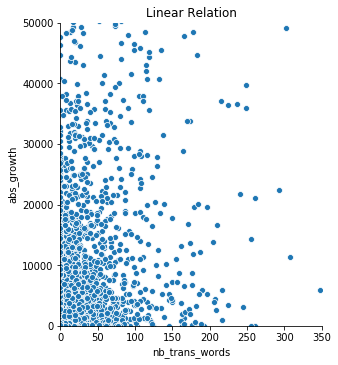

In [209]:
p = sns.relplot(x="nb_trans_words", y="abs_growth", data=end_df)
plt.title('Linear Relation')
p.set(ylim=(0,50000), xlim=(0,350))

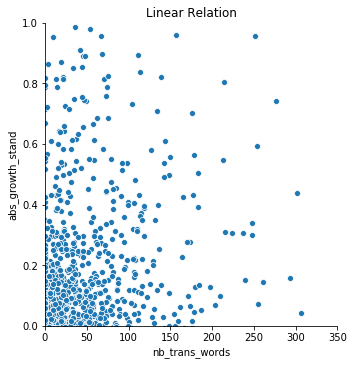

In [210]:
p = sns.relplot(x="nb_trans_words", y="abs_growth_stand", data=end_df)
plt.title('Linear Relation')
p.set(ylim=(0,1), xlim=(0,350))

### Not including companies with no updates content

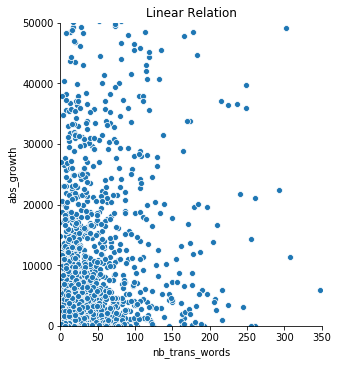

In [211]:
p = sns.relplot(x="nb_trans_words", y="abs_growth", data=posts_companies_df)
plt.title('Linear Relation')
p.set(ylim=(0,50000), xlim=(0,350))

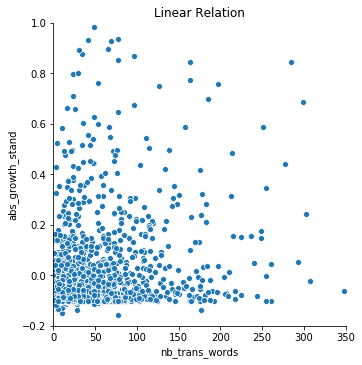

In [288]:
p = sns.relplot(x="nb_trans_words", y="abs_growth_stand", data=posts_companies_df)
plt.title('Linear Relation')
p.set(ylim=(-0.2,1), xlim=(0,350))

## Assumption2 - Residuals are normaly distributed

In [214]:
iv_end_df = end_df.columns.tolist()
iv_end_df.remove("project_slug")
iv_end_df.remove("abs_growth")
iv_end_df.remove("abs_growth_stand")


iv_end_df

['nb_words',
 'nb_trans_words',
 'nb_pos_sentiment',
 'nb_neg_sentiment',
 'nb_posts',
 'nb_weeks_active',
 'goal']

In [348]:
lm_end_df = smf.ols('abs_growth_stand ~ nb_trans_words+ nb_words+ nb_posts+ nb_weeks_active+ goal', data=end_df_no_outliers).fit()

lm_posts_comp = smf.ols('abs_growth_stand ~ nb_neg_sentiment + nb_trans_words:nb_neg_sentiment + nb_pos_sentiment + nb_trans_words:nb_pos_sentiment + nb_trans_words+ nb_words+ nb_posts+ nb_weeks_active+ goal', data=posts_no_outliers).fit()

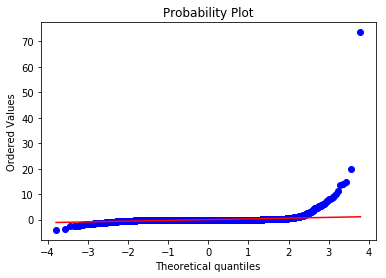

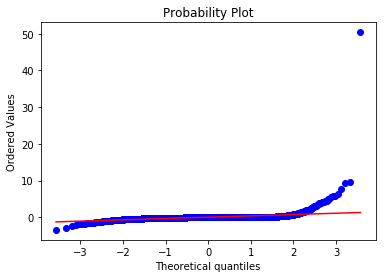

In [349]:
import numpy as np 
import pylab 
import scipy.stats as stats

residuals_end_df = lm_end_df.resid 


# measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(residuals_end_df, dist="norm", plot=pylab)
# ylim(-1,1)
pylab.show()
# fig = smf.qqplot(residuals_end_df)
# plt.show()

residuals_post_df = lm_posts_comp.resid 
stats.probplot(residuals_post_df, dist="norm", plot=pylab)
pylab.show()


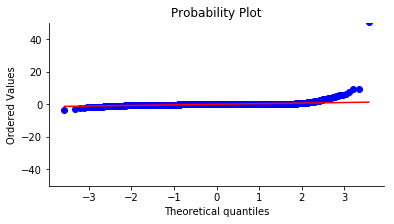

In [350]:

fig, ax = plt.subplots(figsize=(6, 3))
fig = stats.probplot(residuals_post_df, dist="norm", plot=pylab)

# ax.set_yscale('log')
ax.set_ylim(bottom=-50, top=50)
sns.despine()

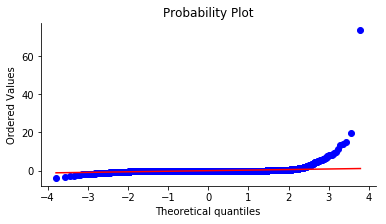

In [359]:
fig, ax = plt.subplots(figsize=(6, 3))
fig = stats.probplot(residuals_end_df, dist="norm", plot=pylab)

# ax.set_yscale('log')
# ax.set_ylim(bottom=-1, top=40)
sns.despine()

assumption homo

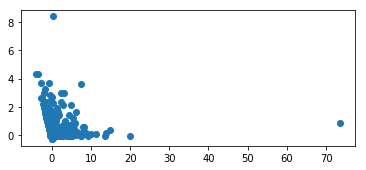

In [361]:
pred_val_end_df = lm_end_df.fittedvalues.copy()
fig, ax = plt.subplots(figsize=(6,2.5))
# ax.set_xlim(0, 2)
# ax.set_ylim(0, 2)

_ = ax.scatter(residuals_end_df, pred_val_end_df)

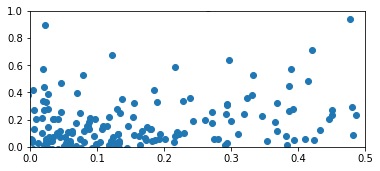

In [367]:
pred_val_post_df = lm_posts_comp.fittedvalues.copy()
fig, ax = plt.subplots(figsize=(6,2.5))
ax.set_xlim(0, .5)
ax.set_ylim(0, 1)

_ = ax.scatter(residuals_post_df, pred_val_post_df)

In [336]:
import statsmodels
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(residuals_end_df, end_df_no_outliers[['nb_trans_words']])
pval, f_pval

(nan, 2.4874132126491235e-05)

## Assumption3 - No Multicolinearity

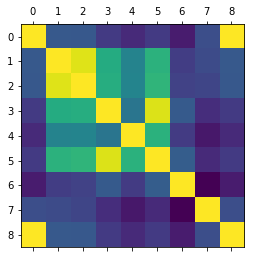

In [278]:
import matplotlib.pyplot as plt

plt.matshow(posts_no_outliers.corr())
plt.show()

Text(0.5, 1.05, 'Correlation Matrix')

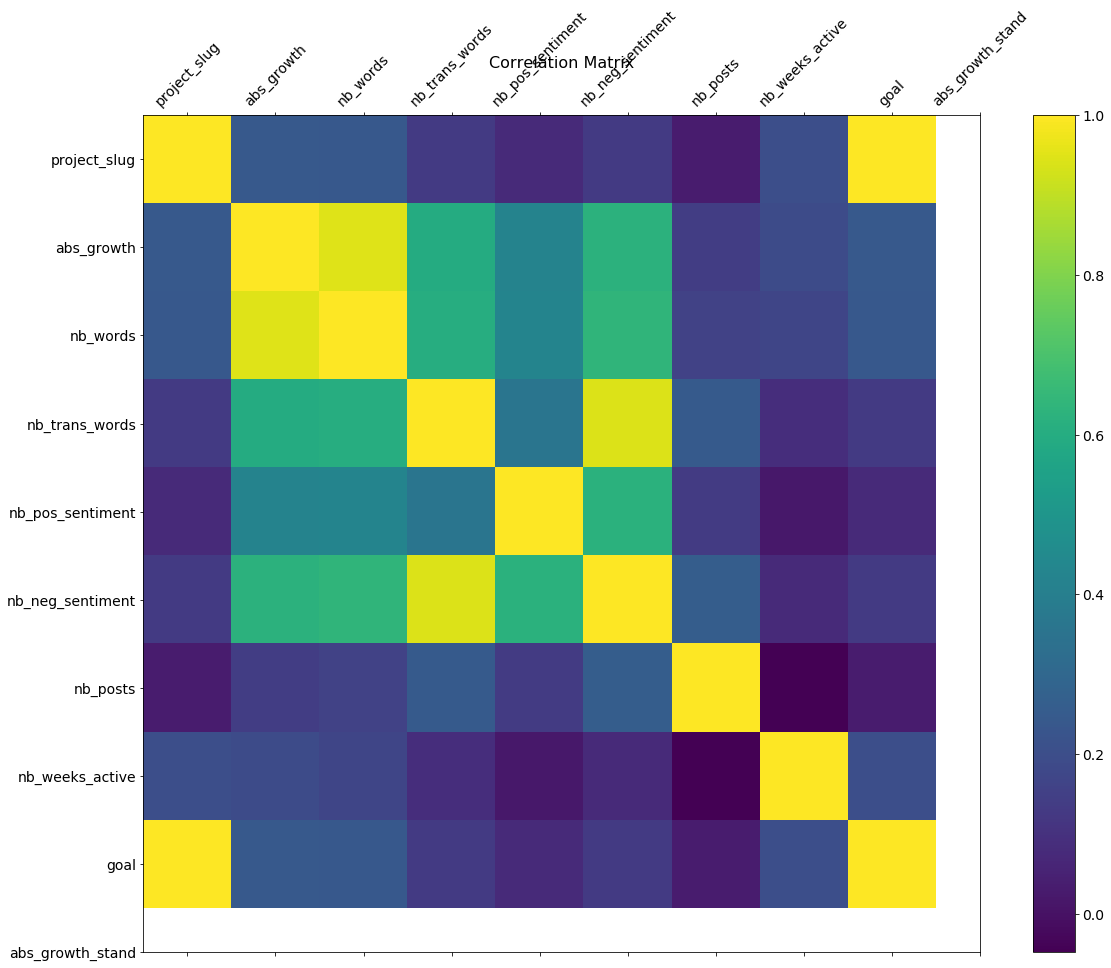

In [286]:
f = plt.figure(figsize=(19, 15))
plt.matshow(posts_no_outliers.corr(), fignum=f.number)
plt.xticks(range(posts_no_outliers.shape[1]), posts_no_outliers.columns, fontsize=14, rotation=45)
plt.yticks(range(posts_no_outliers.shape[1]), posts_no_outliers.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

## Assumption4 - Homoscedasticity

## Assumption5- There are no influential cases biasing your model

# Regression

In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

### Model of transparency and pledges on the full dataset

In [259]:
results = smf.ols('abs_growth_stand ~ nb_trans_words+ nb_words+ nb_posts+ nb_weeks_active+ goal', data=end_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       abs_growth_stand   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     146.9
Date:                Thu, 28 Nov 2019   Prob (F-statistic):          1.79e-150
Time:                        19:15:10   Log-Likelihood:                -12617.
No. Observations:                9141   AIC:                         2.525e+04
Df Residuals:                    9135   BIC:                         2.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0543      0.020     

In [260]:
#mean and sd

print(end_df['nb_trans_words'].mean())
print(end_df['nb_trans_words'].std())

print(end_df['abs_growth'].mean())
print(end_df['abs_growth'].std())

11.919046056230172
34.781122571266444
7340.6832142607345
95321.01027299387


#### Assumption5

In [261]:
infl = results.get_influence()
sm_fr = infl.summary_frame()

In [262]:
index = sm_fr[sm_fr['cooks_d']>1].index
index

Int64Index([1071, 8387], dtype='int64')

In [263]:
end_df_no_outliers = end_df.drop(index)

In [264]:
end_df_no_outliers["abs_growth_stand"] = standard_scaler.fit_transform(end_df_no_outliers[['abs_growth']])

### Model of transparency and pledges on the dataset with posts

In [265]:
results = smf.ols('abs_growth_stand ~ nb_trans_words+ nb_words+ nb_posts+ nb_weeks_active+ goal', data=posts_companies_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       abs_growth_stand   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     107.5
Date:                Thu, 28 Nov 2019   Prob (F-statistic):          1.29e-106
Time:                        19:17:57   Log-Likelihood:                -5280.3
No. Observations:                3899   AIC:                         1.057e+04
Df Residuals:                    3893   BIC:                         1.061e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1503      0.032     

In [266]:
#mean and sd

print(posts_companies_df['nb_trans_words'].mean())
print(posts_companies_df['nb_trans_words'].std())

print(posts_companies_df['abs_growth'].mean())
print(posts_companies_df['abs_growth'].std())

27.94357527571172
48.87391655563377
14595.974472071708
143215.2267201733


### Model of transparency and pledges with moderators on only posts

In [267]:
results = smf.ols('abs_growth_stand ~ nb_neg_sentiment + nb_trans_words:nb_neg_sentiment + nb_pos_sentiment + nb_trans_words:nb_pos_sentiment + nb_trans_words+ nb_words+ nb_posts+ nb_weeks_active+ goal', data=posts_companies_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       abs_growth_stand   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     60.22
Date:                Thu, 28 Nov 2019   Prob (F-statistic):          1.21e-103
Time:                        19:18:49   Log-Likelihood:                -5278.1
No. Observations:                3899   AIC:                         1.058e+04
Df Residuals:                    3889   BIC:                         1.064e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

#### Assumption5- There are no influential cases biasing your model.

In [268]:
infl = results.get_influence()
sm_fr = infl.summary_frame()

In [269]:
index = sm_fr[sm_fr['cooks_d']>1].index
index

Int64Index([1071, 6991, 8387], dtype='int64')

In [270]:
posts_no_outliers = posts_companies_df.drop(index)
posts_no_outliers

project_slug     abs_growth  \
2         1-cat-mom-dad-and-other-cat-owner-enamel-pins       0.000000   
7                                   10-days-in-december    4219.280776   
8     100-3d-printable-pavement-textured-bases-for-w...     103.761934   
9     100-cartoons-from-the-lucid-moments-in-my-cart...       0.000000   
11                                   100-years-of-zorro    5070.000000   
15                              103-explosive-gun-jokes      50.000000   
19                        12-strings-recyclable-e-cello       0.000000   
25                       15mm-fantasy-egyptians-round-2     610.000000   
26    15mm-scale-rat-men-miniatures-by-mallius-minia...    1545.747650   
27                                             18-holes    2338.139483   
28                                  180-for-the-culture    1733.504012   
29                          1816-wargame-eternal-winter    1891.740452   
30                                 1824-austria-hungary   23620.037278   
31                   1873-svensk-skrackgotisk-steampunk     554.899546   
32                                         18chesapeake   70862.000000   
33    1909-baseball-card-restoration-and-reprint-pro...     102.000000   
35       1st-edition-tokyo-magic-junction-playing-cards    1271.129980   
36                     2019-bees-seeds-festival-funding    2540.000000   
42                              22-gemstones-plant-food      19.000000   
48                               24sink-eurorack-module   22241.667841   
49       25mm-28mm-american-civil-war-acw-metal-cavalry    1988.000000   
51         28mm-1-56-german-tank-crew-and-diorama-bases    1791.046123   
52                                   28mm-mayan-pyramid    1859.472687   
54                                    2d-snacks-for-all    1406.835725   
55    2mm-walnut-clutch-pencil-handmade-by-nicholas-...    1133.345740   
60    3-d-digital-film-restoration-el-corazon-y-la-e...   17765.000000   
62             3-exotic-girlfriend-3-pisces-moon-sign-3      57.089501   
67    32blit-retro-inspired-handheld-with-open-sourc...   16125.779284   
69                                             34minus1     256.022874   
70                            350-modular-rpg-map-tiles    1114.516784   
...                                                 ...            ...   
9055                          ying-yang-rats-enamel-pin     377.080262   
9056      yngr-designer-bags-made-with-recycled-leather    6319.044828   
9068         you-can-if-you-will-the-jerry-kramer-story   20370.000000   
9070  you-get-a-line-and-you-get-a-line-break-kickst...       4.000000   
9071                     you-gotta-be-quick-around-here     400.000000   
9076                            you-will-not-replace-us    2470.998524   
9077                         you-wish-magical-creatures     785.000000   
9084                             young-forever-together      13.956610   
9091                        your-turn-a-board-game-cafe    3357.000000   
9095        yugen-paintings-by-jesse-winchester-schmidt    2380.615471   
9098                                    yyh-enamel-pins      44.000000   
9100  zaatari-radio-empowering-refugees-through-radi...    1755.156891   
9101                    zafir-tactical-roleplaying-game    6647.000000   
9102              zahra-the-shadow-flame-a-comic-series    1400.270000   
9104                           zelda-the-hero-of-fringe     454.000000   
9105    zen-clock-minimalist-smart-clock-for-your-place    9566.051712   
9112  zero-code-apps-reloaded-diy-app-builder-apps-made    6389.531372   
9113          zero-multi-power-supply-battery-supported    1562.300603   
9115  zerohour-relic-xr2-tactical-usb-type-c-powerba...   25101.000000   
9117     zetazs-the-crazy-cool-mini-electric-skateboard   -2427.755168   
9122                  zita-v2-3-axis-wireless-gyroscope    1736.258003   
9123                                   zodiac-sign-dice     376.726710   
9124              zoetrope-time-patrol-card-bas

In [271]:
posts_no_outliers["abs_growth_stand"] = standard_scaler.fit_transform(posts_no_outliers[['abs_growth']])

### Final results

#### relation between transparency and amount of pledged on data with post content and without post content and without ouliers

In [272]:
results = smf.ols('abs_growth_stand ~ nb_trans_words+ nb_words+ nb_posts+ nb_weeks_active+ goal', data=end_df_no_outliers).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       abs_growth_stand   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     124.3
Date:                Thu, 28 Nov 2019   Prob (F-statistic):          1.04e-127
Time:                        19:19:48   Log-Likelihood:                -12667.
No. Observations:                9139   AIC:                         2.535e+04
Df Residuals:                    9133   BIC:                         2.539e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0820      0.020     

#### relation between transparency and amount of pledged on data with post content and without ouliers

In [273]:
results = smf.ols('abs_growth_stand ~ nb_trans_words+ nb_words+ nb_posts+ nb_weeks_active+ goal', data=posts_no_outliers).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       abs_growth_stand   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     74.65
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           6.79e-75
Time:                        19:19:51   Log-Likelihood:                -5349.7
No. Observations:                3896   AIC:                         1.071e+04
Df Residuals:                    3890   BIC:                         1.075e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1841      0.033     

####  relation between transparency and amount of pledged on data with post content and without ouliers and with moderators

In [274]:
results = smf.ols('abs_growth_stand ~ nb_neg_sentiment + nb_trans_words:nb_neg_sentiment + nb_pos_sentiment + nb_trans_words:nb_pos_sentiment + nb_trans_words+ nb_words+ nb_posts+ nb_weeks_active+ goal', data=posts_no_outliers).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       abs_growth_stand   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     43.74
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           2.53e-75
Time:                        19:19:53   Log-Likelihood:                -5340.2
No. Observations:                3896   AIC:                         1.070e+04
Df Residuals:                    3886   BIC:                         1.076e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [285]:
results = smf.ols('abs_growth ~ nb_neg_sentiment + nb_trans_words:nb_neg_sentiment + nb_pos_sentiment + nb_trans_words:nb_pos_sentiment + nb_trans_words+ nb_words+ nb_posts+ nb_weeks_active+ goal', data=posts_no_outliers).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             abs_growth   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     43.74
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.53e-75
Time:                        10:50:47   Log-Likelihood:                -49226.
No. Observations:                3896   AIC:                         9.847e+04
Df Residuals:                    3886   BIC:                         9.853e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [280]:
#mean and sd

print(end_df_no_outliers['nb_trans_words'].mean())
print(end_df_no_outliers['nb_trans_words'].std())

print(end_df_no_outliers['abs_growth'].mean())
print(end_df_no_outliers['abs_growth'].std())

print(posts_no_outliers['nb_trans_words'].mean())
print(posts_no_outliers['nb_trans_words'].std())

print(posts_no_outliers['abs_growth'].mean())
print(posts_no_outliers['abs_growth'].std())

11.809935441514389
33.91678830586233
6355.463016911847
54026.39735585082
27.70277207392197
47.52293361660284
12292.37569728121
77995.44347134302


# OUD PLOT UITPROBEERSEL NIET BRUIKBAAR

In [275]:
results = smf.ols('abs_growth_stand ~ nb_trans_words+ nb_words+ nb_posts+ nb_weeks_active+ goal', data=posts_companies_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       abs_growth_stand   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     107.5
Date:                Thu, 28 Nov 2019   Prob (F-statistic):          1.29e-106
Time:                        19:33:29   Log-Likelihood:                -5280.3
No. Observations:                3899   AIC:                         1.057e+04
Df Residuals:                    3893   BIC:                         1.061e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1503      0.032     

In [276]:
infl = results.get_influence()
sm_fr = infl.summary_frame()

In [277]:
index = sm_fr[sm_fr['cooks_d']>1].index
index

Int64Index([6991, 8387], dtype='int64')

In [269]:
# index = sm_fr[sm_fr['cooks_d']>1].index
# index

Int64Index([1071, 6991, 8387], dtype='int64')

In [340]:
#for full dataset 

trans_growth_df = week_df.filter(['nb_trans_words','abs_growth'], axis=1)
trans_growth_df

cum_trans_growth_df = trans_growth_df.groupby(['nb_trans_words'])['abs_growth'].mean().reset_index()
cum_trans_growth_df

nb_trans_words     abs_growth
0                 0     289.418754
1                 1    1092.115839
2                 2    1398.771456
3                 3    1863.457777
4                 4    2239.792432
5                 5    2173.446041
6                 6    2597.214227
7                 7    2065.740645
8                 8    3363.254994
9                 9    7824.628125
10               10    3342.628340
11               11    4173.014143
12               12    5391.239803
13               13    5992.816685
14               14    7673.363440
15               15    5428.194763
16               16    4860.305356
17               17    8360.627772
18               18    5311.705303
19               19    4648.767295
20               20    7602.329135
21               21    9844.849663
22               22    7122.553167
23               23   10710.249057
24               24   35767.161599
25               25    9118.430305
26               26    5194.164064
27               27    5334.895422
28               28   17034.756849
29               29   52328.353902
..              ...            ...
103             114    2696.750000
104             115   45474.349768
105             116       0.000000
106             117    1765.878377
107             118       0.000000
108             122    2360.000000
109             124       0.000000
110             127       0.000000
111             132   15024.000000
112             135       0.000000
113             143   32254.055000
114             144  241449.000000
115             157  757866.100000
116             166  331175.680000
117             174       0.000000
118             181  113460.289691
119             183       0.000000
120             185   14379.000000
121             186   18846.050000
122             201   18038.000000
123             206       0.000000
124             215       0.000000
125             216   44690.000000
126             240    4720.000000
127             245       0.000000
128             271  172883.000000
129             279       0.000000
130             300       0.000000
131             358   85358.720000
132             382  100537.010000

[133 rows x 2 columns]

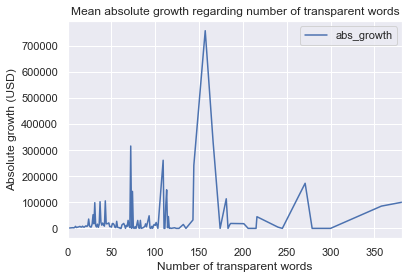

In [380]:
ax = plt.gca()

cum_trans_growth_df.plot(kind='line',x='nb_trans_words',y='abs_growth',ax=ax)
plt.title('Mean absolute growth regarding number of transparent words')
plt.ylabel('Absolute growth (USD)')
plt.xlabel('Number of transparent words')

plt.show()

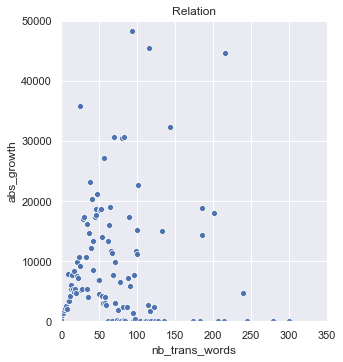

In [328]:
p = sns.relplot(x="nb_trans_words", y="abs_growth", data=cum_trans_growth_df)
plt.title('Relation')
p.set(ylim=(0,50000), xlim=(0,350))

### Model of transparency and pledges on the dataset with posts

In [223]:
results = smf.ols('abs_growth ~ nb_trans_words + nb_words + nb_posts + Goal_USD + diff_week', data=posts_companies_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             abs_growth   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     281.5
Date:                Tue, 26 Nov 2019   Prob (F-statistic):          7.25e-289
Time:                        16:58:30   Log-Likelihood:            -1.7980e+05
No. Observations:               15067   AIC:                         3.596e+05
Df Residuals:                   15061   BIC:                         3.597e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -559.9075    678.155     -0.

In [314]:
#mean and sd

print(posts_companies_df['nb_trans_words'].mean())
print(posts_companies_df['nb_trans_words'].std())

print(posts_companies_df['abs_growth'].mean())
print(posts_companies_df['abs_growth'].std())

7.231167452047521
13.815437421543548
3777.1092099693115
38524.65079505124


In [396]:
trans_growth_df_post = posts_companies_df.filter(['nb_trans_words','abs_growth', 'nb_pos_sentiment', 'nb_neg_sentiment'], axis=1)
trans_growth_df_post

cum_trans_growth_df_post = trans_growth_df_post.groupby(['nb_trans_words'])['abs_growth', 'nb_pos_sentiment', 'nb_neg_sentiment'].mean().reset_index()
cum_trans_growth_df_post

nb_trans_words     abs_growth  nb_pos_sentiment  nb_neg_sentiment
0                 0     782.891354          0.841155          0.218863
1                 1    1092.115839          0.979412          0.225000
2                 2    1398.771456          1.069843          0.194369
3                 3    1863.457777          1.179933          0.201338
4                 4    2239.792432          1.246479          0.199824
5                 5    2173.446041          1.303754          0.274175
6                 6    2597.214227          1.382952          0.222646
7                 7    2065.740645          1.425894          0.308348
8                 8    3363.254994          1.560241          0.285141
9                 9    7824.628125          1.615960          0.284289
10               10    3342.628340          1.692308          0.273504
11               11    4173.014143          1.694079          0.358553
12               12    5391.239803          1.762846          0.379447
13               13    5992.816685          1.908297          0.340611
14               14    7673.363440          1.913462          0.384615
15               15    5428.194763          2.084416          0.350649
16               16    4860.305356          1.816993          0.464052
17               17    8360.627772          2.067669          0.443609
18               18    5311.705303          2.051282          0.538462
19               19    4648.767295          2.048077          0.500000
20               20    7602.329135          2.130435          0.380435
21               21    9844.849663          2.487500          0.400000
22               22    7122.553167          2.453333          0.413333
23               23   10710.249057          2.651515          0.424242
24               24   35767.161599          2.473684          0.631579
25               25    9118.430305          2.259259          0.629630
26               26    5194.164064          2.375000          0.550000
27               27    5334.895422          2.976190          0.285714
28               28   17034.756849          2.534884          0.511628
29               29   52328.353902          2.263158          0.473684
..              ...            ...               ...               ...
103             114    2696.750000          2.000000          0.000000
104             115   45474.349768          5.333333          1.333333
105             116       0.000000          6.000000          1.000000
106             117    1765.878377          6.000000          0.000000
107             118       0.000000          2.000000          6.000000
108             122    2360.000000          4.000000          2.000000
109             124       0.000000          4.000000          4.000000
110             127       0.000000          3.000000          0.000000
111             132   15024.000000          8.000000          6.000000
112             135       0.000000          5.000000          0.000000
113             143   32254.055000          6.000000          1.000000
114             144  241449.000000          1.500000          2.500000
115             157  757866.100000          7.000000          6.000000
116             166  331175.680000          1.000000          2.000000
117             174       0.000000          5.000000          4.000000
118             181  113460.289691          6.000000          4.000000
119             183       0.000000          3.000000          4.000000
120             185   14379.000000          3.000000          3.000000
121             186   18846.050000          9.000000          0.000000
122             201   18038.000000          4.000000          2.000000
123             206       0.000000          6.000000          1.000000
124             215       0.000000         10.500000          4.000000
125             216   44690.000000          2.000000          5.000000
126             240    4720.000000          3.000000          1.000000
127             245       0.0

In [397]:

test_cum_trans_growth_df_post = trans_growth_df_post.groupby(['abs_growth'])['nb_trans_words', 'nb_pos_sentiment', 'nb_neg_sentiment'].mean().reset_index()
test_cum_trans_growth_d f_post


abs_growth  nb_trans_words  nb_pos_sentiment  nb_neg_sentiment
0    -1.239996e+04            18.0               0.0               1.0
1    -9.826845e+03             4.0               0.0               1.0
2    -6.638958e+03             8.0               4.0               1.0
3    -5.721000e+03            19.0               4.0               0.0
4    -5.498000e+03            14.0               1.0               1.0
5    -5.094242e+03            11.0               1.0               0.0
6    -4.854155e+03            55.0               4.0               1.0
7    -3.752127e+03             6.0               2.0               0.0
8    -3.525000e+03            14.0               1.0               0.0
9    -3.190203e+03             3.0               2.0               1.0
10   -2.819090e+03             1.0               1.0               0.0
11   -2.672506e+03             2.0               1.0               0.0
12   -1.877000e+03             8.0               3.0               0.0
13   -1.860000e+03             9.0               2.0               0.0
14   -1.584000e+03             3.0               1.0               0.0
15   -1.499000e+03             6.0               1.0               0.0
16   -1.396973e+03             2.0               0.0               1.0
17   -1.345000e+03             7.0               1.0               0.0
18   -1.288338e+03             7.0               1.0               1.0
19   -1.191634e+03             2.0               1.0               0.0
20   -1.157210e+03             6.0               1.0               1.0
21   -1.112304e+03             5.0               1.0               0.0
22   -9.779951e+02             2.0               1.0               0.0
23   -9.297854e+02             0.0               2.0               0.0
24   -9.271063e+02             2.0               1.0               0.0
25   -8.757864e+02             6.0               1.0               0.0
26   -8.612265e+02             3.0               1.0               0.0
27   -8.560000e+02             6.0               1.0               0.0
28   -8.550000e+02             3.0               1.0               0.0
29   -8.400000e+02             2.0               1.0               1.0
...            ...             ...               ...               ...
5878  2.155940e+05            23.0               4.0               0.0
5879  2.275028e+05            74.0               3.0               0.0
5880  2.508877e+05             2.0               1.0               0.0
5881  2.575274e+05             3.0               1.0               0.0
5882  2.639488e+05            38.0               2.0               0.0
5883  2.643876e+05            14.0               3.0               1.0
5884  2.836542e+05             6.0               1.0               0.0
5885  3.004575e+05             6.0               1.0               0.0
5886  3.260031e+05            34.0               3.0               1.0
5887  3.311757e+05           166.0               1.0               2.0
5888  3.316093e+05            13.0               2.0               0.0
5889  3.317188e+05            40.0               3.0               1.0
5890  3.338839e+05           109.0               4.0               0.0
5891  3.403715e+05            14.0               3.0               1.0
5892  3.436740e+05            30.0               1.0               0.0
5893  3.881260e+05            17.0               1.0               0.0
5894  3.993269e+05            43.0               2.0               0.0
5895  4.028277e+05            28.0               2.0               1.0
5896  4.254454e+05            21.0               3.0               4.0
5897  4.345569e+05           113.0               4.0               0.0
5898  4.828980e+05           144.0               1.0               1.0
5899  7.437448e+05             9.0               1.0               0.0
5900  7.578661e+05           157.0               7.0               6.0
5901  8.795719e+05            29.0               0.0               1.0
5902  9.176521e+05            29

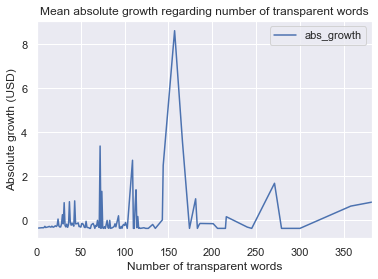

In [381]:
ax = plt.gca()

cum_trans_growth_df_post.plot(kind='line',x='nb_trans_words',y='abs_growth',ax=ax)
plt.title('Mean absolute growth regarding number of transparent words')
plt.ylabel('Absolute growth (USD)')
plt.xlabel('Number of transparent words')

plt.show()

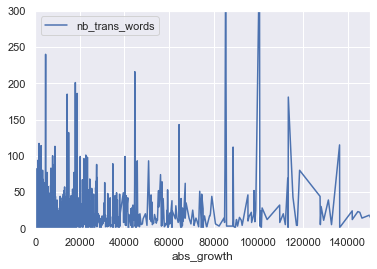

In [406]:
#TEST

ax = plt.gca()

test_cum_trans_growth_df_post.plot(kind='line',x='abs_growth',y='nb_trans_words',ax=ax, )
# plt.title('Mean absolute growth regarding number of transparent words')
# plt.ylabel('Absolute growth (USD)')
# plt.xlabel('Number of transparent words')
ax.set(ylim=(0,300), xlim=(0,150000))

plt.show()

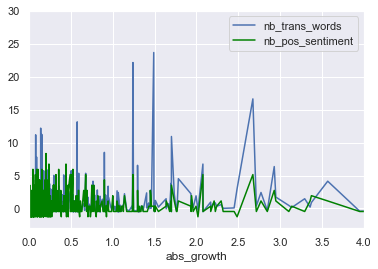

In [422]:
#TEST

#scale absolute growth per week and number of positive sentiment post in that week for plotting 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

test_cum_trans_growth_df_post_scaled_pos = test_cum_trans_growth_df_post

test_cum_trans_growth_df_post_scaled_pos[['nb_trans_words', 'nb_pos_sentiment']] = scaler.fit_transform(test_cum_trans_growth_df_post_scaled_pos[['nb_trans_words', 'nb_pos_sentiment']])

ax = plt.gca()

test_cum_trans_growth_df_post_scaled_pos.plot(kind='line',x='abs_growth',y='nb_trans_words',ax=ax, )
test_cum_trans_growth_df_post_scaled_pos.plot(kind='line',x='abs_growth',y='nb_pos_sentiment', color = 'green', ax=ax)
# plt.title('Mean absolute growth regarding number of transparent words')
# plt.ylabel('Absolute growth (USD)')
# plt.xlabel('Number of transparent words')
ax.set(ylim=(-3,30), xlim=(0,4))

plt.show()

# cum_trans_growth_df_post_scaled_pos.plot(kind='line',x='nb_trans_words',y='abs_growth',ax=ax)
# cum_trans_growth_df_post_scaled_pos.plot(kind='line',x='nb_trans_words',y='nb_pos_sentiment', color = 'green', ax=ax)
# plt.title('Mean absolutegrowth regarding number of \n transparent words and positive updates')
# plt.ylabel('Absolute growth and \n number of positive updates (scaled)')
# plt.xlabel('Number of transparent words')

# plt.show()

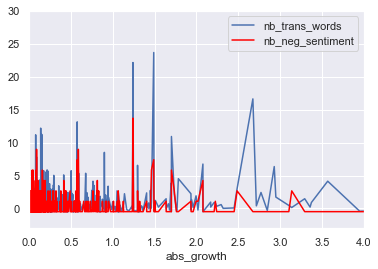

In [421]:
#TEST

#scale absolute growth per week and number of positive sentiment post in that week for plotting 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

test_cum_trans_growth_df_post_scaled_neg = test_cum_trans_growth_df_post

test_cum_trans_growth_df_post_scaled_neg[['nb_trans_words', 'nb_neg_sentiment']] = scaler.fit_transform(test_cum_trans_growth_df_post_scaled_pos[['nb_trans_words', 'nb_neg_sentiment']])

ax = plt.gca()

test_cum_trans_growth_df_post_scaled_neg.plot(kind='line',x='abs_growth',y='nb_trans_words',ax=ax, )
test_cum_trans_growth_df_post_scaled_neg.plot(kind='line',x='abs_growth',y='nb_neg_sentiment', color = 'red', ax=ax)
# plt.title('Mean absolute growth regarding number of transparent words')
# plt.ylabel('Absolute growth (USD)')
# plt.xlabel('Number of transparent words')
ax.set(ylim=(-3,30), xlim=(0,4))

plt.show()

# cum_trans_growth_df_post_scaled_pos.plot(kind='line',x='nb_trans_words',y='abs_growth',ax=ax)
# cum_trans_growth_df_post_scaled_pos.plot(kind='line',x='nb_trans_words',y='nb_pos_sentiment', color = 'green', ax=ax)
# plt.title('Mean absolutegrowth regarding number of \n transparent words and positive updates')
# plt.ylabel('Absolute growth and \n number of positive updates (scaled)')
# plt.xlabel('Number of transparent words')

# plt.show()

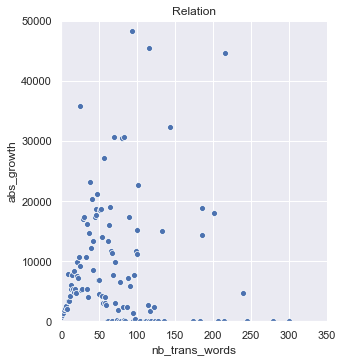

In [343]:
p = sns.relplot(x="nb_trans_words", y="abs_growth", data=cum_trans_growth_df_post)
plt.title('Relation')
p.set(ylim=(0,50000), xlim=(0,350))

### Model of transparency and pledges with positive segment

In [423]:
results = smf.ols('abs_growth ~ nb_trans_words + nb_pos_sentiment + nb_trans_words:nb_pos_sentiment + nb_words + nb_posts + Goal_USD + diff_week + nb_pos_sentiment', data=posts_companies_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             abs_growth   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     205.1
Date:                Wed, 27 Nov 2019   Prob (F-statistic):          6.13e-292
Time:                        14:36:29   Log-Likelihood:            -1.7979e+05
No. Observations:               15067   AIC:                         3.596e+05
Df Residuals:                   15059   BIC:                         3.596e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [226]:
results = smf.ols('abs_growth ~ nb_trans_words + nb_words + nb_posts + Goal_USD + diff_week + nb_pos_sentiment', data=posts_companies_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             abs_growth   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     234.7
Date:                Tue, 26 Nov 2019   Prob (F-statistic):          1.07e-287
Time:                        17:02:28   Log-Likelihood:            -1.7980e+05
No. Observations:               15067   AIC:                         3.596e+05
Df Residuals:                   15060   BIC:                         3.597e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -515.9919    682.055  

In [369]:
#scale absolute growth per week and number of positive sentiment post in that week for plotting 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cum_trans_growth_df_post_scaled_pos = cum_trans_growth_df_post

cum_trans_growth_df_post_scaled_pos[['abs_growth', 'nb_pos_sentiment']] = scaler.fit_transform(cum_trans_growth_df_post_scaled[['abs_growth', 'nb_pos_sentiment']])

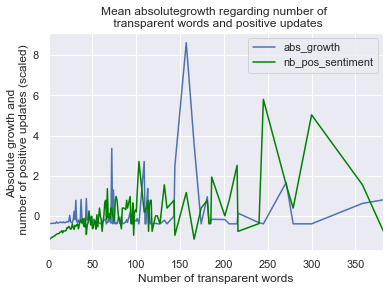

In [392]:
ax = plt.gca()

cum_trans_growth_df_post_scaled_pos.plot(kind='line',x='nb_trans_words',y='abs_growth',ax=ax)
cum_trans_growth_df_post_scaled_pos.plot(kind='line',x='nb_trans_words',y='nb_pos_sentiment', color = 'green', ax=ax)
plt.title('Mean absolutegrowth regarding number of \n transparent words and positive updates')
plt.ylabel('Absolute growth and \n number of positive updates (scaled)')
plt.xlabel('Number of transparent words')

plt.show()

In [426]:
posts_companies_df.head(20)

week                                       project_slug   Pledge_USD  \
16    18      1-cat-mom-dad-and-other-cat-owner-enamel-pins  1752.889693   
17    20      1-cat-mom-dad-and-other-cat-owner-enamel-pins  1752.889693   
18    21      1-cat-mom-dad-and-other-cat-owner-enamel-pins  1752.889693   
19    24      1-cat-mom-dad-and-other-cat-owner-enamel-pins  1752.889693   
20    25      1-cat-mom-dad-and-other-cat-owner-enamel-pins  1752.889693   
21    27      1-cat-mom-dad-and-other-cat-owner-enamel-pins  1752.889693   
22    29      1-cat-mom-dad-and-other-cat-owner-enamel-pins  1752.889693   
23    30      1-cat-mom-dad-and-other-cat-owner-enamel-pins  1752.889693   
51    29                                10-days-in-december  2772.992553   
52    30                                10-days-in-december  6495.887355   
53    31                                10-days-in-december  6992.273328   
54    29  100-3d-printable-pavement-textured-bases-for-w...   111.656864   
55    31  100-3d-printable-pavement-textured-bases-for-w...   486.102104   
56    29  100-cartoons-from-the-lucid-moments-in-my-cart...   766.000000   
57    31  100-cartoons-from-the-lucid-moments-in-my-cart...   871.000000   
66    21                                 100-years-of-zorro  1228.000000   
67    22                                 100-years-of-zorro  4752.000000   
68    23                                 100-years-of-zorro  6298.000000   
69    24                                 100-years-of-zorro  6298.000000   
70    31                                 100-years-of-zorro  6298.000000   

        Goal_USD  funding_ratio   abs_growth  ratio_growth  \
16    336.662553       5.206667     0.000000        0.0000   
17    336.662553       5.206667     0.000000        0.0000   
18    336.662553       5.206667     0.000000        0.0000   
19    336.662553       5.206667     0.000000        0.0000   
20    336.662553       5.206667     0.000000        0.0000   
21    336.662553       5.206667     0.000000        0.0000   
22    336.662553       5.206667     0.000000        0.0000   
23    336.662553       5.206667     0.000000        0.0000   
51  22562.998800       0.122900     0.000000        0.0000   
52  22562.998800       0.287900  3722.894802        0.1650   
53  22562.998800       0.309900   496.385974        0.0220   
54    112.784711       0.990000     0.000000        0.0000   
55    112.784711       4.310000   103.761934        0.9200   
56   9600.000000       0.079792     0.000000        0.0000   
57   9600.000000       0.090729     0.000000        0.0000   
66   2500.000000       0.491200     0.000000        0.0000   
67   2500.000000       1.900800  3524.000000        1.4096   
68   2500.000000       2.519200  1546.000000        0.6184   
69   2500.000000       2.519200     0.000000        0.0000   
70   2500.000000       2.519200     0.000000        0.0000   

           Launched_at  Launched_at_week  diff_week  nb_words  nb_trans_words  \
16 2019-03-31 22:00:03                13          5       475               1   
17 2019-03-31 22:00:03                13          7      1344               3   
18 2019-03-31 22:00:03                13          8       785               5   
19 2019-03-31 22:00:03                13         11       834               3   
20 2019-03-31 22:00:03                13         12      2004               4   
21 2019-03-31 22:00:03                13         14       153               2   
22 2019-03-31 22:00:03                13         16      1471               2   
23 2019-03-31 22:00:03                13         17       575               2   
51 2019-07-14 19:00:13                28          1      9206              47   
52 2019-07-14 19:00:13                28          2      2562              16   
53 2019-07-14 19:00:13                28          3     16595              82   
54 2019-07-12 21:08:24                28          1       788               5   
55 2019-07-12 21:08:24                28          3

### Model of transparency and pledges with negative segment

In [228]:
results = smf.ols('abs_growth ~ nb_trans_words + nb_words + nb_posts + Goal_USD + diff_week + nb_neg_sentiment', data=posts_companies_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             abs_growth   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     234.7
Date:                Tue, 26 Nov 2019   Prob (F-statistic):          1.01e-287
Time:                        17:02:52   Log-Likelihood:            -1.7980e+05
No. Observations:               15067   AIC:                         3.596e+05
Df Residuals:                   15060   BIC:                         3.597e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -523.8151    680.169  

In [432]:
results = smf.ols('abs_growth ~ nb_trans_words + nb_neg_sentiment + nb_trans_words:nb_neg_sentiment + nb_words + nb_posts + Goal_USD + diff_week', data=posts_companies_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             abs_growth   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     201.4
Date:                Wed, 27 Nov 2019   Prob (F-statistic):          6.99e-287
Time:                        14:47:44   Log-Likelihood:            -1.7980e+05
No. Observations:               15067   AIC:                         3.596e+05
Df Residuals:                   15059   BIC:                         3.597e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [371]:
#scale absolute growth per week and number of positive sentiment post in that week for plotting 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cum_trans_growth_df_post_scaled_neg = cum_trans_growth_df_post

cum_trans_growth_df_post_scaled_neg[['abs_growth', 'nb_neg_sentiment']] = scaler.fit_transform(cum_trans_growth_df_post_scaled[['abs_growth', 'nb__sentiment']])

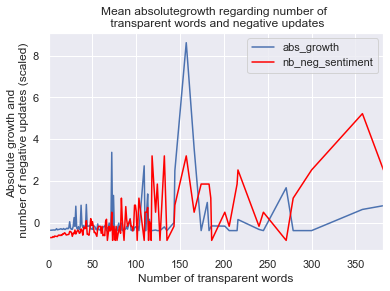

In [393]:
ax = plt.gca()

cum_trans_growth_df_post_scaled_neg.plot(kind='line',x='nb_trans_words',y='abs_growth',ax=ax)
cum_trans_growth_df_post_scaled_neg.plot(kind='line',x='nb_trans_words',y='nb_neg_sentiment', color = 'red', ax=ax)
plt.title('Mean absolutegrowth regarding number of \n transparent words and negative updates')
plt.ylabel('Absolute growth and \n number of negative updates (scaled)')
plt.xlabel('Number of transparent words')

plt.show()

# OUD

In [ ]:
sns.set(style="darkgrid")


p = sns.relplot(x="trans_ratio", y="ratio_growth", hue= 'overal_sentiment', data=end_df)
plt.title('Weeks Aggregated')
p.set(ylim=(0,10), xlim=(0,0.05))

In [ ]:
p = sns.relplot(x="trans_ratio", y="ratio_growth", hue= 'overal_sentiment', data=week_df)
plt.title('Per Week')
p.set(ylim=(0,10), xlim=(0,0.05))

In [ ]:
p = sns.relplot(x="trans_ratio", y="ratio_growth", data=end_df[end_df['overal_sentiment']== 1])
plt.title('Mostly Positive')
p.set(ylim=(0,10), xlim=(0,0.05))

In [197]:
results = smf.ols('ratio_growth ~ trans_ratio', data=end_df[end_df['overal_sentiment']== 1]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           ratio_growth   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1976
Date:                Tue, 26 Nov 2019   Prob (F-statistic):              0.657
Time:                        16:17:23   Log-Likelihood:                -27579.
No. Observations:                3465   AIC:                         5.516e+04
Df Residuals:                    3463   BIC:                         5.517e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      18.4611     16.499      1.119      

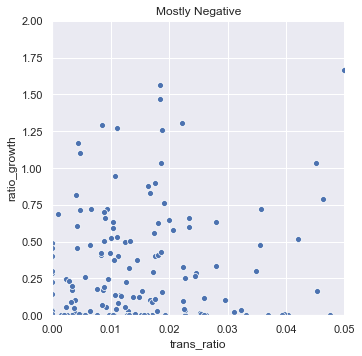

In [366]:
p = sns.relplot(x="trans_ratio", y="ratio_growth", data=end_df[end_df['overal_sentiment']== -1])
plt.title('Mostly Negative')
p.set(ylim=(0,2), xlim=(0,0.05))

In [367]:
results = smf.ols('ratio_growth ~ trans_ratio', data=end_df[end_df['overal_sentiment']== -1]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           ratio_growth   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     6.560
Date:                Mon, 11 Nov 2019   Prob (F-statistic):             0.0112
Time:                        11:08:18   Log-Likelihood:                -584.36
No. Observations:                 190   AIC:                             1173.
Df Residuals:                     188   BIC:                             1179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5539      0.457      1.213      

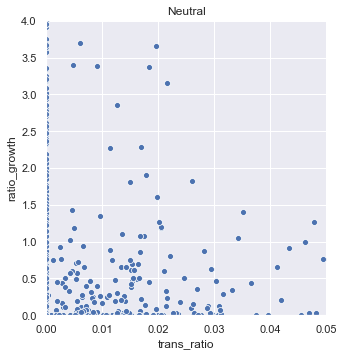

In [368]:
p = sns.relplot(x="trans_ratio", y="ratio_growth", data=end_df[end_df['overal_sentiment']== 0])
plt.title('Neutral')
p.set(ylim=(0,4), xlim=(0,0.05))

In [369]:
results = smf.ols('ratio_growth ~ trans_ratio', data=end_df[end_df['overal_sentiment']== 0]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           ratio_growth   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.002117
Date:                Mon, 11 Nov 2019   Prob (F-statistic):              0.963
Time:                        11:08:24   Log-Likelihood:                -27643.
No. Observations:                5486   AIC:                         5.529e+04
Df Residuals:                    5484   BIC:                         5.530e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1077      0.510      2.173      

In [375]:
results = smf.ols('ratio_growth ~ trans_ratio', data=end_df[(end_df['overal_sentiment']== 0) & (end_df['nb_words']!= 0)]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           ratio_growth   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     14.24
Date:                Mon, 11 Nov 2019   Prob (F-statistic):           0.000203
Time:                        14:26:57   Log-Likelihood:                -511.86
No. Observations:                 244   AIC:                             1028.
Df Residuals:                     242   BIC:                             1035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3098      0.178      1.743      

In [361]:
end_df['overal_sentiment'].value_counts()

 0    5486
 1    3465
-1     190
Name: overal_sentiment, dtype: int64

In [355]:
end_df[end_df['ratio_growth']==0]

project_slug  week     Pledge_USD  \
1                       1-1-real-life-comedy-short-film   322      13.000000   
2         1-cat-mom-dad-and-other-cat-owner-enamel-pins   194   14023.117541   
3                                  1-dollar-1-drawing-0   196     298.339008   
6                                     1-web-family-tree   145      16.861098   
9     100-cartoons-from-the-lucid-moments-in-my-cart...    60    1637.000000   
12                   1000-formas-de-enteder-a-una-mujer    82       3.970295   
14                                    101-days-of-truth   243      11.375126   
16    10years-100paintings-art-book-by-agustin-iglesias   343    8483.896336   
18                                              12-anos    98       4.486201   
19                        12-strings-recyclable-e-cello    56     258.306782   
22                                             144cards    43       2.000000   
24                15-simple-tips-for-true-animal-lovers   114       5.121311   
37                            2019-nes-artist-residency    84     363.000000   
38                            2019-pulse-wave-party-edm   265      10.000000   
39                     2020-calendar-chicas-de-colombia    98       4.000000   
47        24-hours-in-a-ferrari-a-lazer-lion-short-film   131       6.000000   
50                          269-a-thrilling-debut-novel   180     305.010084   
56                               2nd-andbell-mamas-girl   145     505.000000   
58                                  2rate-puntua-valora    82       4.487797   
61                            3-d-p-r-i-n-t-e-d-m-o-o-n    61     137.369906   
65                                30-percent-web-series   106     590.996225   
68                      32ton-army-hoodies-and-t-shirts   343    2725.675050   
77    3d-graveyard-skulls-tombstones-for-tabletop-ga...   286     125.800620   
91                            3d-stl-files-wood-village   196     149.437988   
93                                          3dbuddycaps   322    6253.000000   
95    3motional-quantinomics-sound-is-everything-mus...   171       6.000000   
98                                    4-games-in-4-days    61    2456.200000   
99                                                4-joy    84      63.000000   
100                      4-new-music-books-for-mandolin    84    1799.110511   
104                            4fitnessgirls-mobile-app    94       4.000000   
...                                                 ...   ...            ...   
8986                              workshop-atlv-program   306      12.000000   
9012                                            wrath-1    98       4.000000   
9020       wushu-karate-self-defense-instruction-videos    82       4.000000   
9021                                  wwe-fan-backpacks    82       4.000000   
9023                                  wwwlawyervaultcom   220       7.680097   
9024                             wwwusurus-tag-youre-it   322      13.000000   
9026                      wyld-stallyns-soft-enamel-pin    57    2026.000000   
9029              x-jewelry-organizer-at-home-or-studio    51    1077.655136   
9041                yana-and-ceri-comics-physical-print   163    4937.000000   
9047  year-of-the-pig-lunar-zodiac-playing-cards-1-o...   116  188403.000000   
9050                yer-a-wizard-harry-podcast-season-6   343   98168.000000   
9058                 yobored-stories-around-the-world-0   145     505.000000   
9059                 yogi-handmade-leather-causal-shoes    90     266.469005   
9062                 yogi-handmade-patent-leather-shoes   343    1239.556755   
9074                                  you-still-love-me   343      14.000000   
9083                                      young-ballerz   171     156.000000   
9085        young-global-contemporaries-london-currents    90       3.735902   
9089    your-new-favorite-show-the-purple-haired-granny   303      12.000000   
9090                       your-new-life-bo

In [264]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer, MinMaxScaler
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
norma = Normalizer()
end_df['ratio_growth_scaled_stand'] = standard_scaler.fit_transform(end_df[['ratio_growth']])
end_df['ratio_growth_scaled_norm'] = norma.fit_transform(end_df[['ratio_growth']])

end_df['ratio_growth_log'] =np.log(end_df['ratio_growth'])


C:\Users\jensv\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\jensv\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


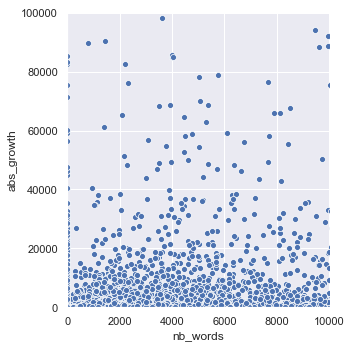

In [299]:
p = sns.relplot(x="nb_words", y="abs_growth", data=end_df)#[(end_df['nb_pos_sentiment']==0) & (end_df['nb_neg_sentiment']==0)])
p.set(ylim=(0,100000), xlim=(0,10000))

In [339]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

results = smf.ols('ratio_growth ~ trans_ratio', data=end_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           ratio_growth   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.03989
Date:                Sun, 10 Nov 2019   Prob (F-statistic):              0.842
Time:                        18:01:32   Log-Likelihood:                -68343.
No. Observations:                9141   AIC:                         1.367e+05
Df Residuals:                    9139   BIC:                         1.367e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.2913      5.005      1.057      

In [340]:
results = smf.ols('ratio_growth ~ trans_ratio', data=week_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           ratio_growth   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.110
Date:                Sun, 10 Nov 2019   Prob (F-statistic):              0.292
Time:                        18:01:42   Log-Likelihood:            -3.2876e+05
No. Observations:               54059   AIC:                         6.575e+05
Df Residuals:                   54057   BIC:                         6.575e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8005      0.483      1.656      

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer, MinMaxScaler

In [271]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer, MinMaxScaler
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
week_df['Pledge_USD_scaled_stand'] = standard_scaler.fit_transform(week_df[['Pledge_USD']])
week_df['Pledge_USD_log'] =np.log(week_df['Pledge_USD'])
week_df['ratio_growth_log'] =np.log(week_df['ratio_growth'])


C:\Users\jensv\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\jensv\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\jensv\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


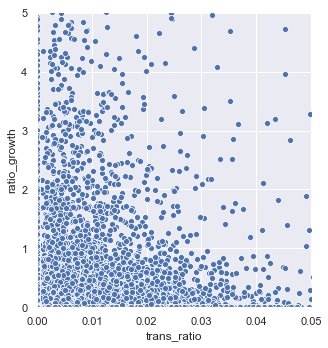

In [276]:
p = sns.relplot(x="trans_ratio", y="ratio_growth", data=week_df)
p.set(ylim=(0,5), xlim=(0,0.05))